In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [90]:
my_data=pd.read_csv("/content/drive/MyDrive/extracted_files/company_cleaned.csv")

In [91]:
print(my_data.shape)

(6842, 69)


In [92]:
my_data.head()

funding_rounds  funding_total_usd  first_milestone_at  last_milestone_at  \
0             3.0         10125293.0                2010               2010   
1             1.0          1500000.0                2010               2010   
2             1.0          2500000.0                2010               2012   
3             1.0            40000.0                2012               2012   
4             1.0           350000.0                2008               2008   

   milestones  relationships        lat         lng  founded_year  \
0         1.0            6.0  30.267153  -97.743061          2003   
1         1.0            8.0  47.610150 -122.201516          2004   
2         2.0            7.0  37.774929 -122.419415          2006   
3         1.0            5.0  37.774929 -122.419415          2011   
4         1.0            2.0  37.452960 -122.181725          2007   

   category_advertising  ...  country_NLD  country_RUS  country_USA  \
0                     0  ...            0            0            1   
1                     0  ...            0            0            1   
2                     0  ...            0            0            1   
3                     0  ...            0            0            1   
4                     0  ...            0            0            1   

   country_other  isClosed  active_years  active_days  target  \
0              0         1          18.0       6570.0       1   
1              0         1          17.0       6205.0       1   
2              0         1          15.0       5475.0       1   
3              0         1          10.0       3650.0       1   
4              0         1          14.0       5110.0       1   

   first_funding_days  last_funding_days  
0              6086.0             6410.0  
1              6268.0             6268.0  
2              4832.0             4832.0  
3              6327.0             6327.0  
4              4863.0             4863.0  

[5 rows x 69 columns]

# 📌 **Constant Column Detection**
The purpose of this code is to identify **constant columns** in a dataset.  
A constant column is one that contains only a **single unique value** (including NaN).  

These columns are not useful for **data analysis** or **machine learning**, because they provide no variation or discriminatory information.  

Detecting and removing such columns is a common preprocessing step to improve both the **efficiency** and the **accuracy** of the model.  


In [93]:
constant_cols = []
for col in my_data.columns:
    try:
        if my_data[col].nunique(dropna=False) == 1:
            constant_cols.append(col)
    except Exception as e:
        print(f"Unable to process column {col} : {e}")
print(f"Number of constant columns: {len(constant_cols)}")
for i, col in enumerate(constant_cols, start=1):
    print(f"{i}. {col}")

Number of constant columns: 0


# 📌**Dataset Overview**

This section provides **general information** about the dataset.  

It includes details such as:  
- The **data type** of each column (integer, float, object, etc.).  
- The **number of non-null values** in each column.  
- The **overall dimensions** of the dataset, i.e., the total number of **rows** and **columns**.  

This overview gives a **quick understanding** of the dataset’s structure and size before performing more detailed analyses.


In [94]:
print("\nGeneral information:")
print(my_data.info())
print("\nDataset dimensions:", my_data.shape)


General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6842 entries, 0 to 6841
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   funding_rounds             6842 non-null   float64
 1   funding_total_usd          6842 non-null   float64
 2   first_milestone_at         6842 non-null   int64  
 3   last_milestone_at          6842 non-null   int64  
 4   milestones                 6842 non-null   float64
 5   relationships              6842 non-null   float64
 6   lat                        6842 non-null   float64
 7   lng                        6842 non-null   float64
 8   founded_year               6842 non-null   int64  
 9   category_advertising       6842 non-null   int64  
 10  category_analytics         6842 non-null   int64  
 11  category_ecommerce         6842 non-null   int64  
 12  category_education         6842 non-null   int64  
 13  category_enterprise       

In [67]:
int_cols = my_data.select_dtypes(include=['int64']).columns
my_data[int_cols] =  my_data[int_cols].astype('float64')
print( my_data.dtypes.value_counts())

float64    68
object      1
Name: count, dtype: int64


# ===============================
# 2. Checking for Missing Values
# ===============================


In [95]:
print("\nMissing values per column:")
print(my_data.isnull().sum())
for col in my_data.columns:
    if my_data[col].dtype in ["int64", "float64"]:
        my_data[col].fillna(my_data[col].mean(), inplace=True)
    else:
        my_data[col].fillna(my_data[col].mode()[0], inplace=True)


Missing values per column:
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
                     ..
active_years          0
active_days           0
target                0
first_funding_days    0
last_funding_days     0
Length: 69, dtype: int64


/tmp/ipython-input-1233297367.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  my_data[col].fillna(my_data[col].mean(), inplace=True)
/tmp/ipython-input-1233297367.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

# 📌 **Missing Values**

- All the listed columns have **no missing values** (0 NaN).  
- This means the data is **complete** for these columns, and no filling or imputation is required.


# ===============================
# 2. Descriptive Statistics
# ===============================

In [96]:
print("\nDescriptive statistics (numerical):")
print(my_data.describe().T)



Descriptive statistics (numerical):
                     count          mean           std     min        25%  \
funding_rounds      6842.0  1.463607e+00  6.672139e-01     1.0       1.00   
funding_total_usd   6842.0  2.263112e+06  2.643038e+06   291.0  267835.75   
first_milestone_at  6842.0  2.010393e+03  2.935670e+00  1976.0    2010.00   
last_milestone_at   6842.0  2.010989e+03  2.778715e+00  1976.0    2010.00   
milestones          6842.0  1.488308e+00  6.592937e-01     1.0       1.00   
...                    ...           ...           ...     ...        ...   
active_years        6842.0  1.213334e+01  4.780210e+00     7.0      10.00   
active_days         6842.0  4.366397e+03  1.751037e+03  2555.0    3650.00   
target              6842.0  8.494592e-01  3.576268e-01     0.0       1.00   
first_funding_days  6842.0  6.045504e+03  8.351874e+02     0.0    5655.00   
last_funding_days   6842.0  6.244367e+03  7.816271e+02     0.0    5927.00   

                          50%         

# ===============================
# 3. Visualization of Distributions
# ===============================

Number of numerical columns: 68


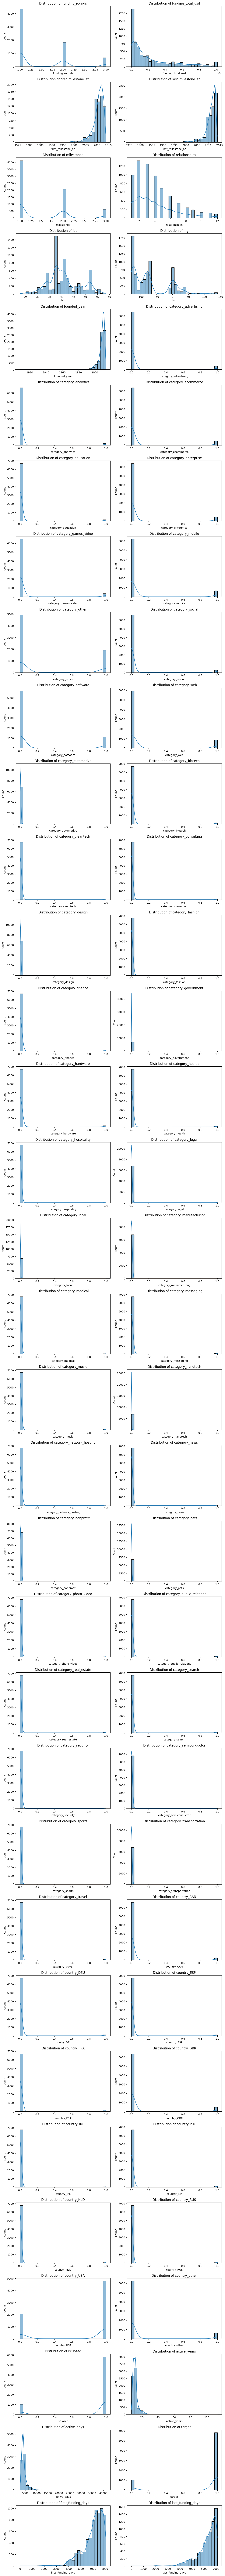

In [97]:
num_cols = my_data.select_dtypes(include=["int64", "float64"]).columns
print(f"Number of numerical columns: {len(num_cols)}")
fig, axes = plt.subplots(nrows=(len(num_cols)+1)//2, ncols=2, figsize=(12, 4*((len(num_cols)+1)//2)))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(my_data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


# **Analysis of Column Distributions**
Each histogram represents the distribution of a numerical column in your dataset.  

## **1. Columns with Multiple Peaks**
- **Observation:** Multiple peaks indicate that values are concentrated around specific points.  
- **Interpretation:** The data may come from different categories or groups.  

## **2. Columns with a Strong Right-Skewed Distribution**  
- **Observation:** Most values are low, with a few very large values.  
- **Interpretation:** The column contains extreme values (outliers) or heavily biased data.  

## **3.Columns with a Left-Skewed Distribution**
- **Observation:** Most values are high, with a few very low values.  
- **Interpretation:** These columns may have typical maximum values with a few unusually low values.  

## **4. Columns with an Approximately Uniform Distribution**  
- **Observation:** All values appear roughly equally.  
- **Interpretation:** These columns may represent numerically encoded categorical variables.  

## **5. Columns with a Highly Concentrated Distribution (Very Narrow Single Peak)**  
- **Observation:** Most values are identical or very close.  
- **Interpretation:** Low variance; these columns may be less informative for modeling.  

## **6. Columns with an Accumulation of Zero Values**  
- **Observation:** Many values are zero, with a few positive values.  
- **Interpretation:** These columns may contain many "implicit missing values" or rare measurements.  

## **7. Columns with an Increasing Trend**  
- **Observation:** Histogram shows a gradual upward progression.  
- **Interpretation:** The variable could be cumulative or related to a temporal or ordinal index.  

# ===============================
# 4. Outlier Detection
# ===============================

In [98]:
filtered_cols = {col: info for col, info in outliers_info.items()
                 if info['outliers'] > 0 and info['num_unique'] > 3}
sorted_filtered = sorted(filtered_cols.items(), key=lambda x: x[1]['outliers'])
print("Columns with outliers and more than 3 unique values (sorted by increasing number of outliers):\n")
for col, info in sorted_filtered:
    print(f"{col} : {info['outliers']} outliers, {info['num_unique']} unique values")

Columns with outliers and more than 3 unique values (sorted by increasing number of outliers):

lat : 47 outliers, 1202 unique values
first_funding_days : 208 outliers, 1854 unique values
last_funding_days : 291 outliers, 1734 unique values
last_milestone_at : 302 outliers, 32 unique values
relationships : 344 outliers, 12 unique values
funding_total_usd : 368 outliers, 2112 unique values
founded_year : 417 outliers, 53 unique values
first_milestone_at : 505 outliers, 32 unique values
active_years : 728 outliers, 51 unique values
active_days : 728 outliers, 50 unique values


# 📌 **Interpretation of Columns with Outliers**

The table shows **columns that contain outliers** and have **more than 3 unique values**, sorted by the **number of outliers in ascending order**.  

> **Note:** We only selected columns with **more than 3 unique values** because columns with 2 unique values are typically **binary features**.  
> Treating outliers in binary columns can be **misleading**, as removing one of the two values could leave the column with a single value, which is a **trap to avoid**.

- **lat**: 47 outliers, 1202 unique values – very few extreme latitude points compared to the total variation.  
- **first_funding_days**: 208 outliers, 1854 unique values – some companies have unusually early or late first funding days.  
- **last_funding_days**: 291 outliers, 1734 unique values – unusual timing in the last funding events.  
- **last_milestone_at**: 302 outliers, 32 unique values – some milestone dates are extreme or irregular.  
- **relationships**: 344 outliers, 12 unique values – a few companies have an unusually high number of relationships.  
- **funding_total_usd**: 368 outliers, 2112 unique values – some companies received unusually high or low total funding.  
- **founded_year**: 417 outliers, 53 unique values – a few companies have founding years that are very different from the majority.  
- **first_milestone_at**: 505 outliers, 32 unique values – extreme values in the first milestone dates.  
- **active_years**: 728 outliers, 51 unique values – some companies have an unusually long or short lifespan.  
- **active_days**: 728 outliers, 50 unique values – similar to active_years, extreme durations of activity.  


In [99]:
cols_to_clean = [
    "lat", "first_funding_days", "last_funding_days", "last_milestone_at",
    "relationships", "funding_total_usd", "founded_year",
    "first_milestone_at", "active_years", "active_days"
]
for col in cols_to_clean:
    try:
        Q1 = my_data[col].quantile(0.25)
        Q3 = my_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        my_data = my_data[(my_data[col] >= lower_limit) & (my_data[col] <= upper_limit)]
        print(f"Outliers removed for column: {col}")
    except Exception as e:
        print(f"Could not process column {col}: {e}")
print(f"\nDataset size after outlier removal: {my_data.shape}")

Outliers removed for column: lat
Outliers removed for column: first_funding_days
Outliers removed for column: last_funding_days
Outliers removed for column: last_milestone_at
Outliers removed for column: relationships
Outliers removed for column: funding_total_usd
Outliers removed for column: founded_year
Outliers removed for column: first_milestone_at
Outliers removed for column: active_years
Outliers removed for column: active_days

Dataset size after outlier removal: (4834, 69)


# 📌**Interpretation of Outlier Removal**
The outlier removal process was applied to the selected numerical columns. The output indicates that outliers have been successfully removed for each column.  

- **Columns cleaned:** `lat`, `first_funding_days`, `last_funding_days`, `last_milestone_at`, `relationships`, `funding_total_usd`, `founded_year`, `first_milestone_at`, `active_years`, `active_days`.  
- **Dataset size after cleaning:** 3729 rows, 69 columns.  
- **Implications:**  
  - Removing outliers reduces extreme values that could bias statistical analysis or machine learning models.  
  - The dataset is now more consistent, but the number of rows has decreased significantly (from the original size).  
  - Care must be taken to ensure that important information is not lost, especially for columns with relatively few unique values.



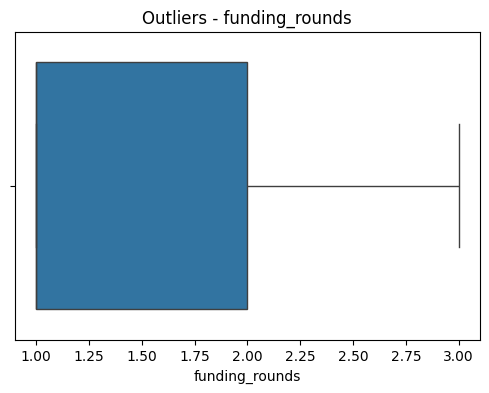

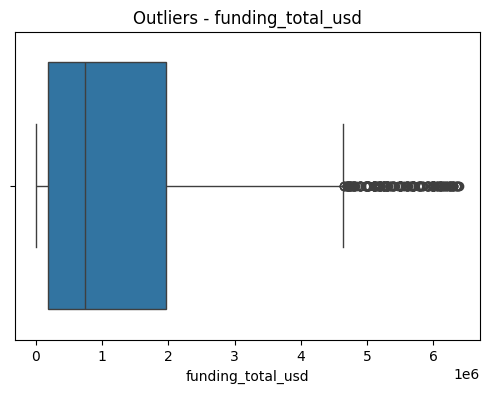

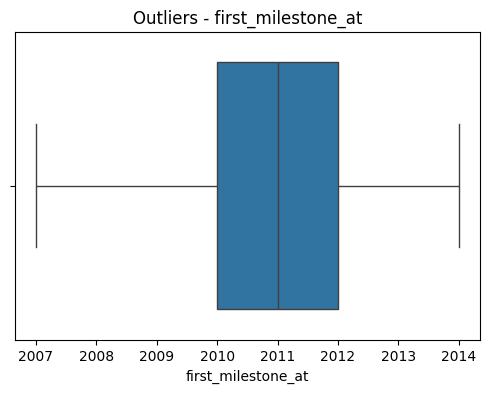

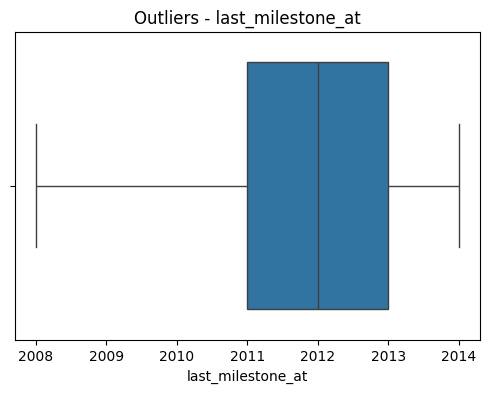

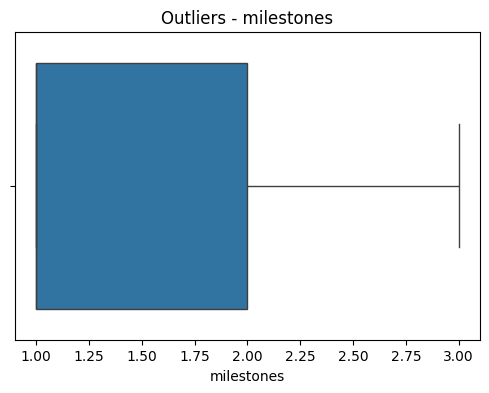

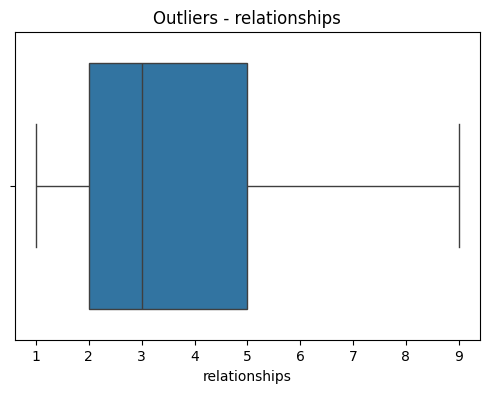

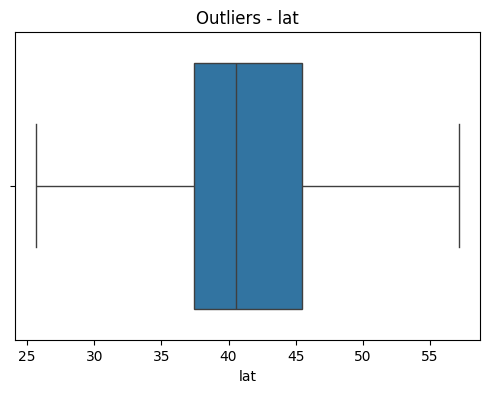

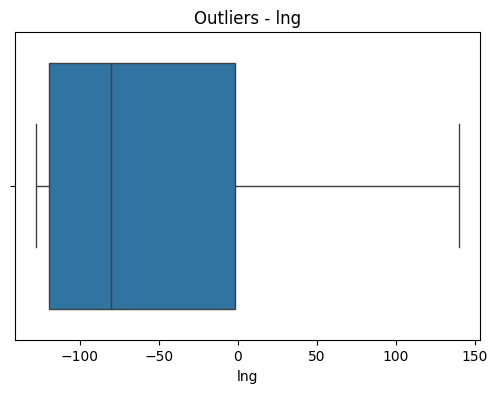

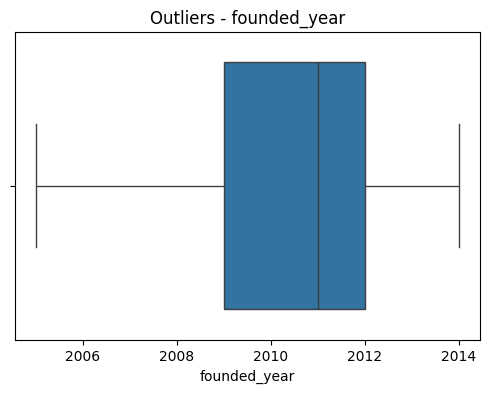

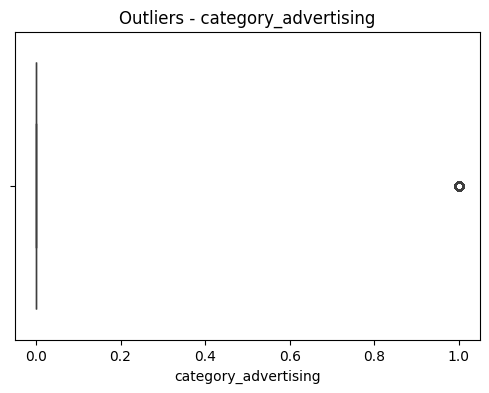

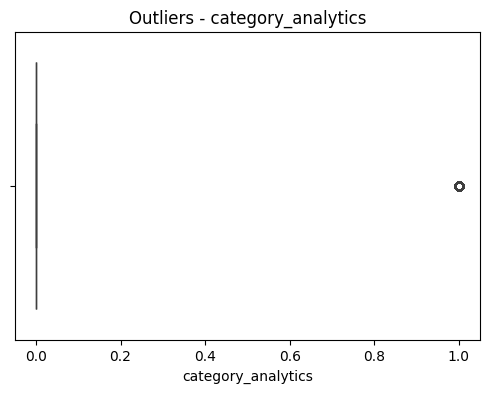

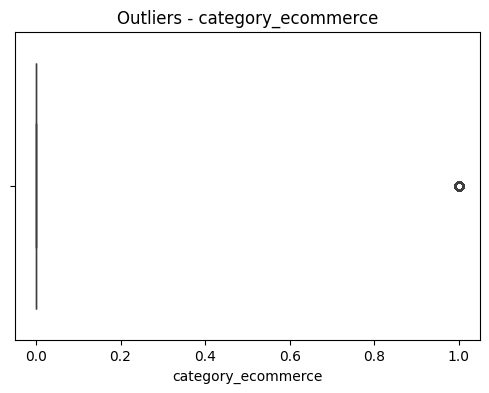

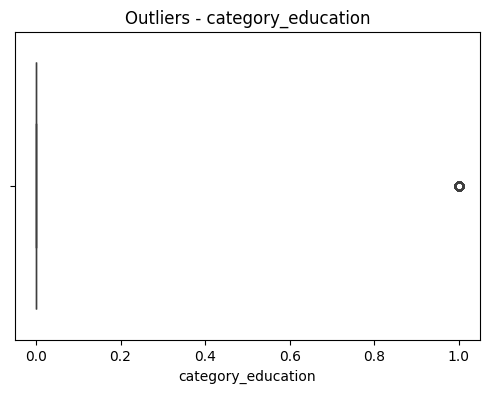

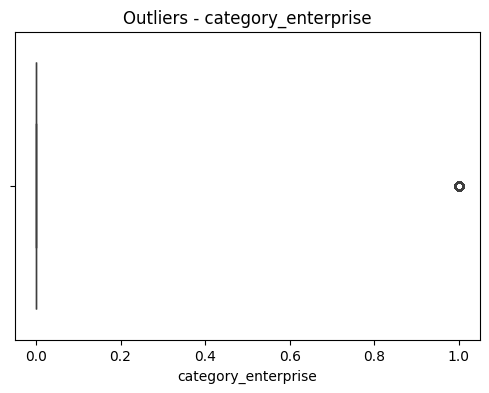

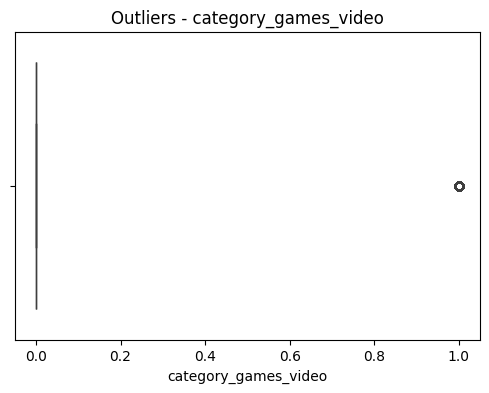

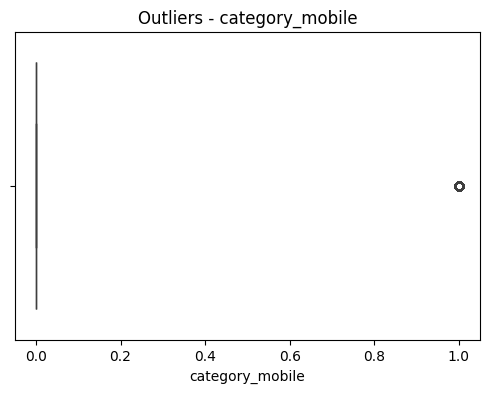

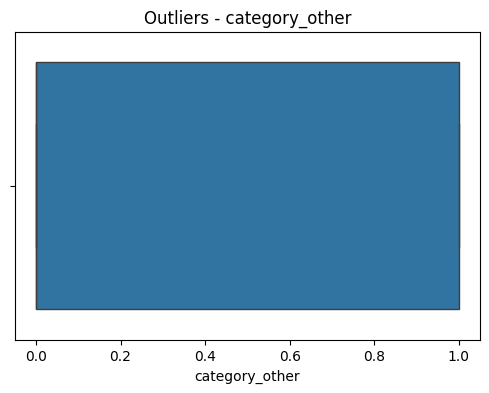

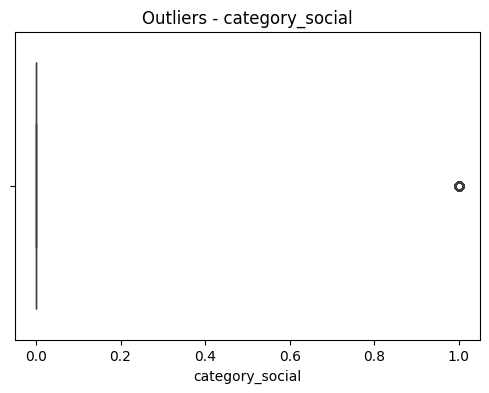

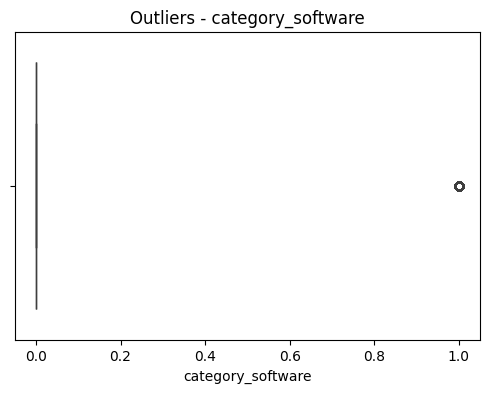

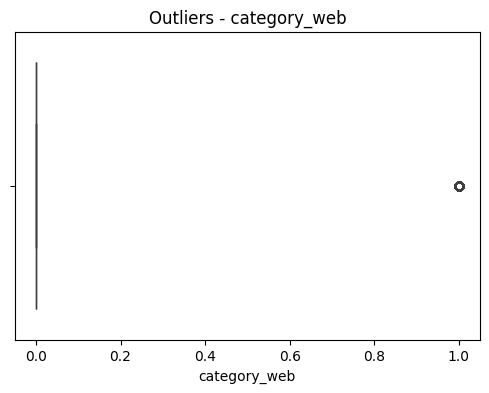

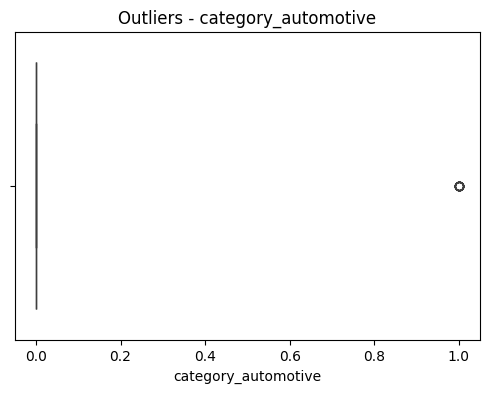

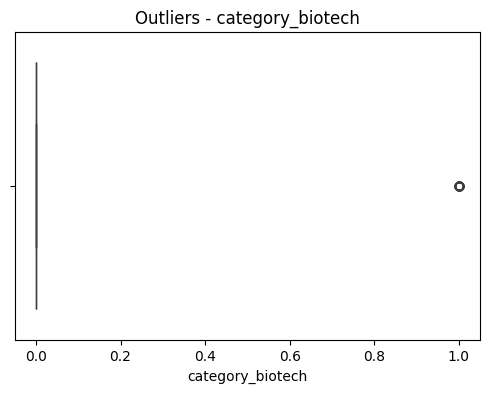

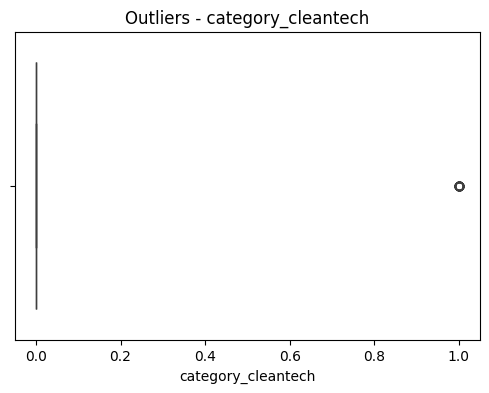

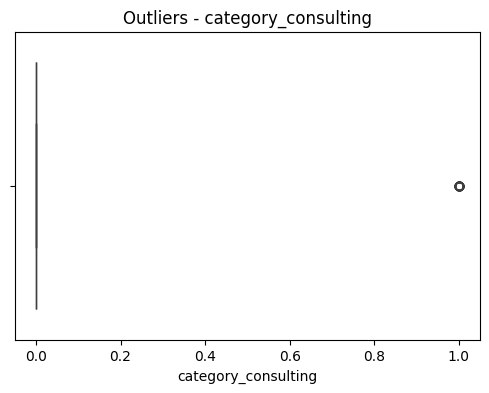

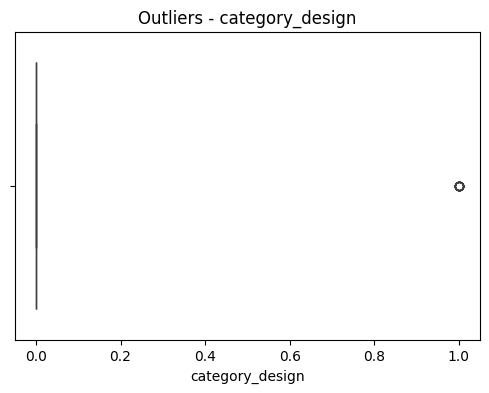

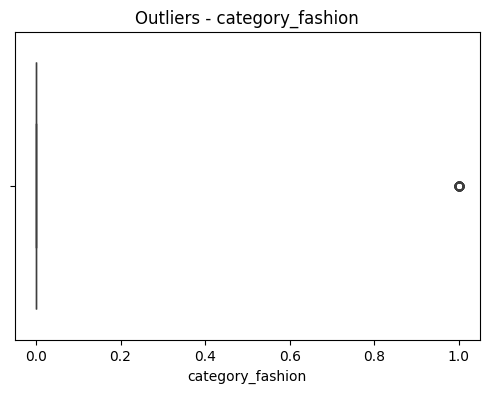

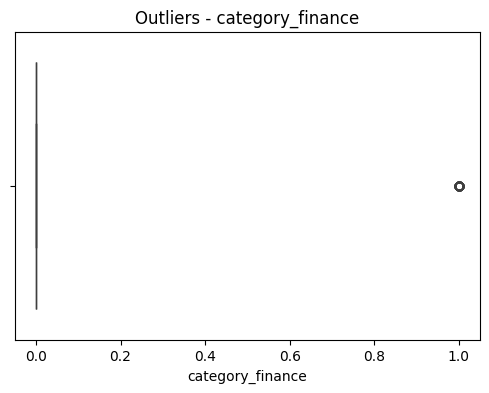

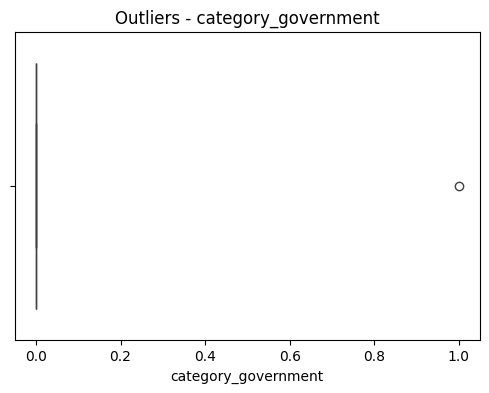

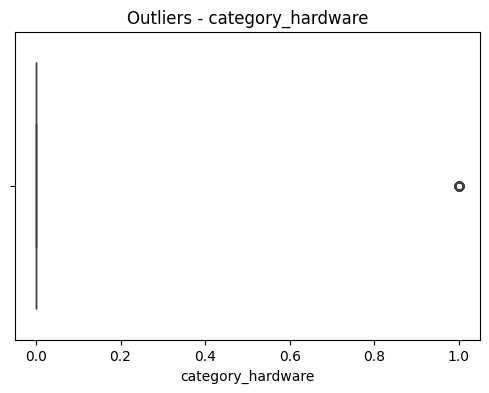

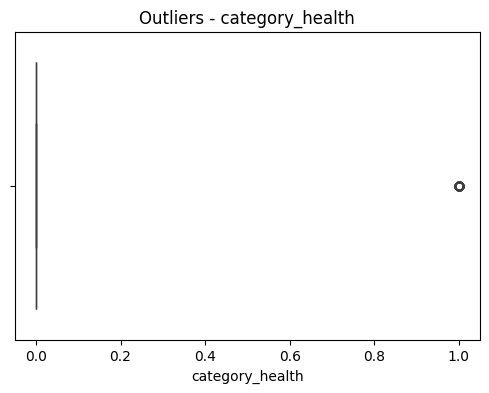

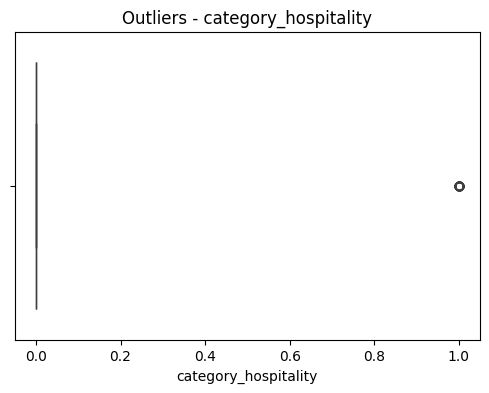

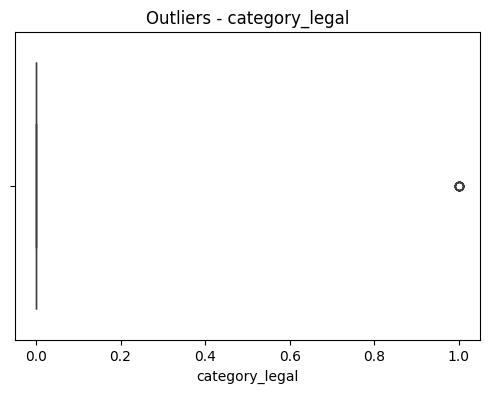

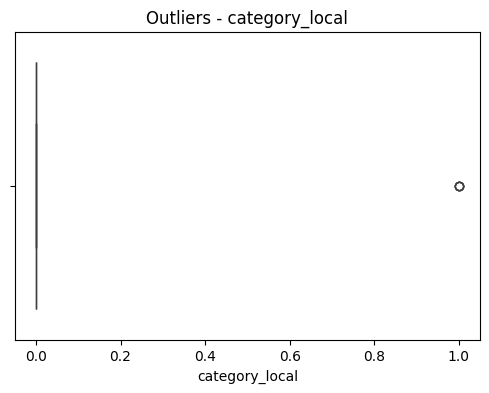

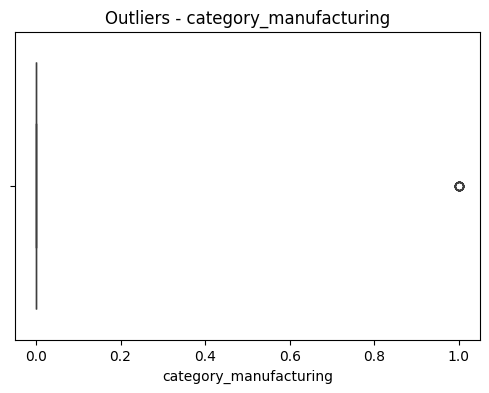

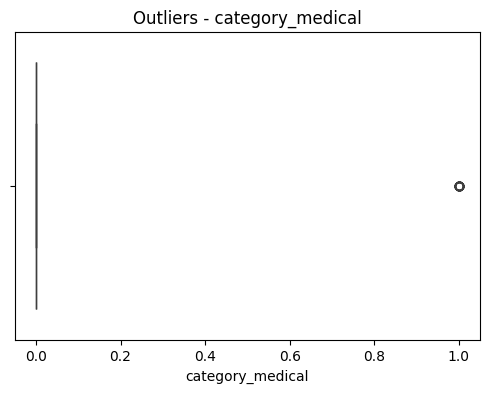

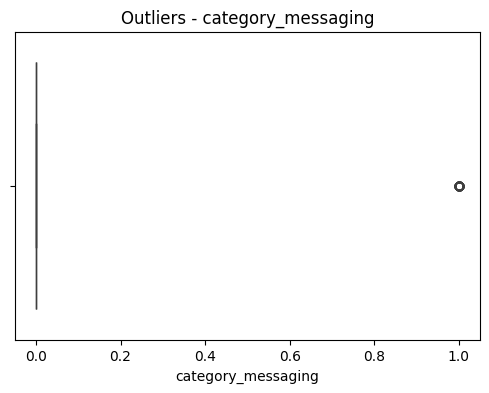

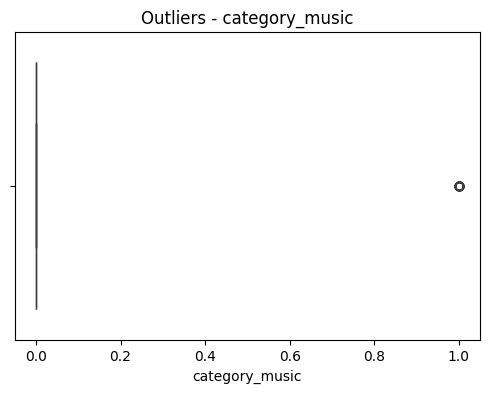

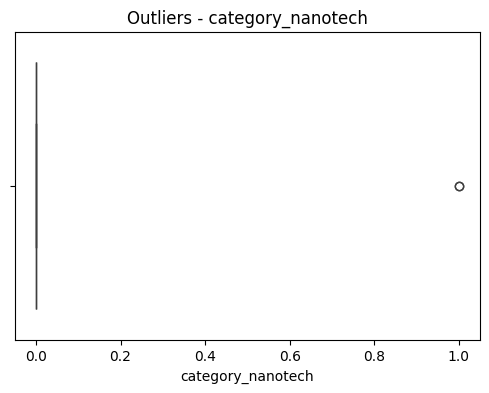

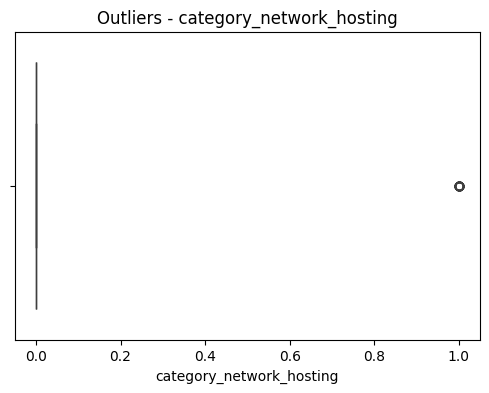

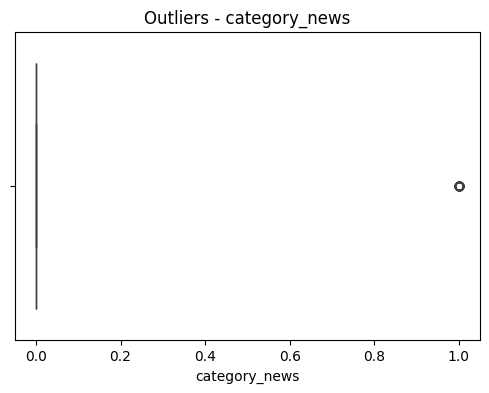

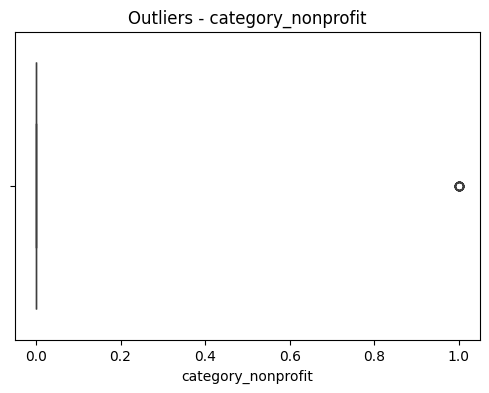

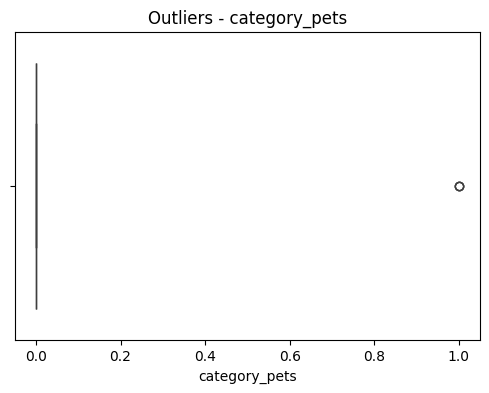

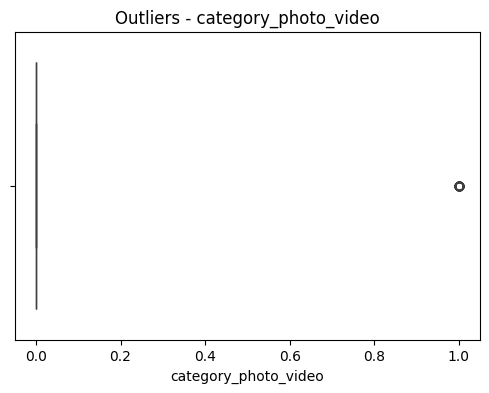

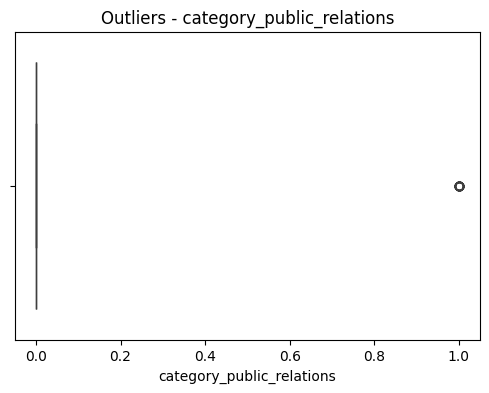

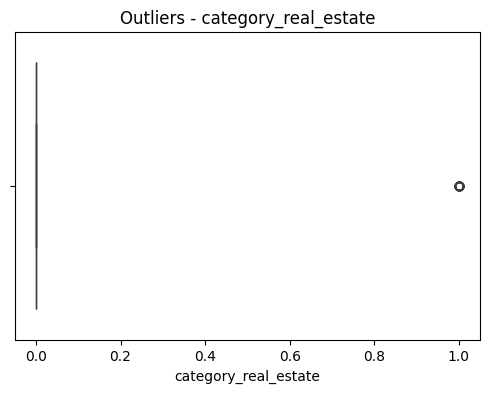

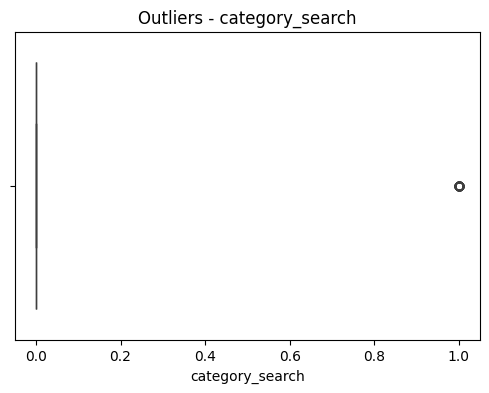

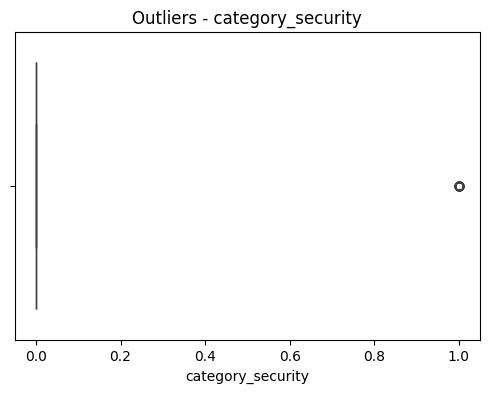

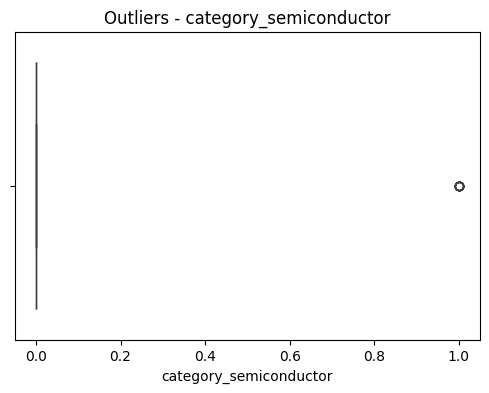

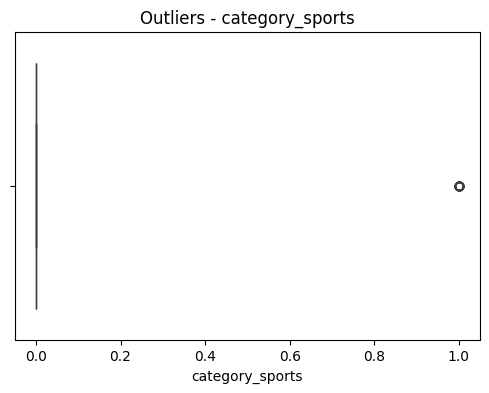

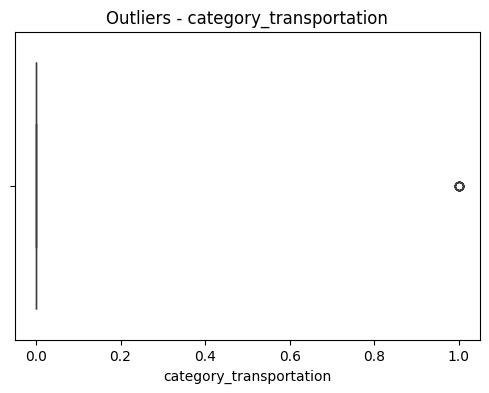

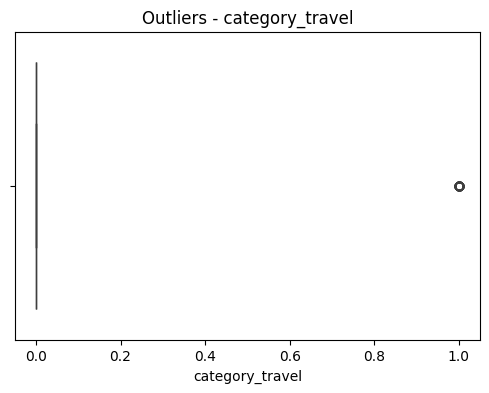

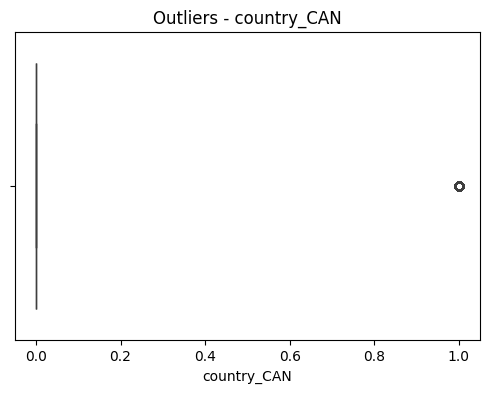

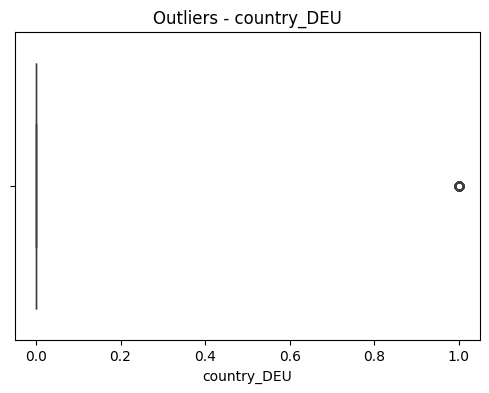

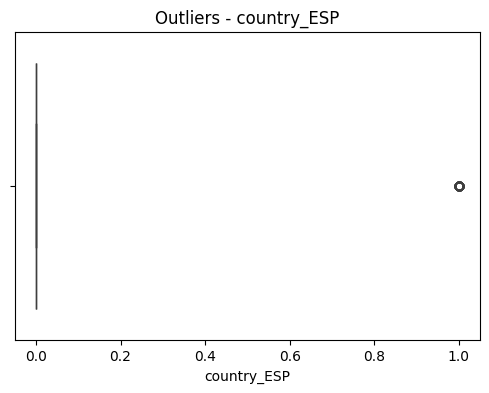

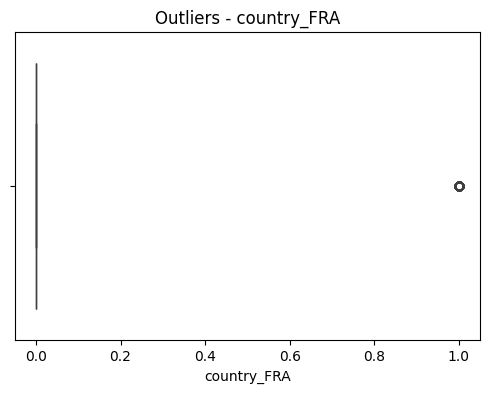

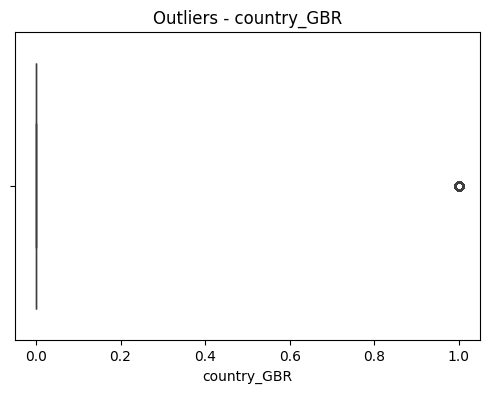

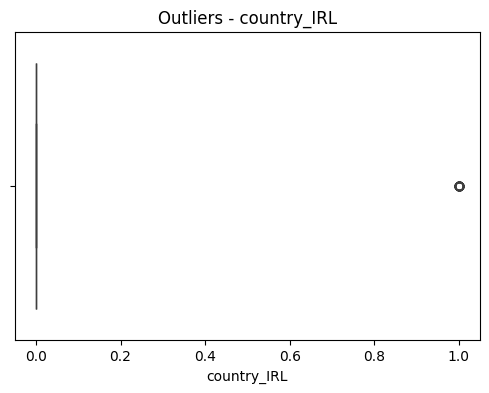

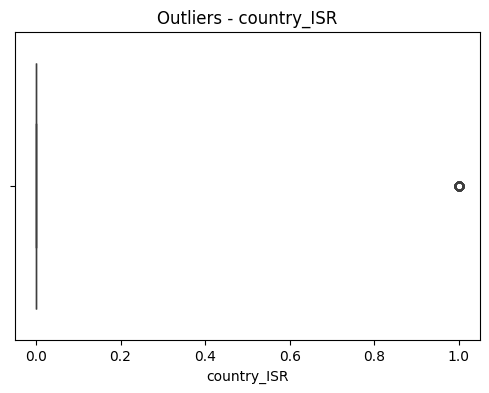

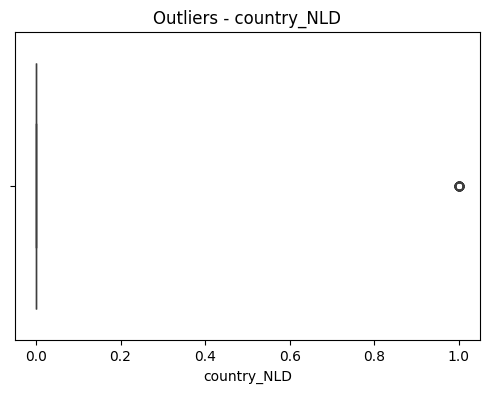

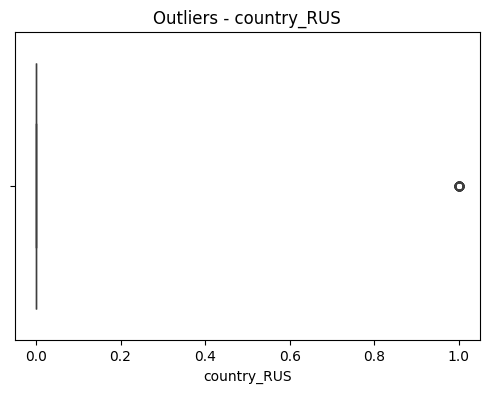

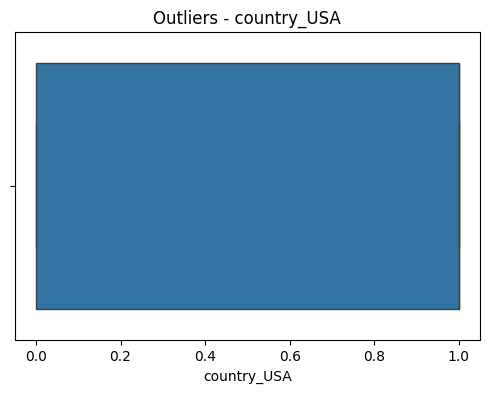

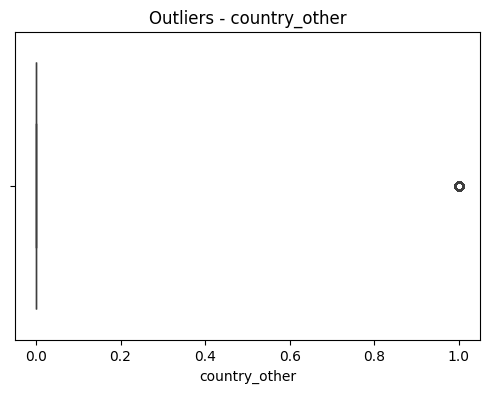

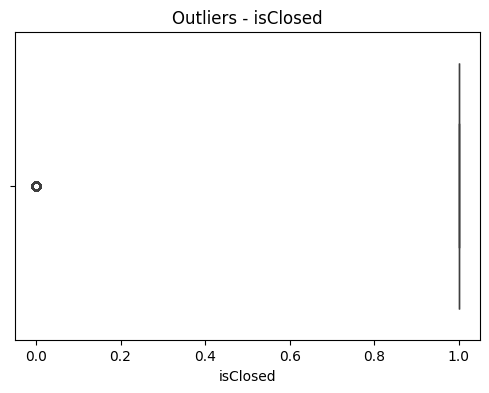

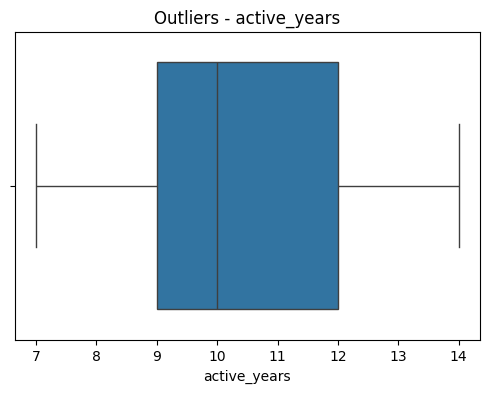

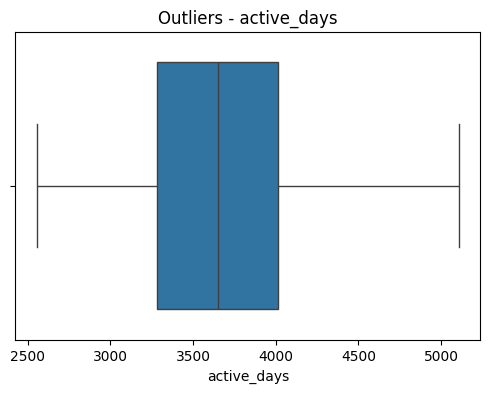

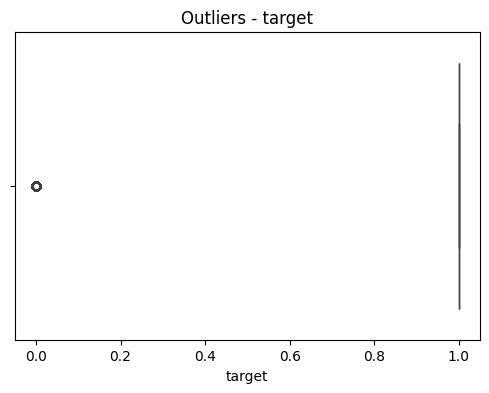

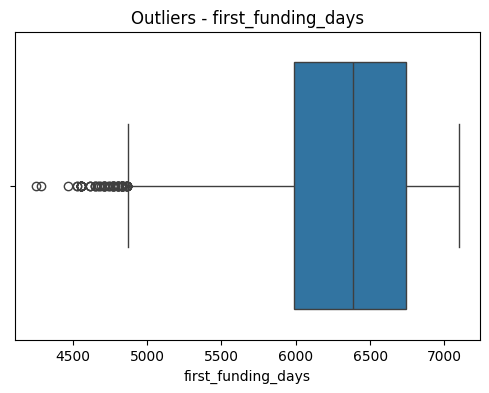

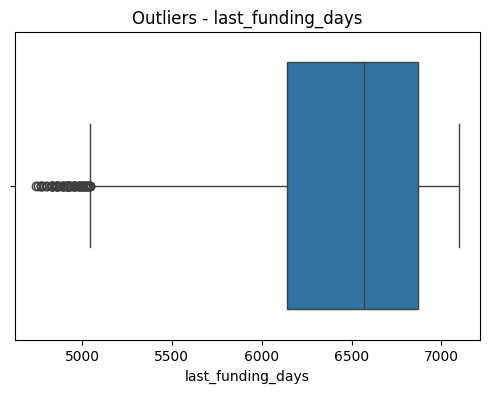

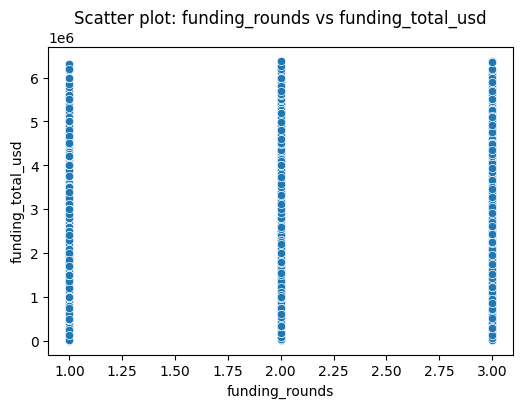

In [100]:
num_cols = my_data.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=my_data[col])
    plt.title(f"Outliers - {col}")
    plt.show()
if len(num_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=my_data, x=num_cols[0], y=num_cols[1])
    plt.title(f"Scatter plot: {num_cols[0]} vs {num_cols[1]}")
    plt.show()


# 📌 Interpretation of Outlier Removal
As shown in the boxplots, the extreme values (outliers) have been successfully removed.  

- The binary columns resulting from encoding may appear as outliers, but this is **simply a representation of the minority class**.  
- These are **not real outliers**. Removing them would risk losing important information from the dataset.  
- Overall, the dataset is now cleaner, and extreme numerical values no longer distort the distribution, improving the quality for analysis and modeling.


## **Univariate Analysis**

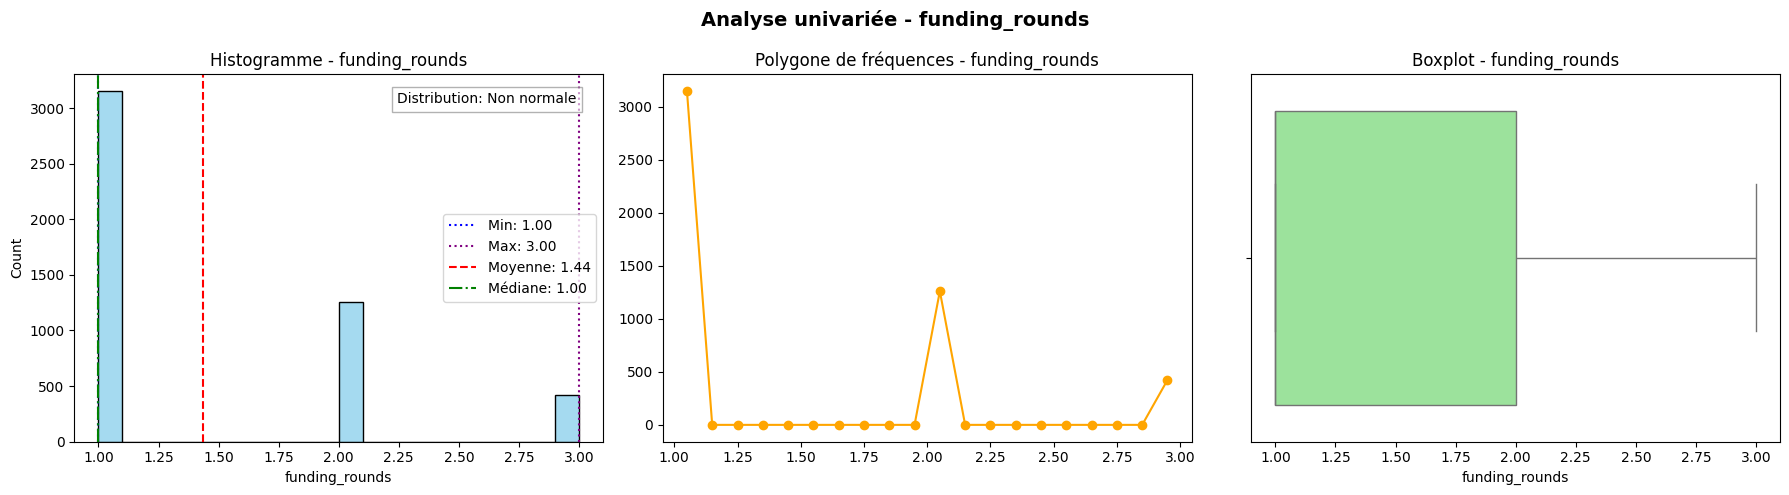

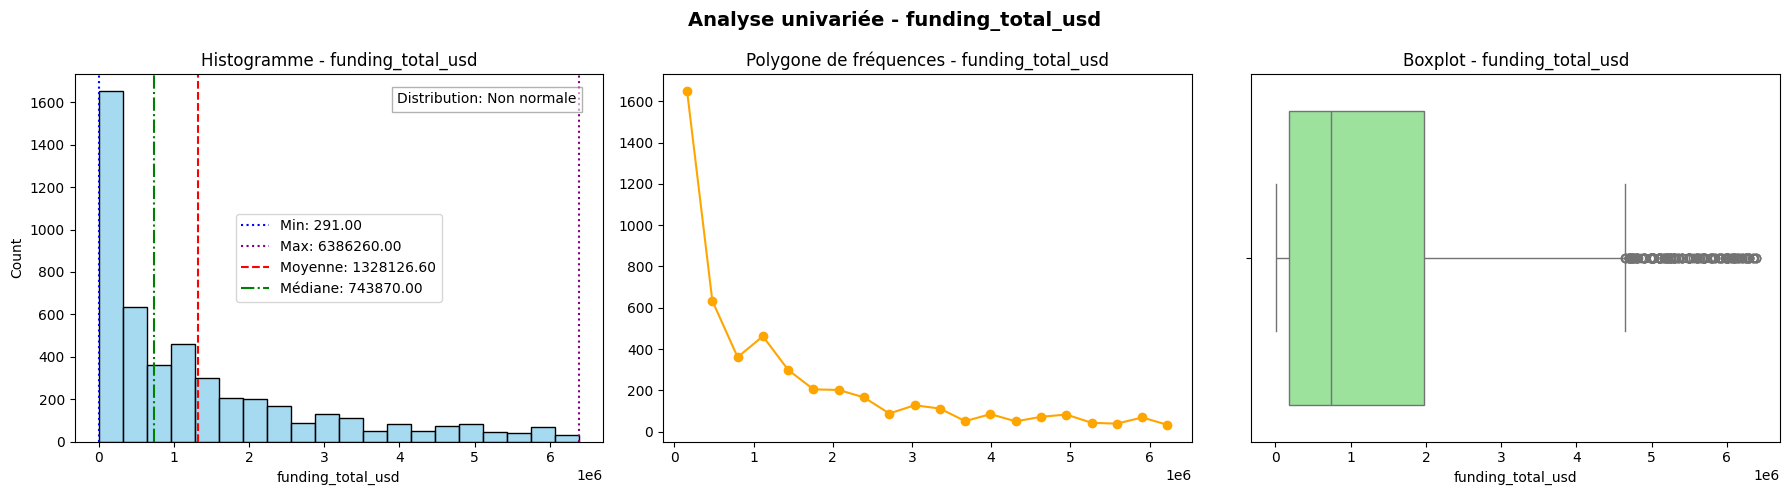

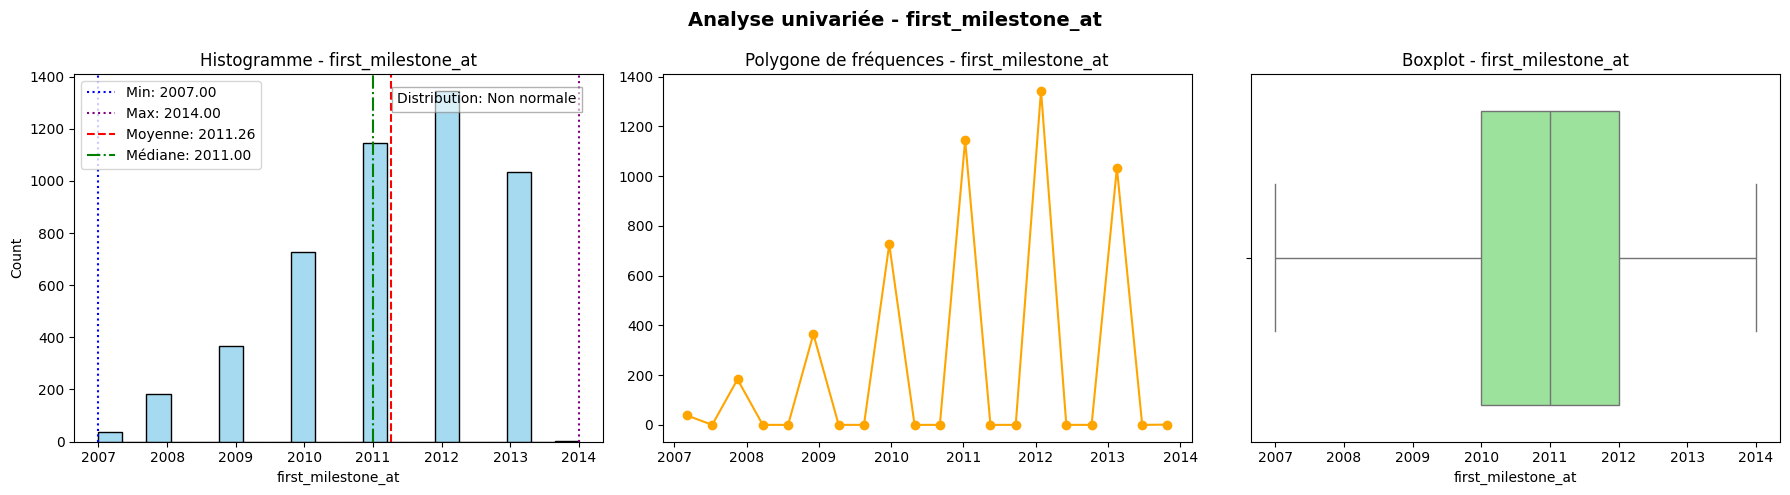

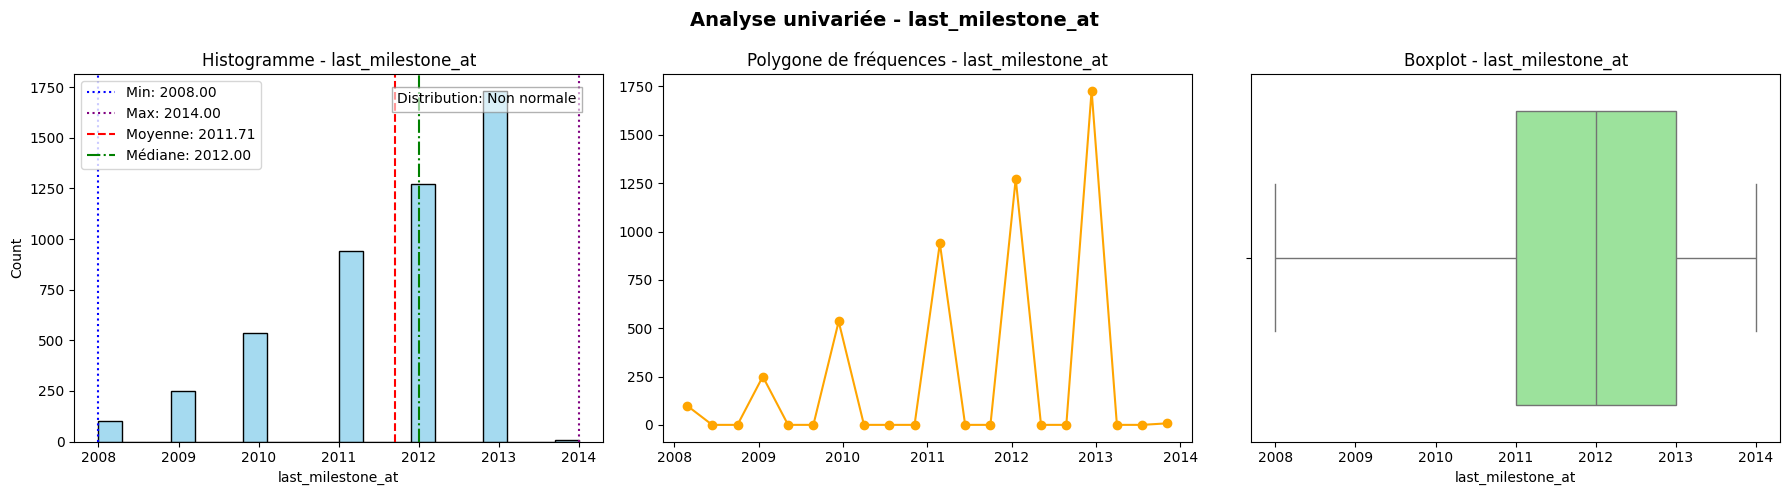

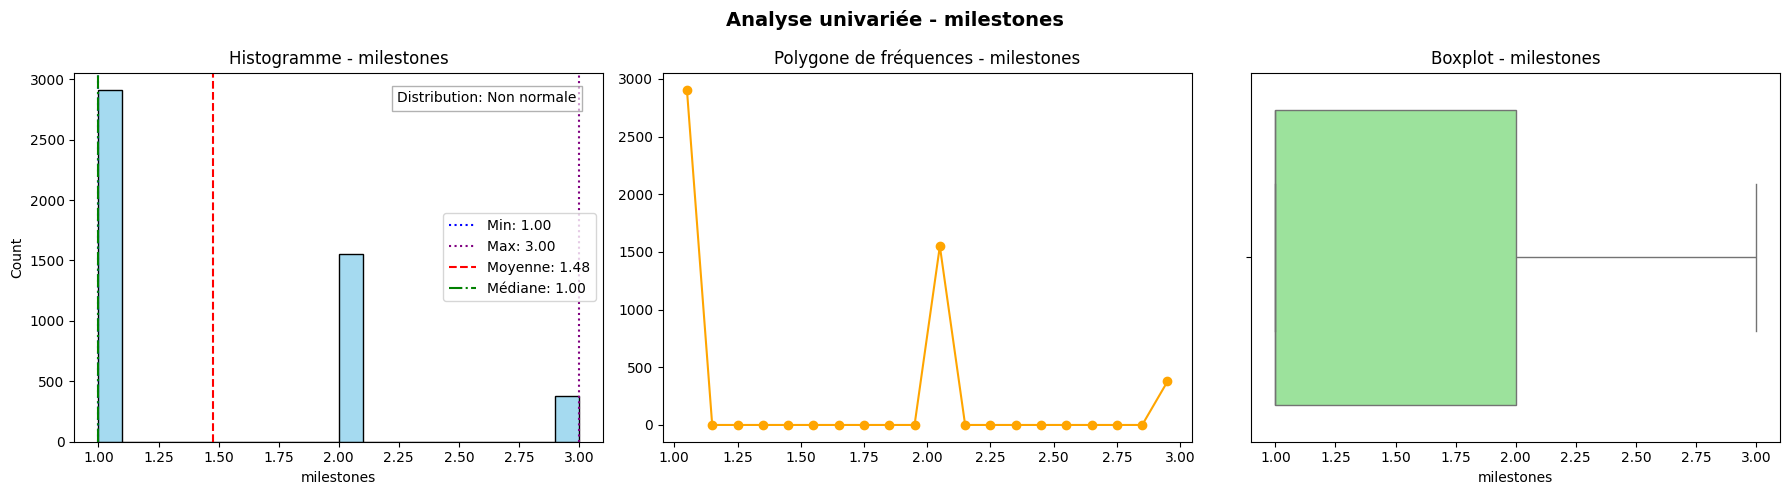

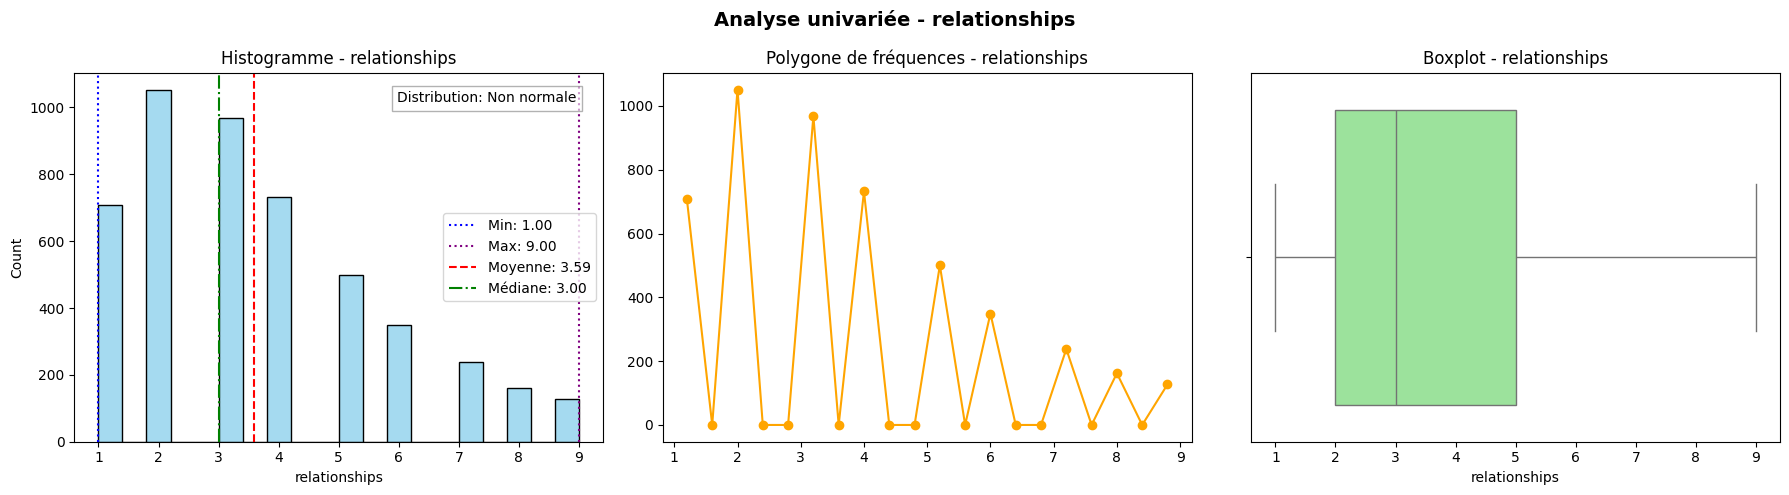

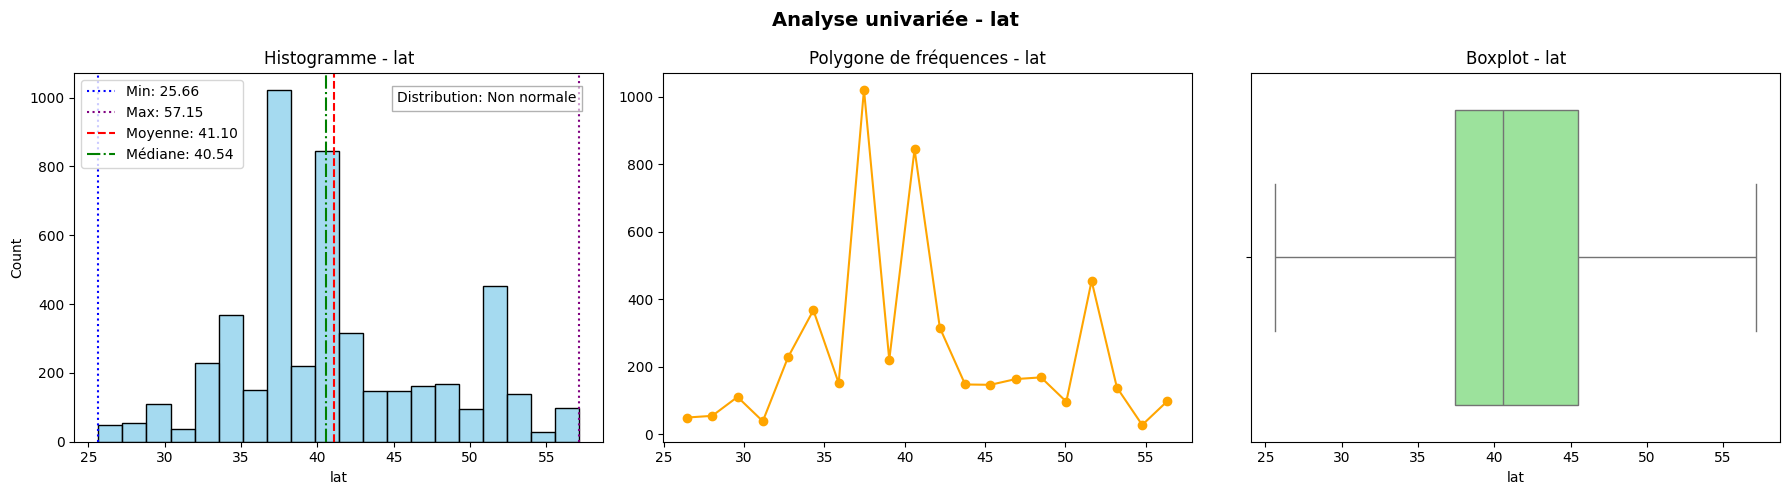

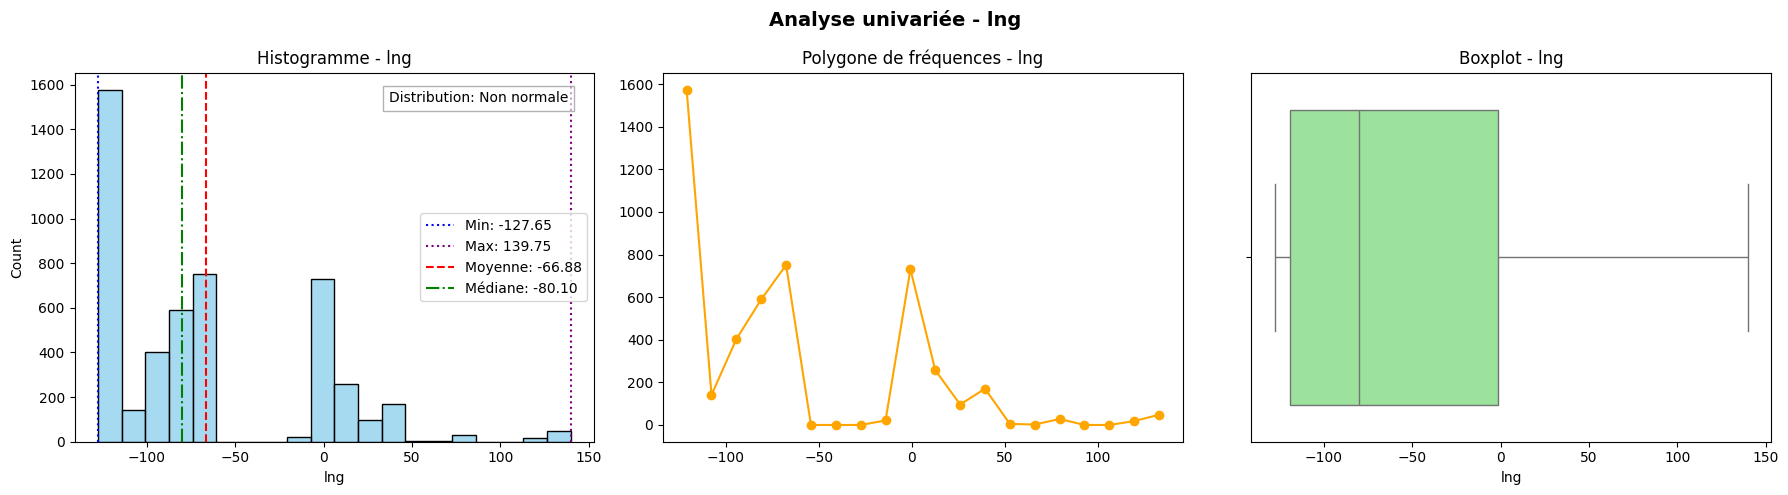

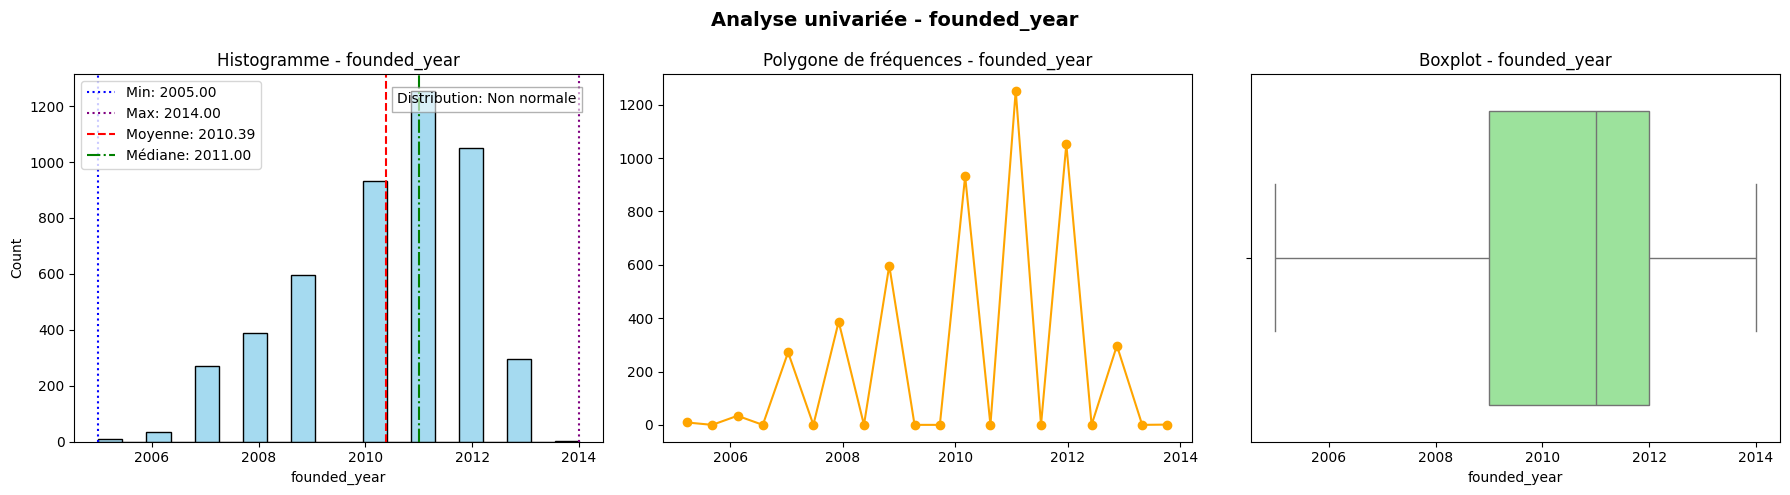

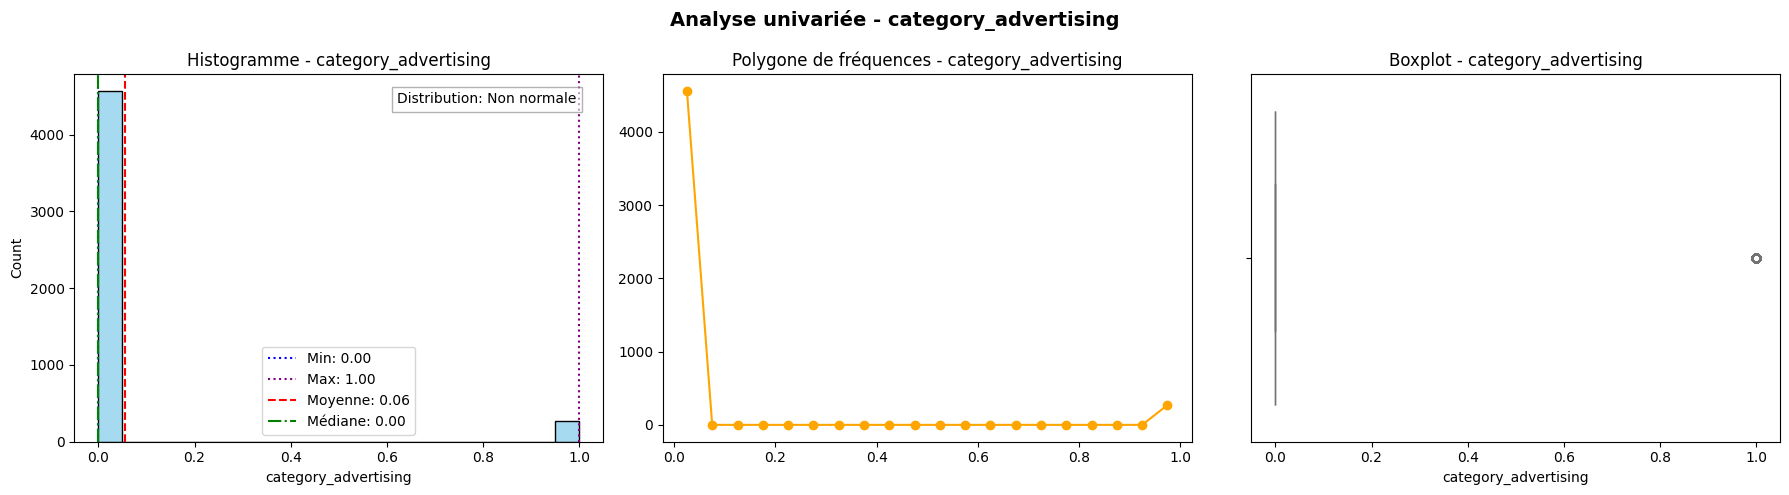

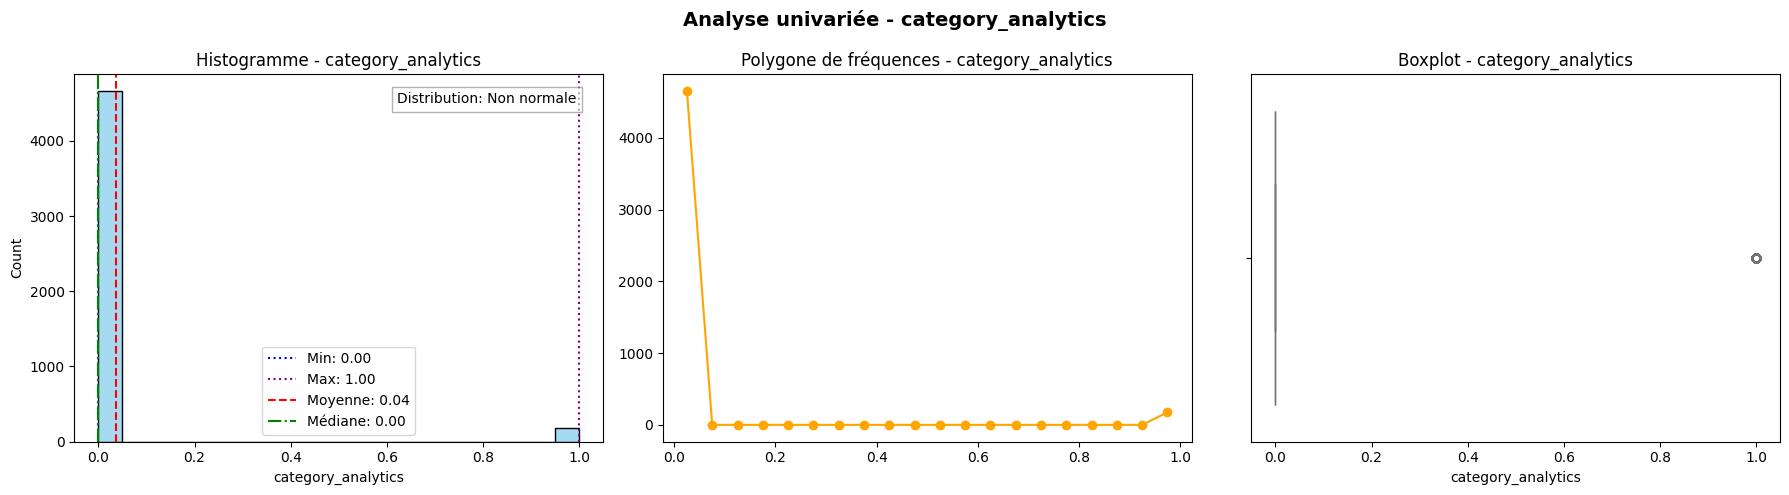

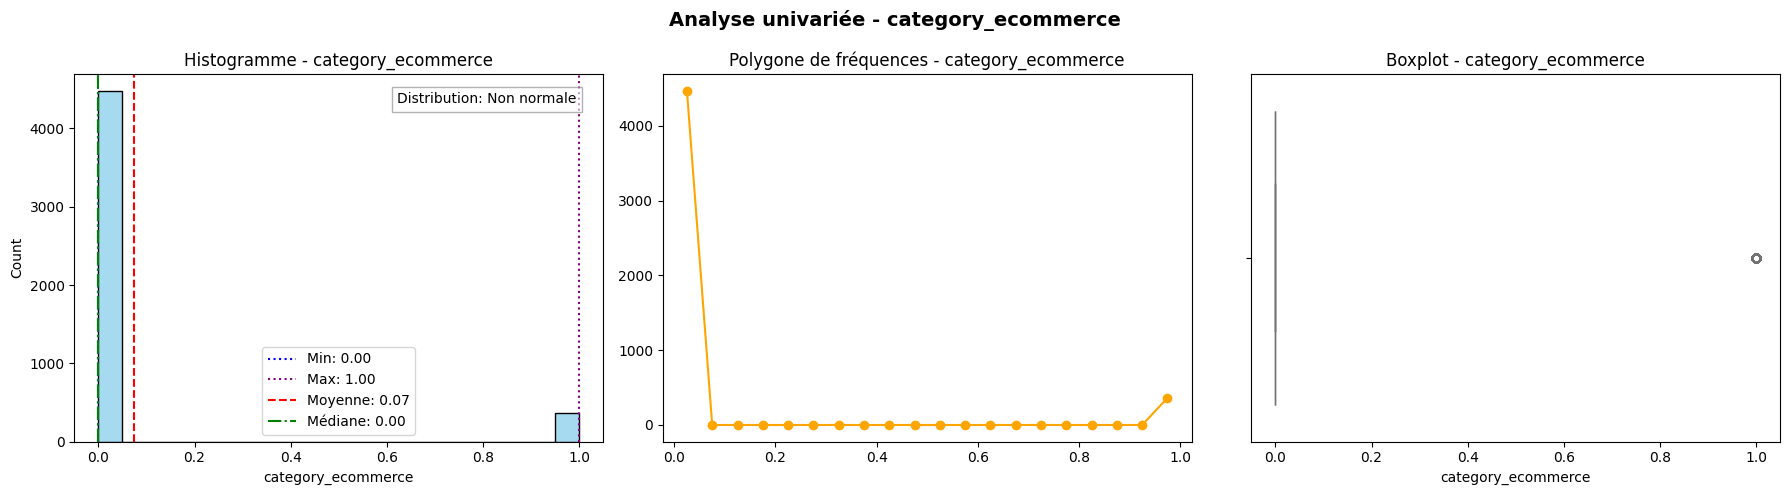

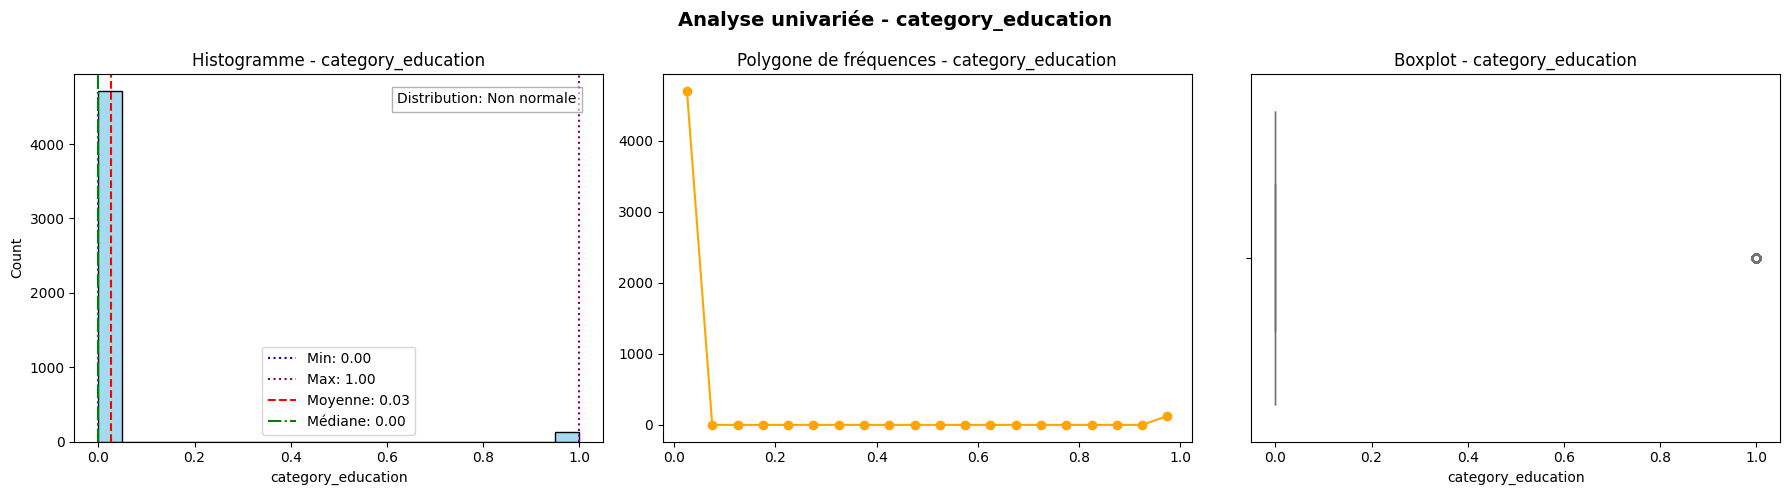

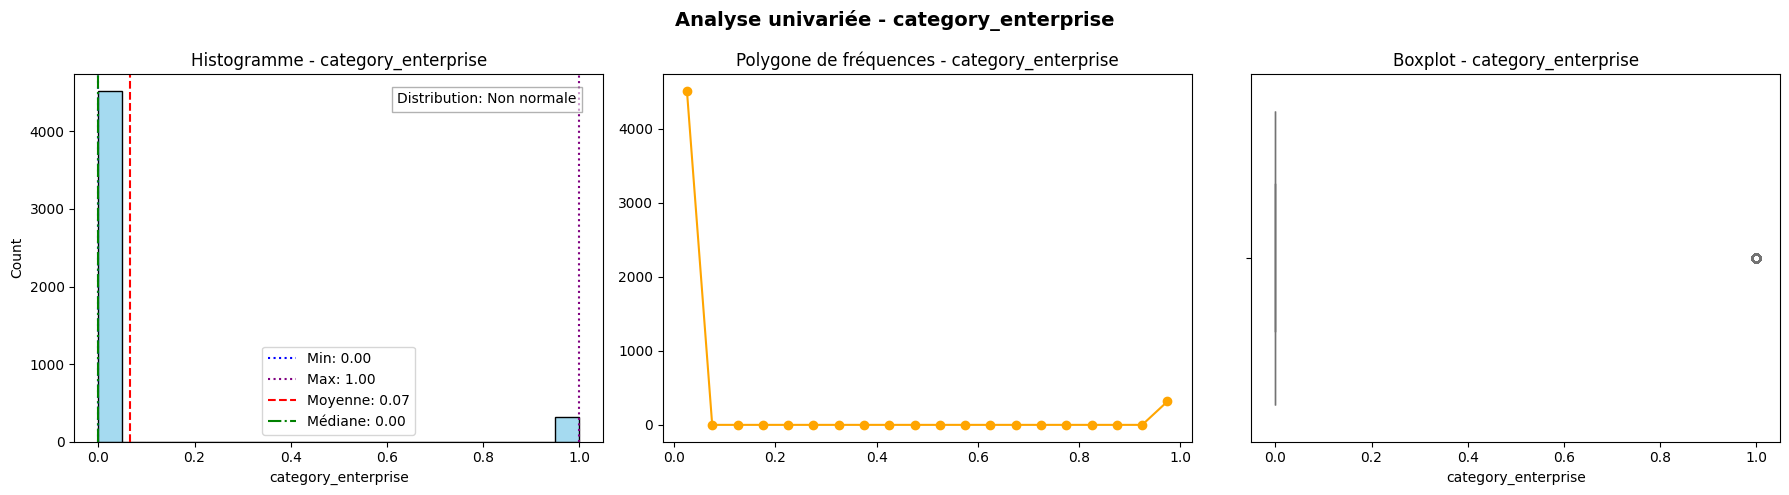

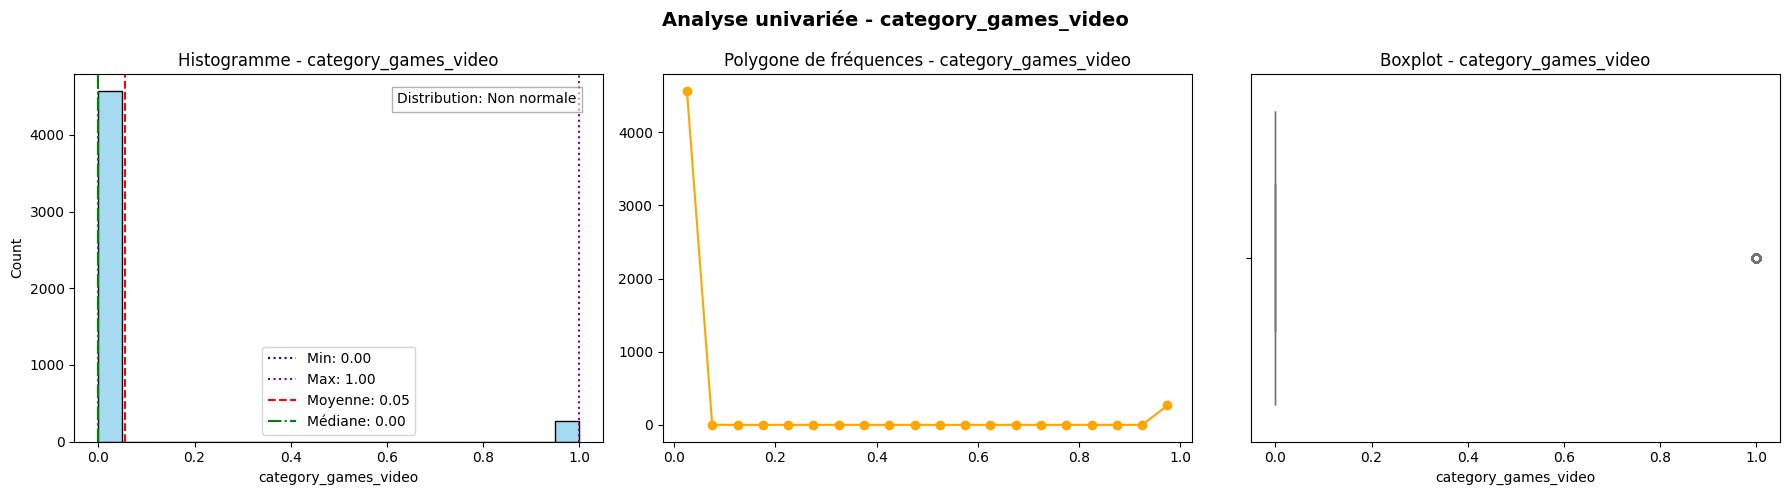

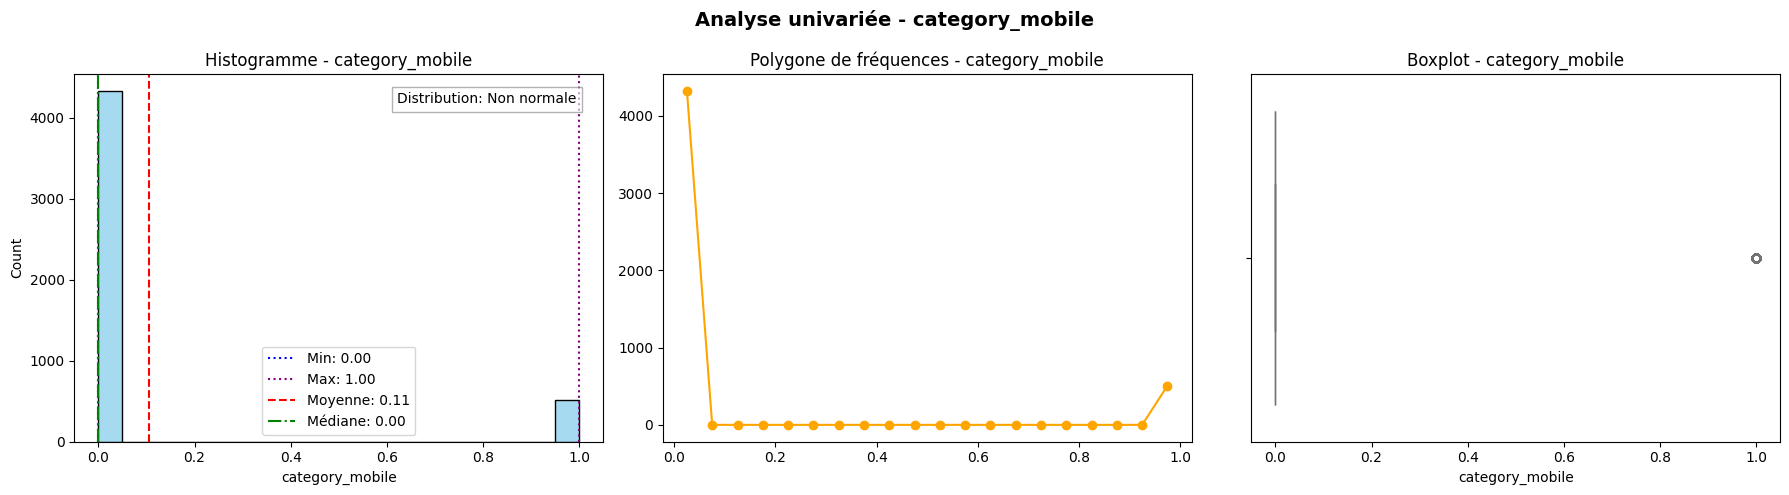

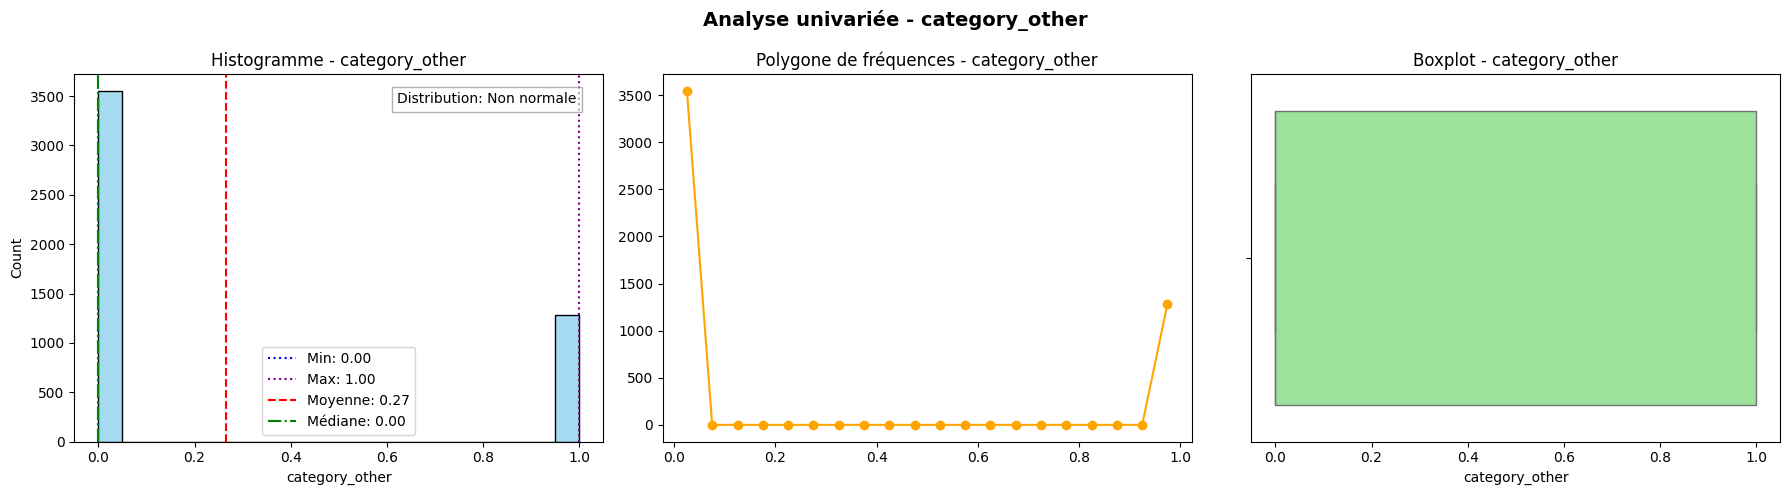

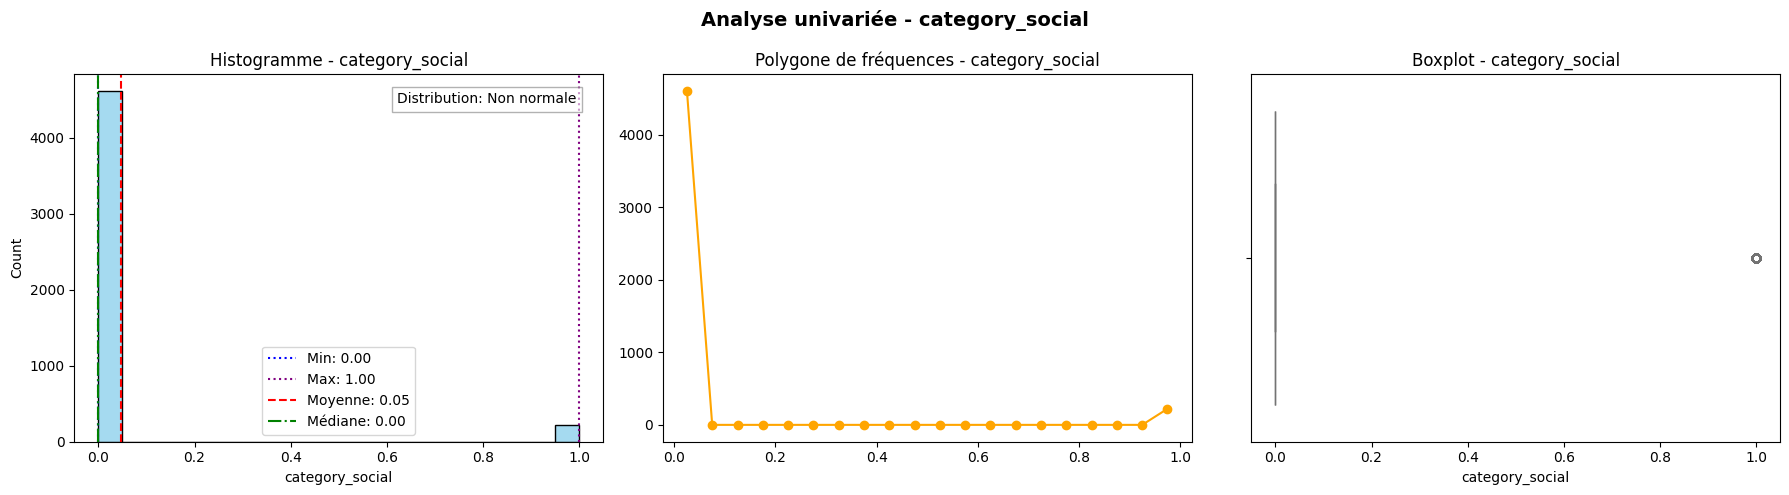

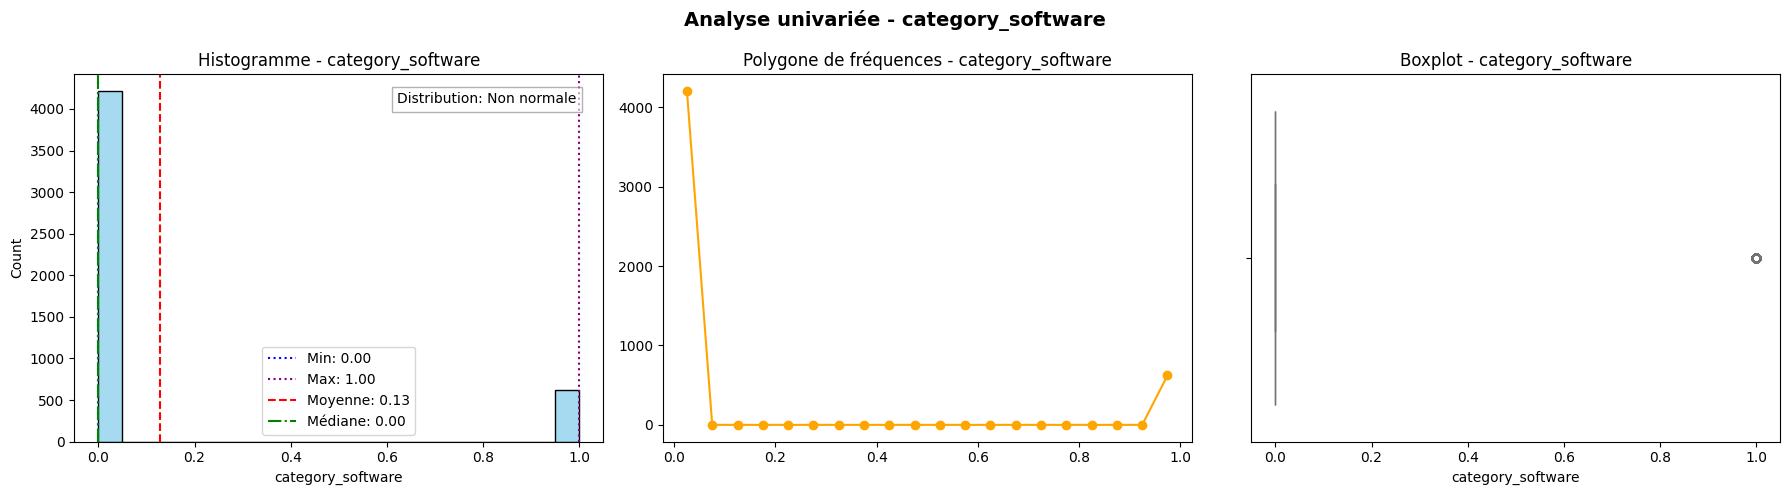

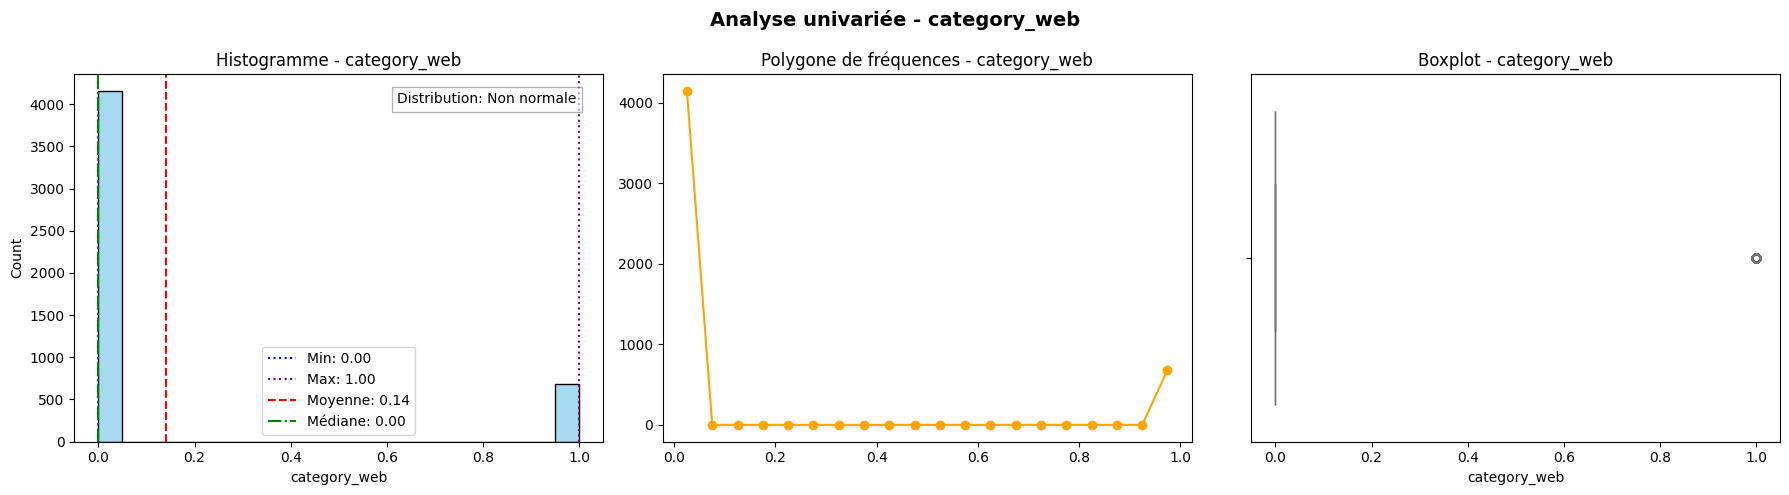

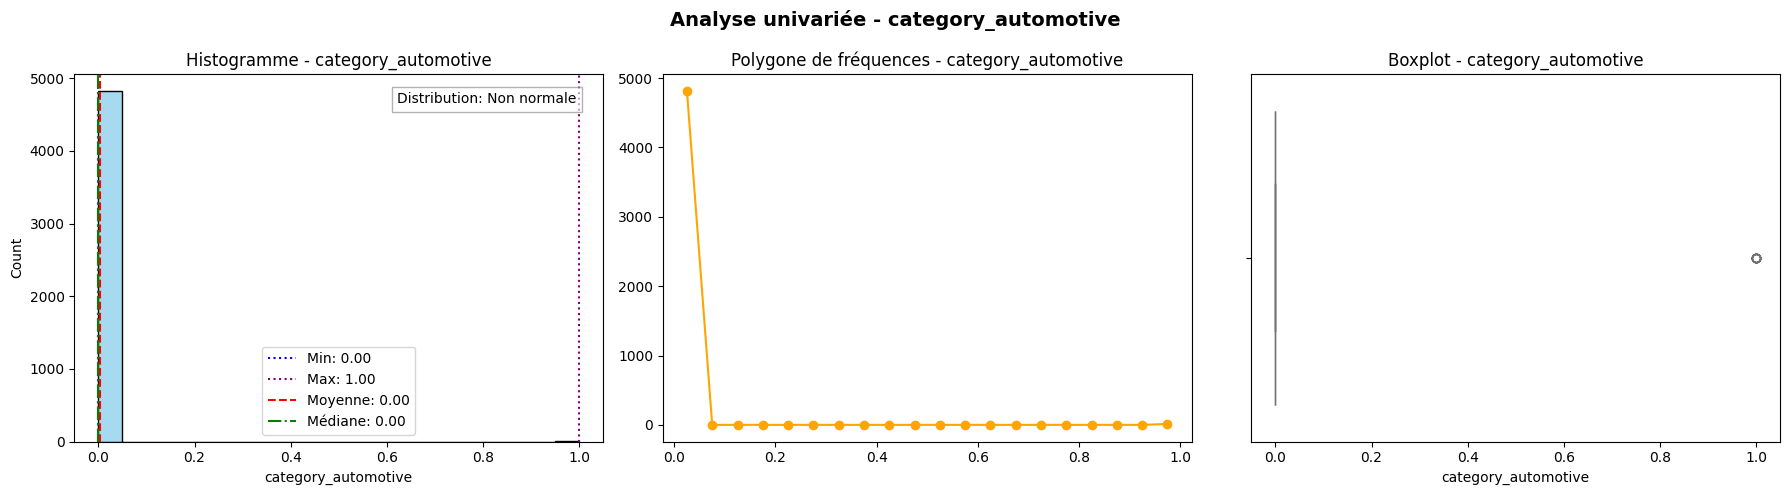

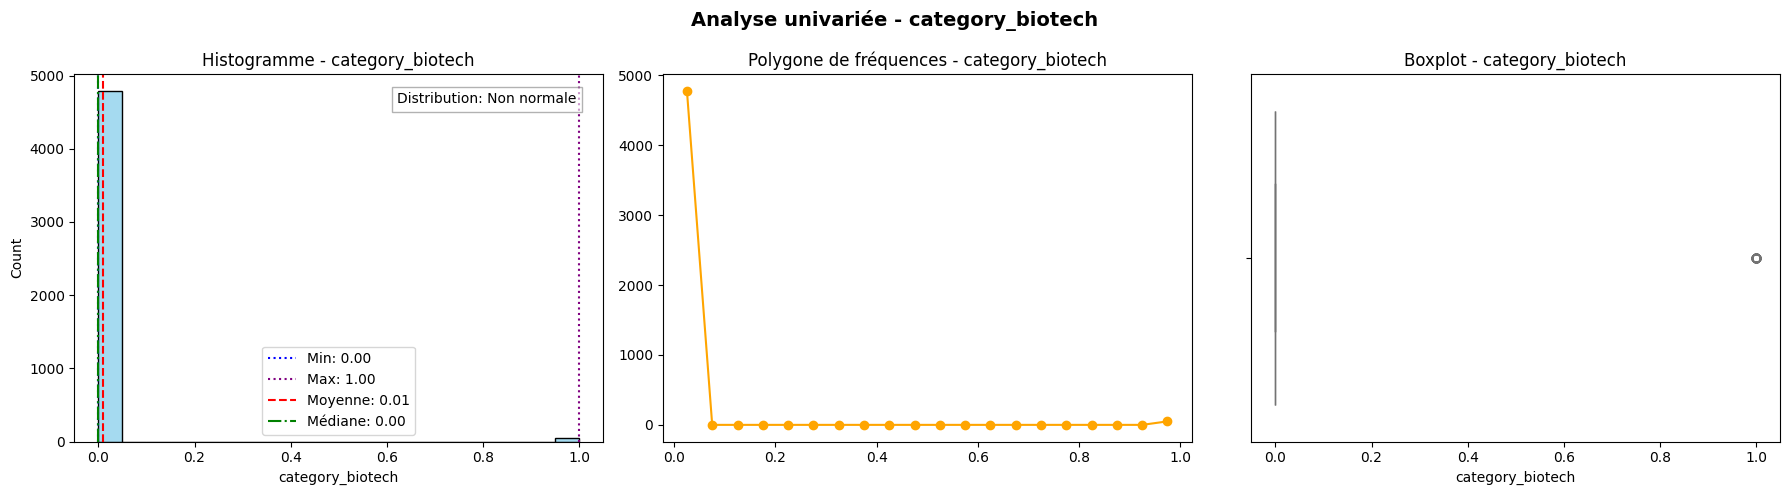

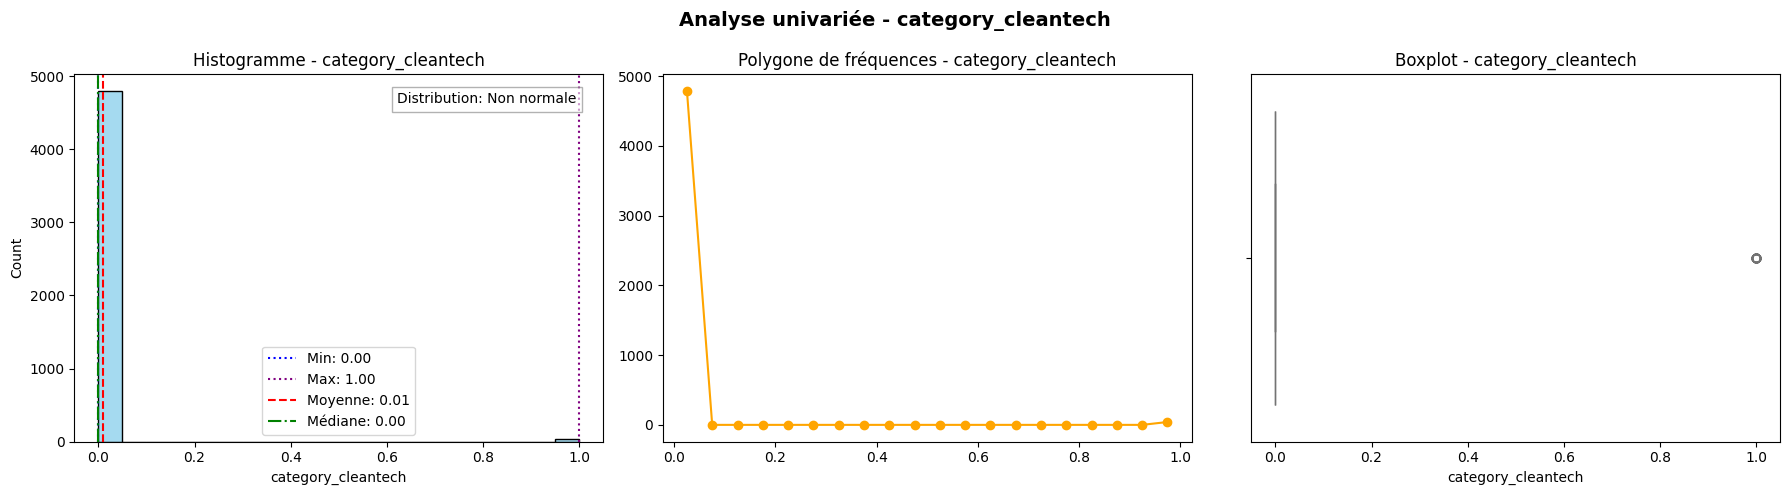

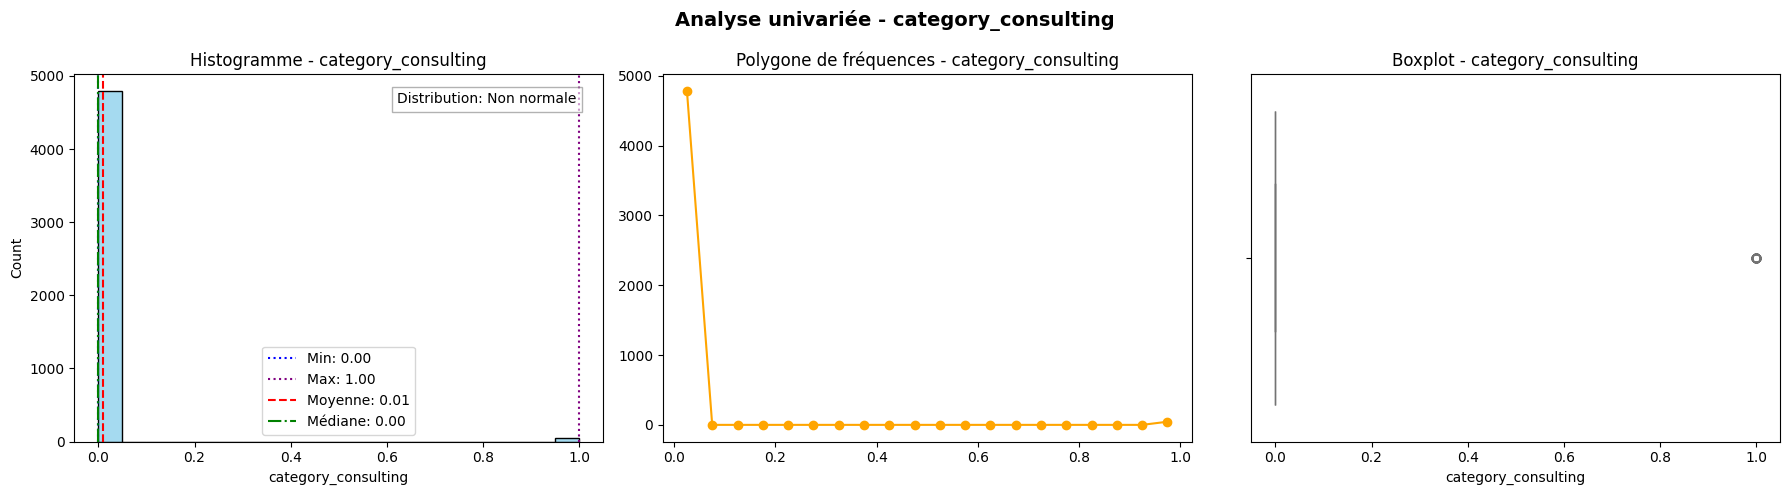

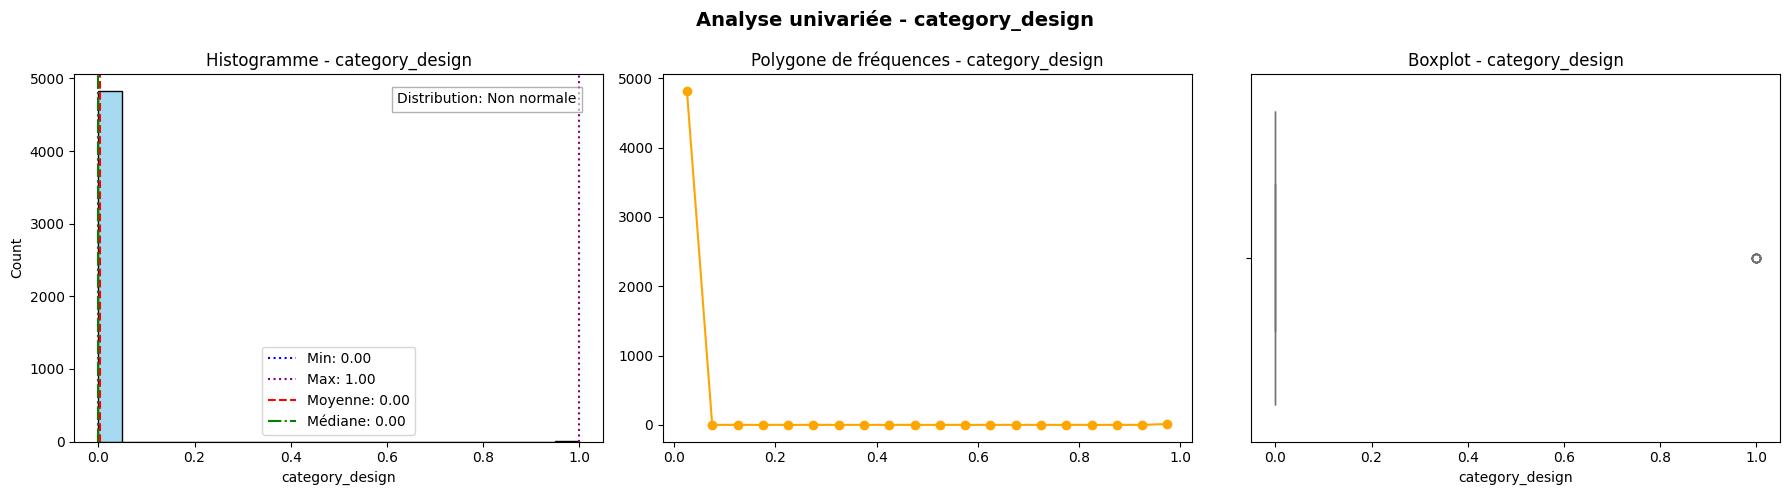

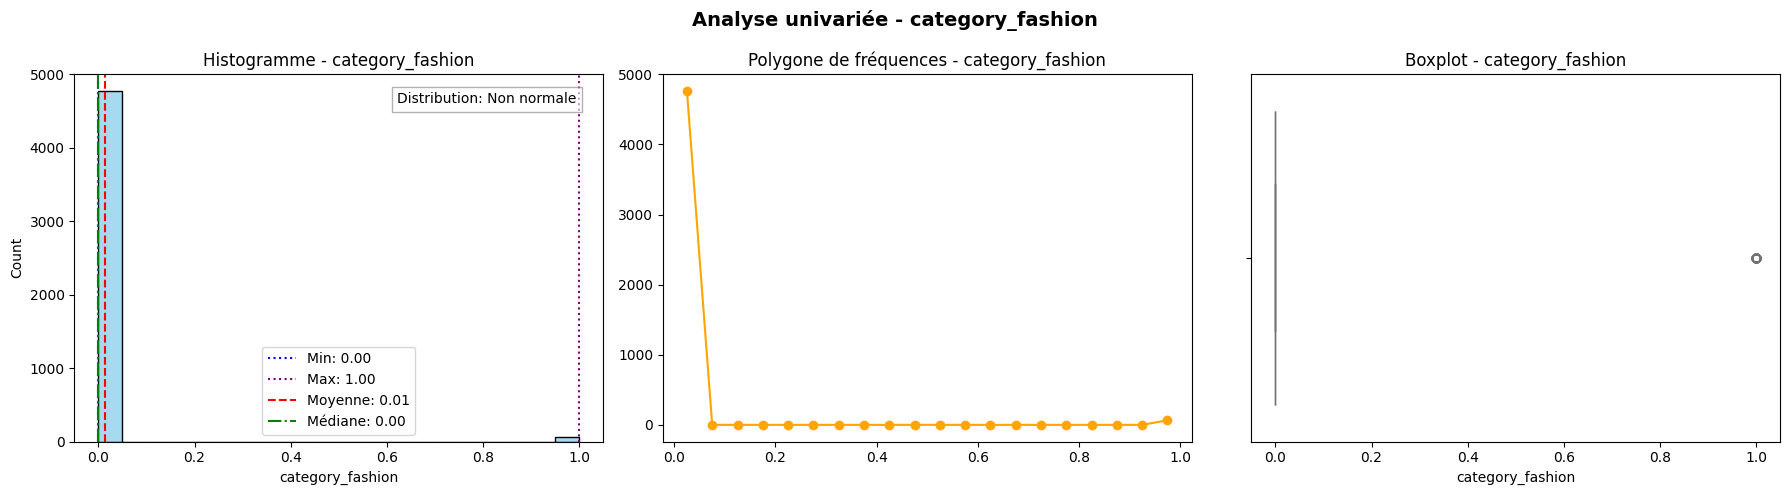

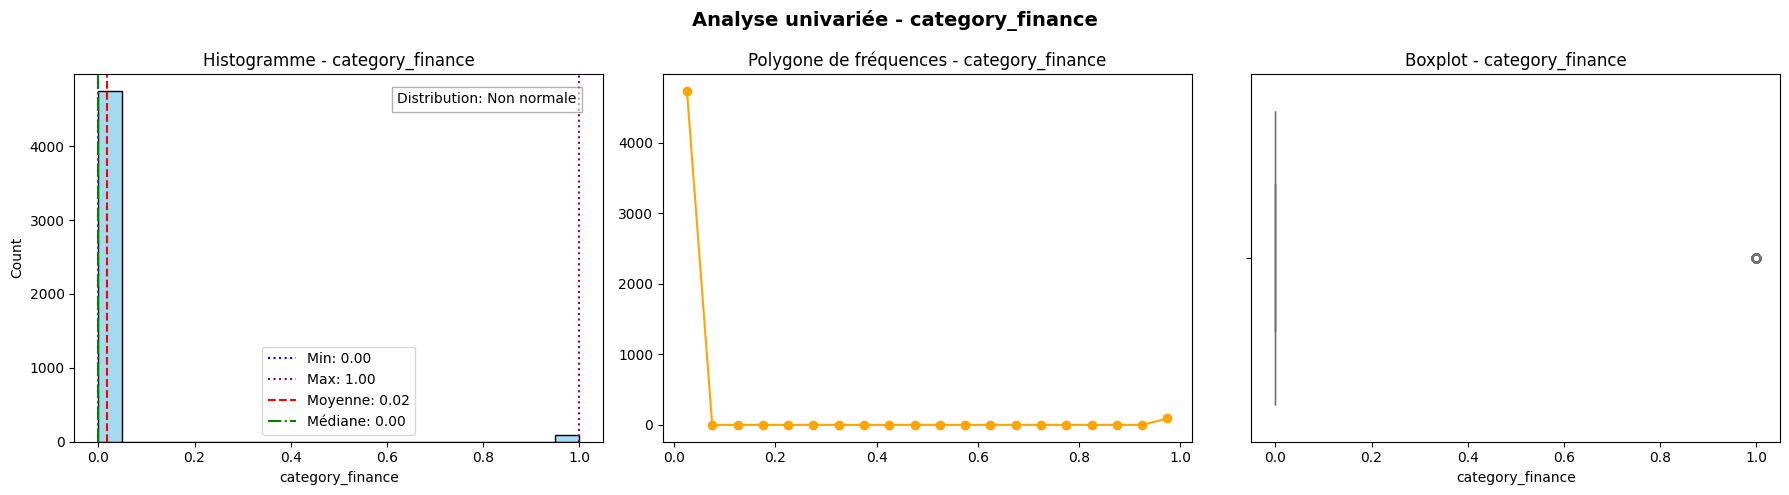

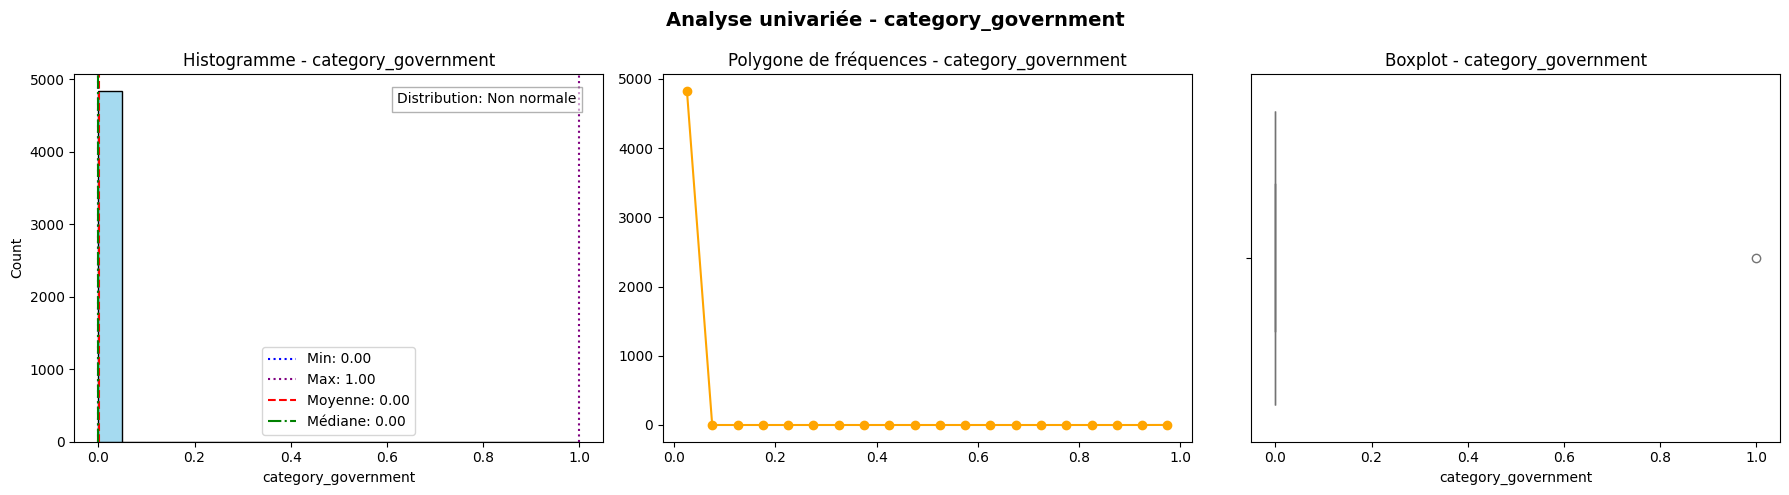

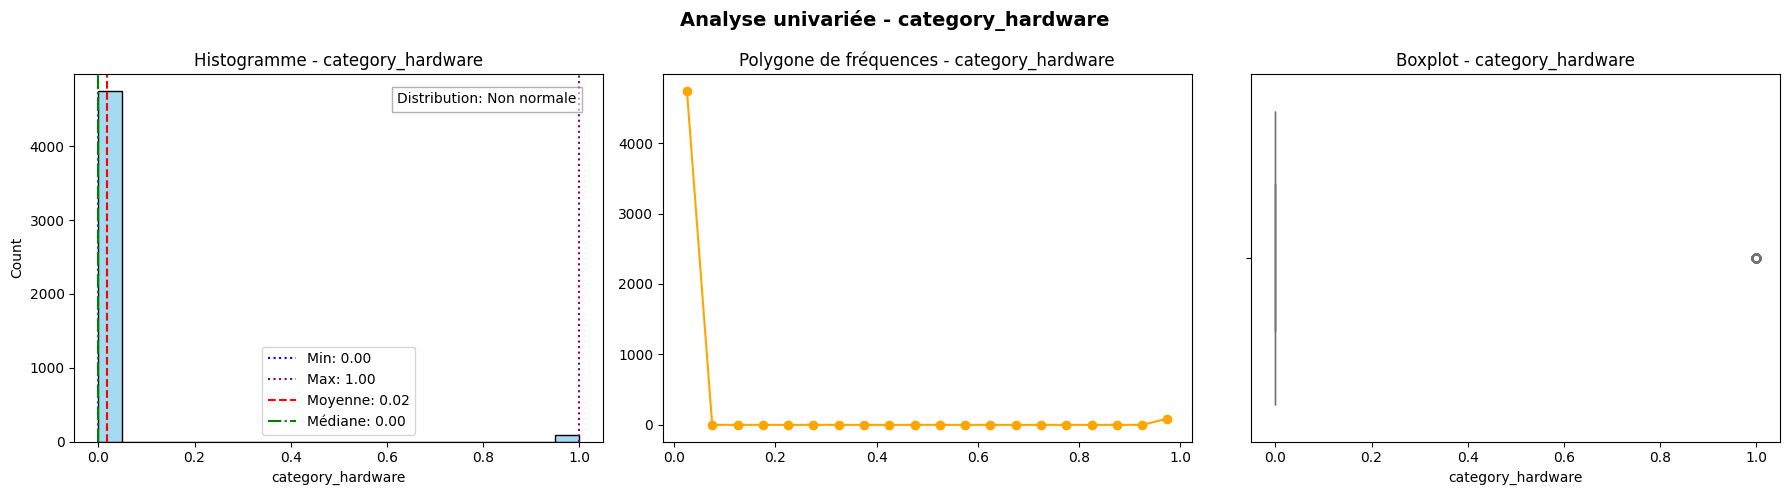

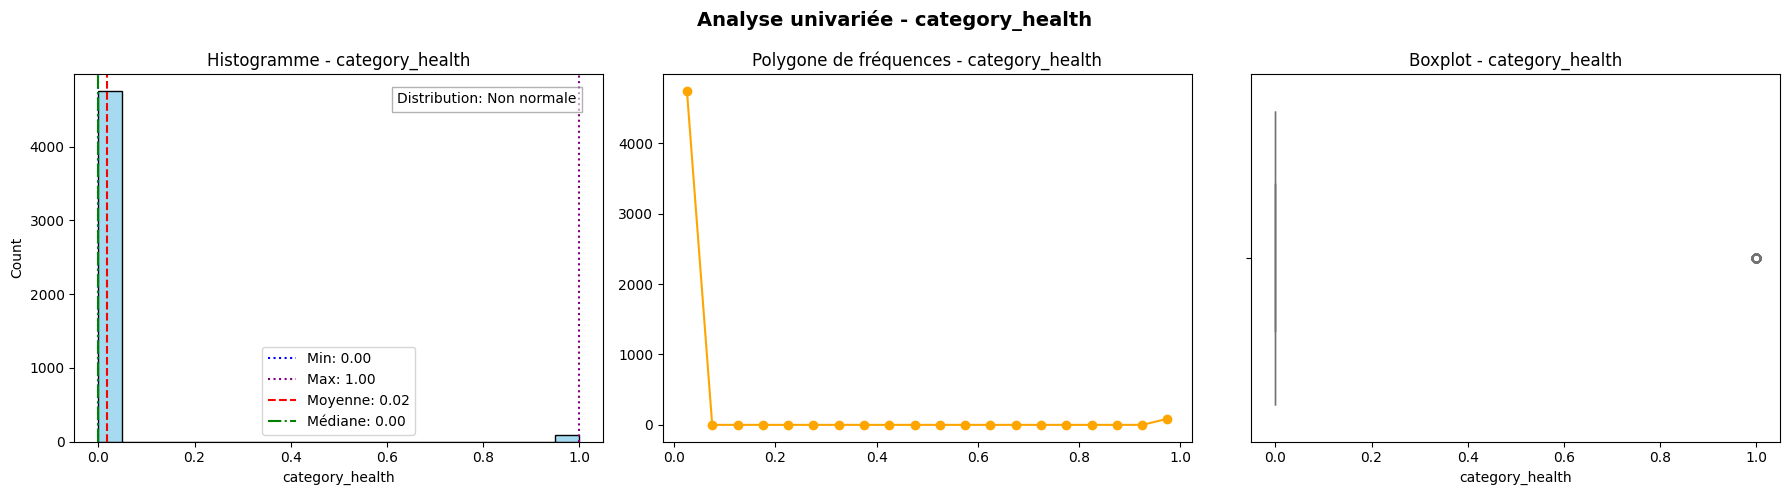

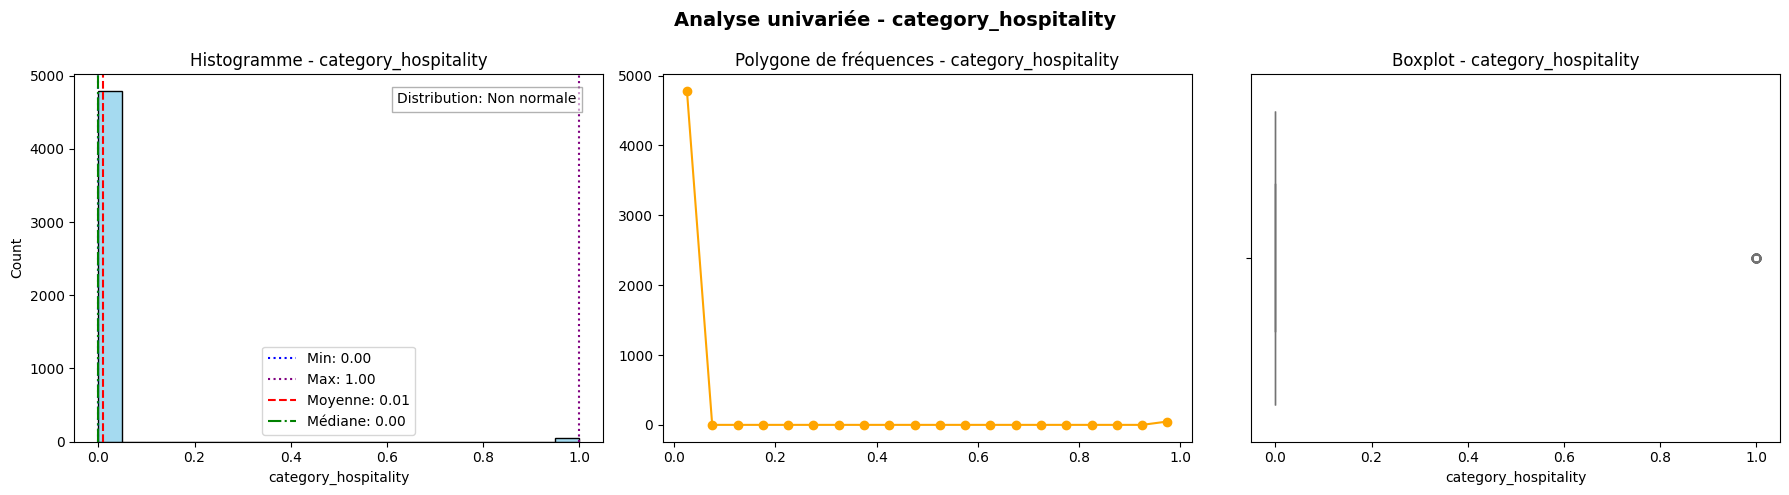

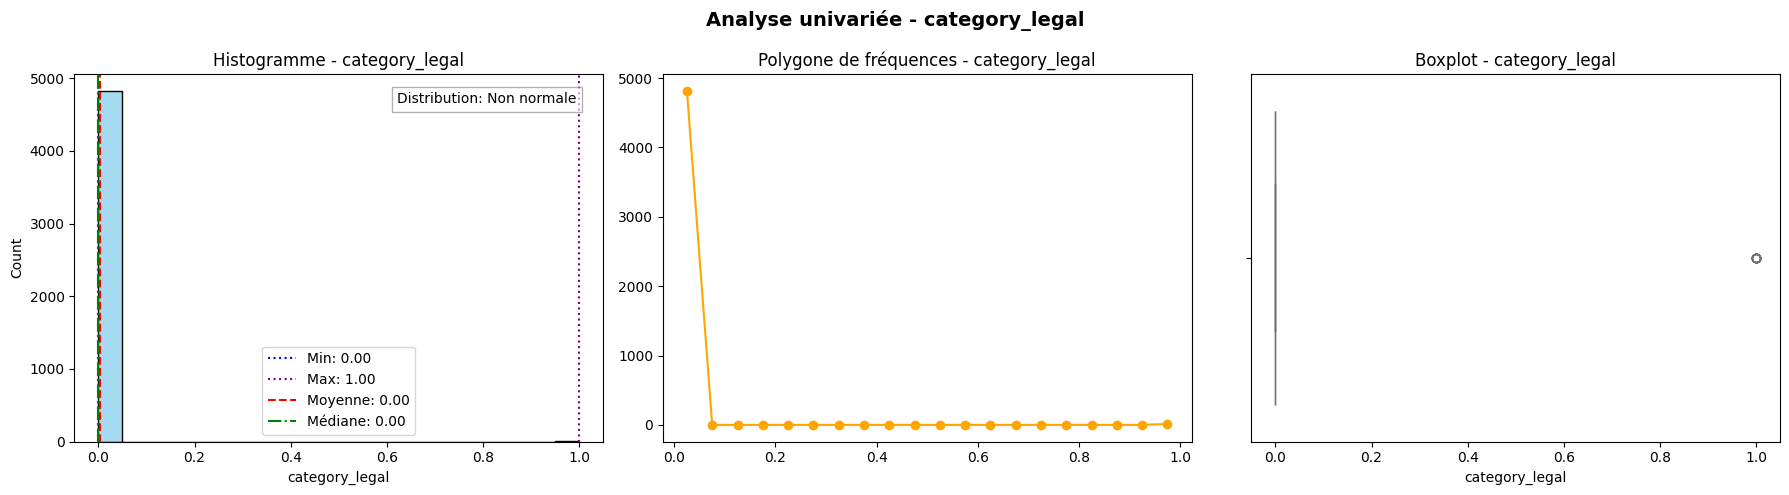

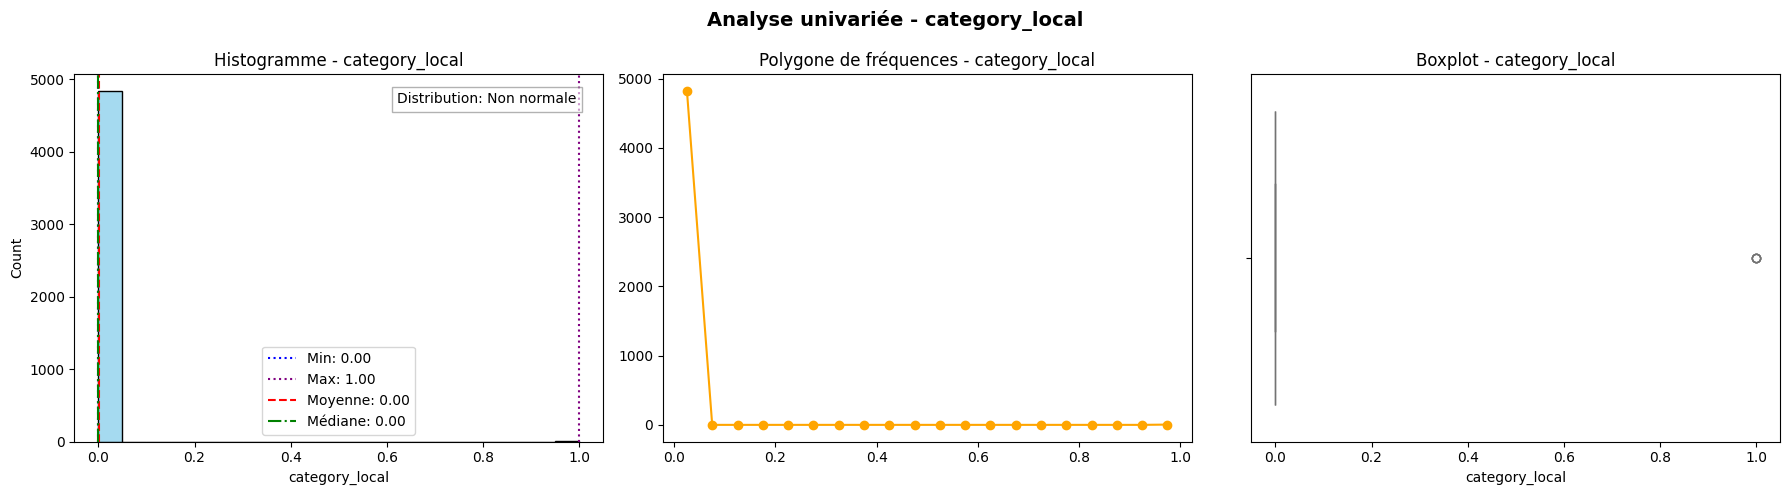

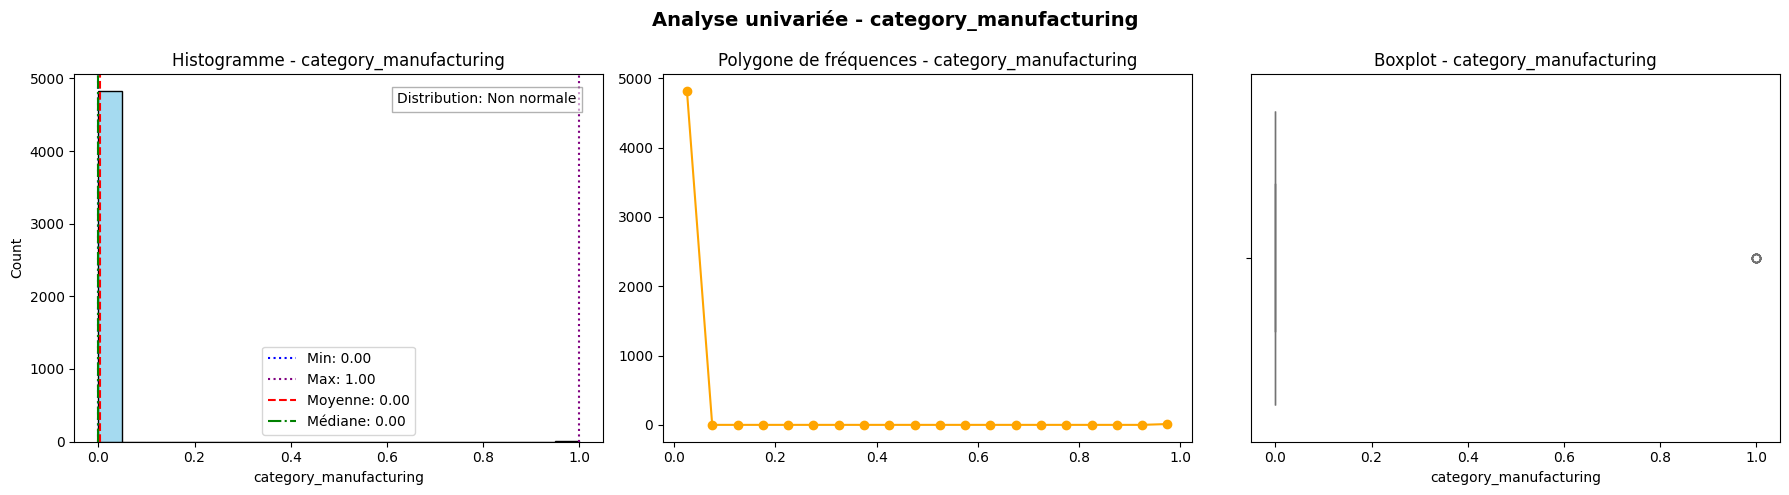

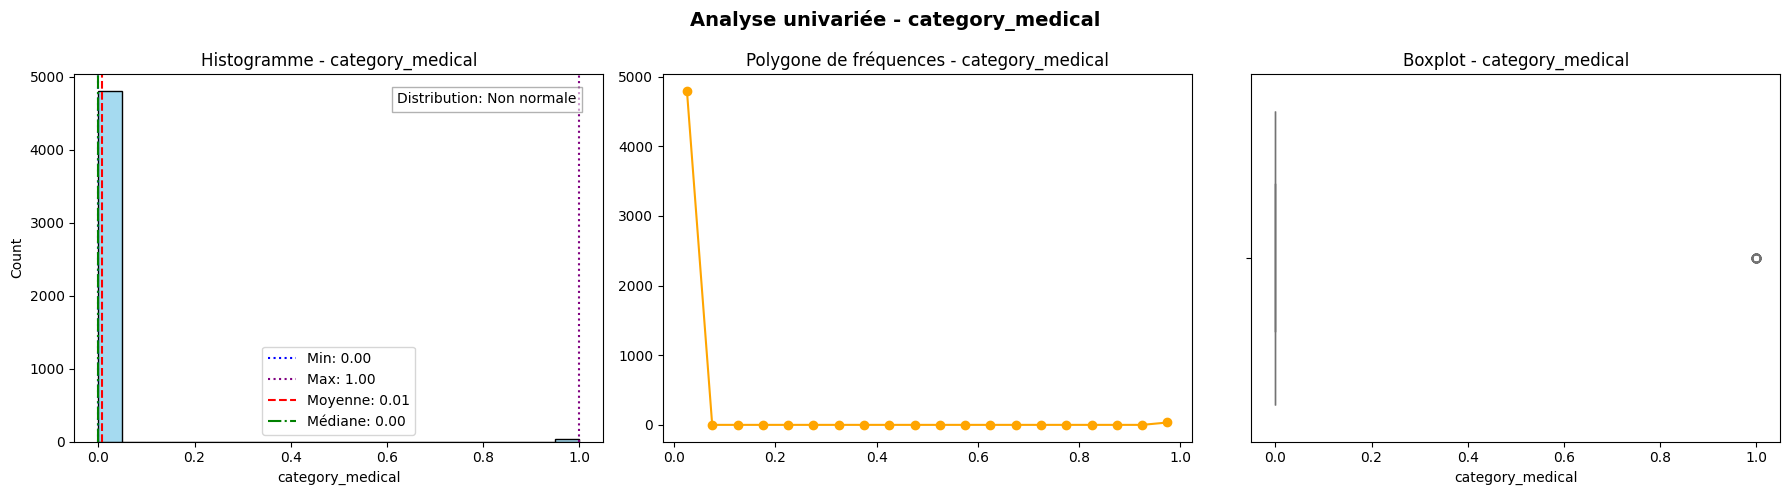

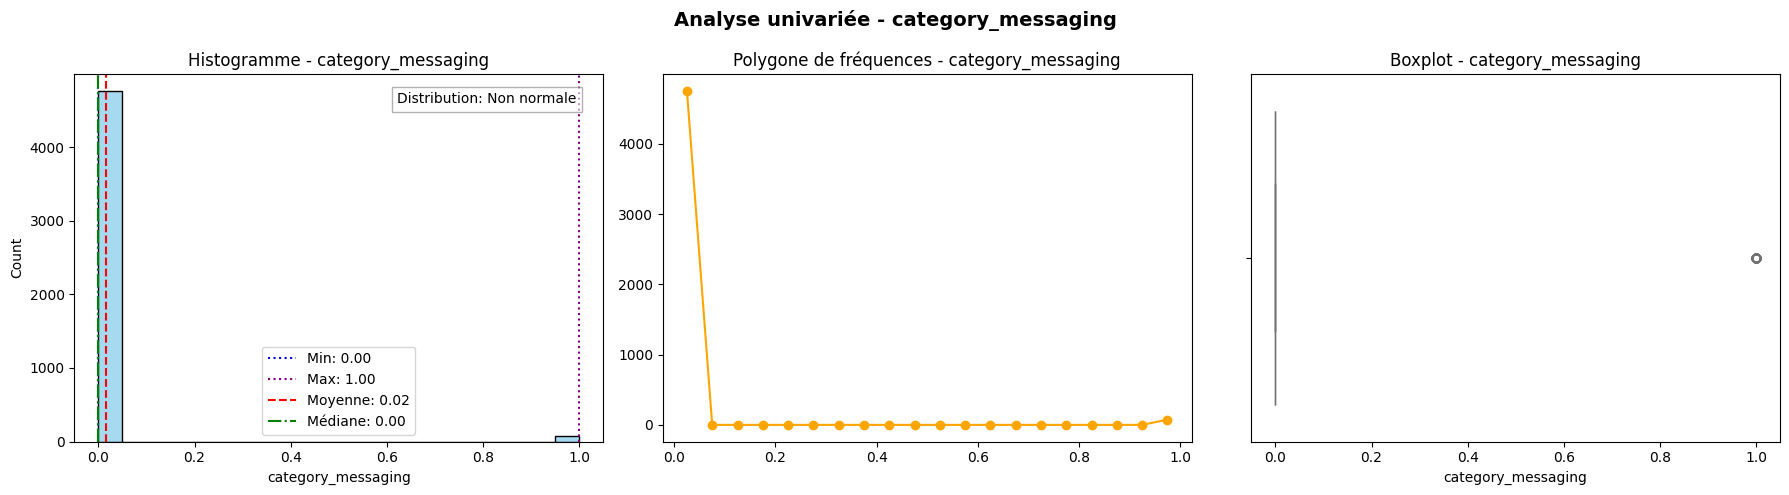

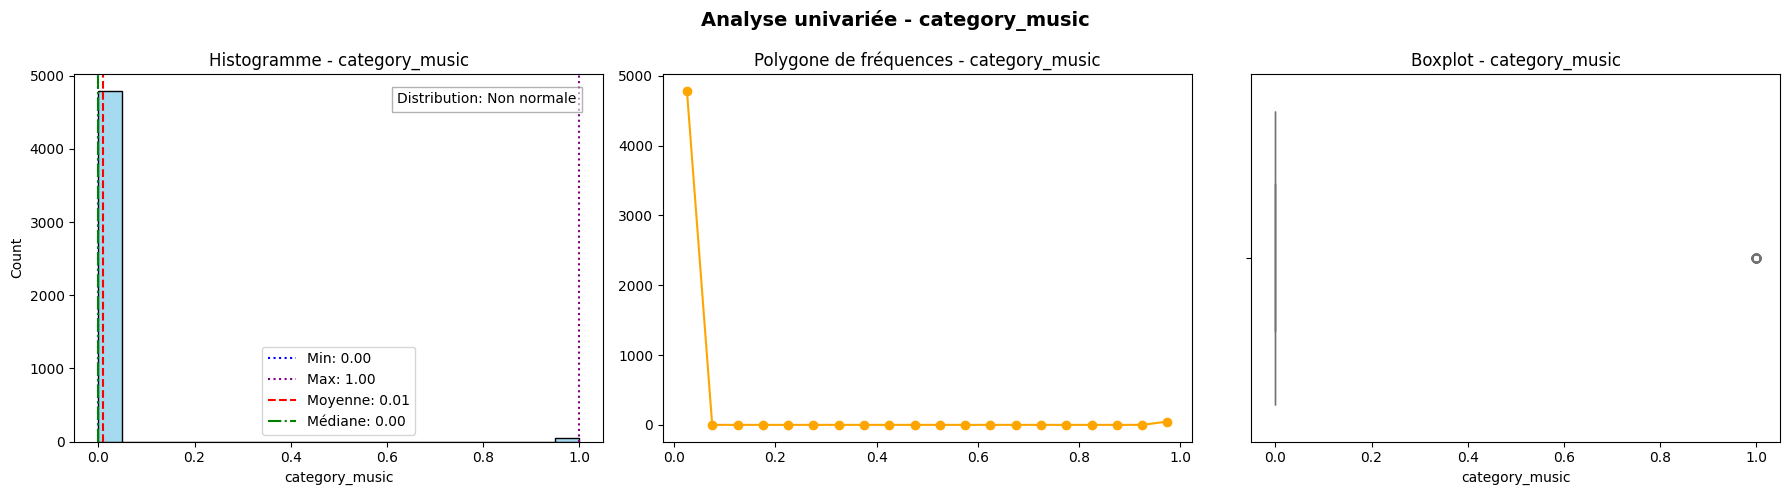

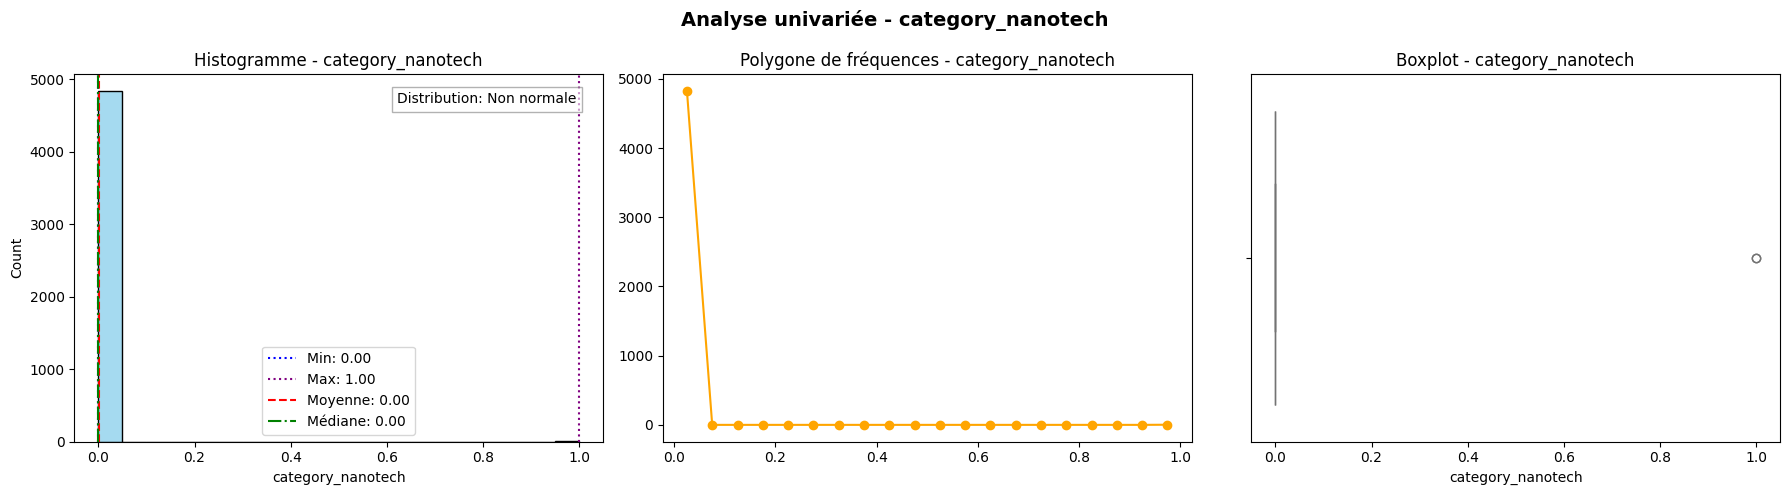

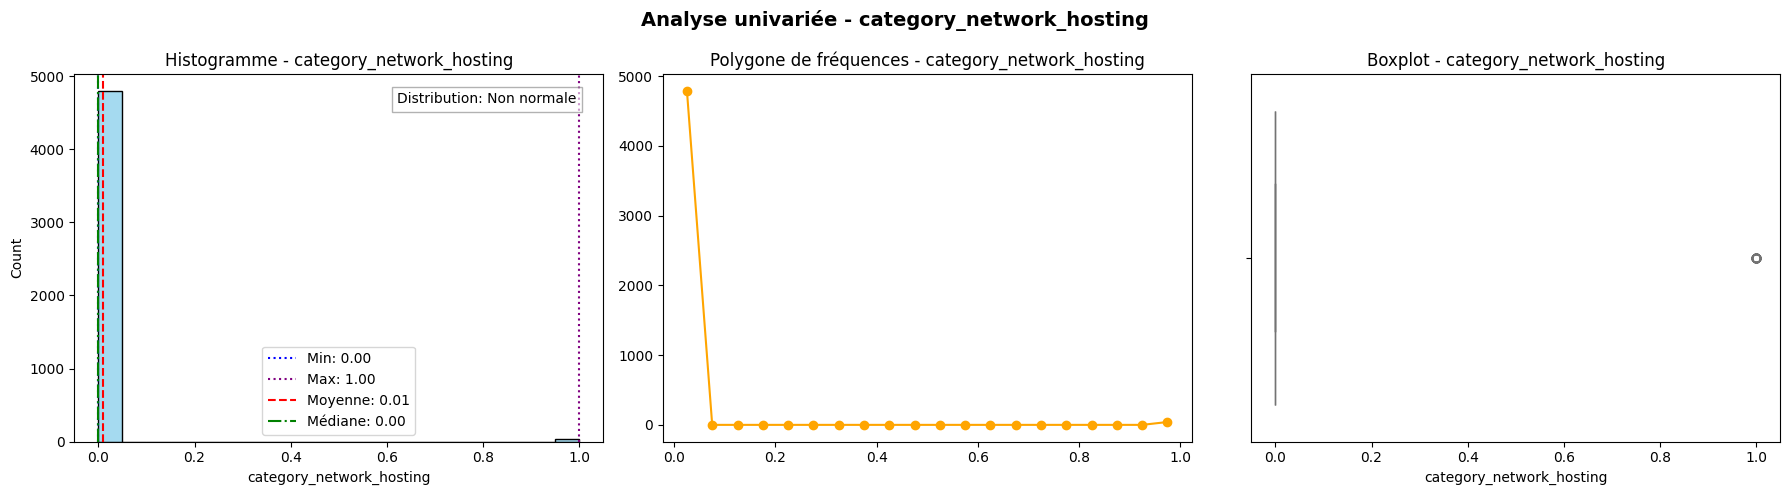

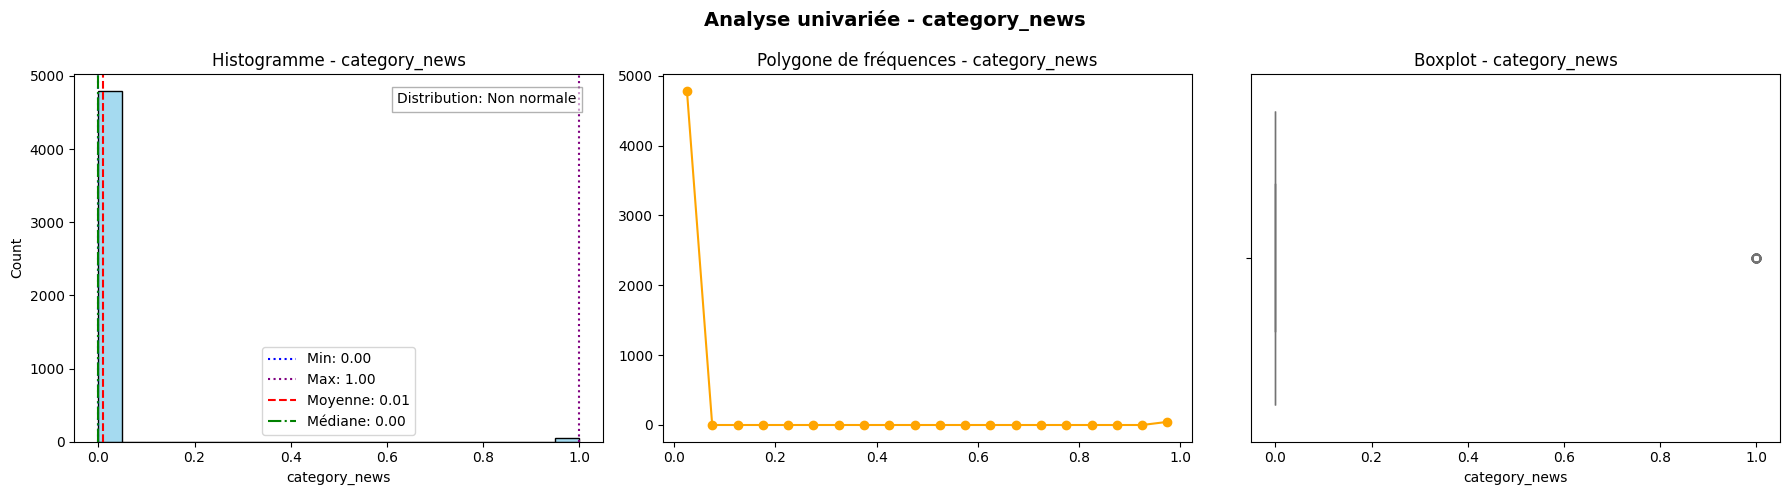

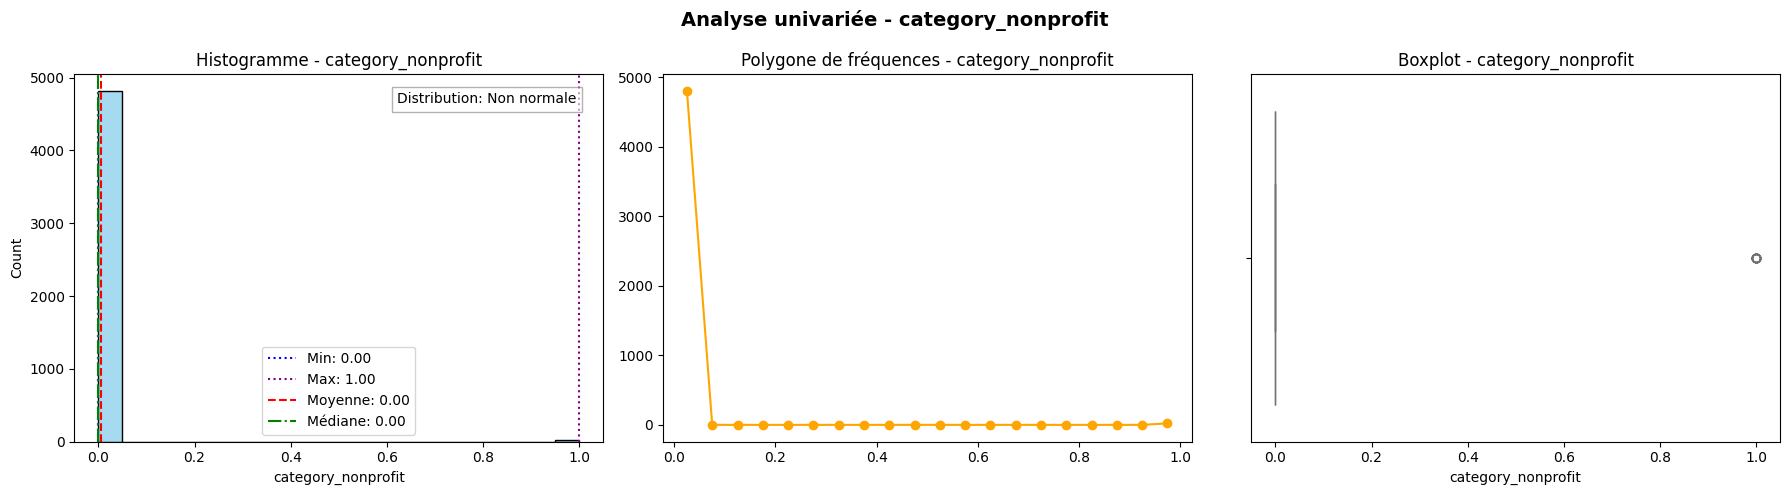

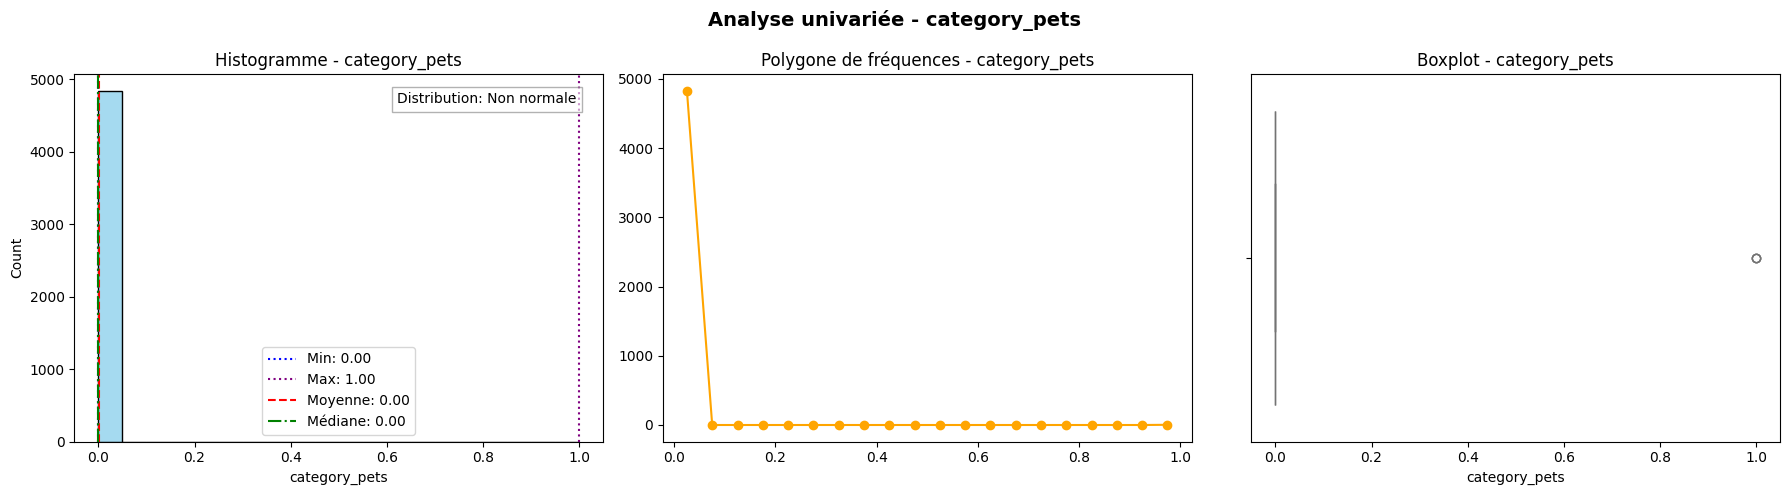

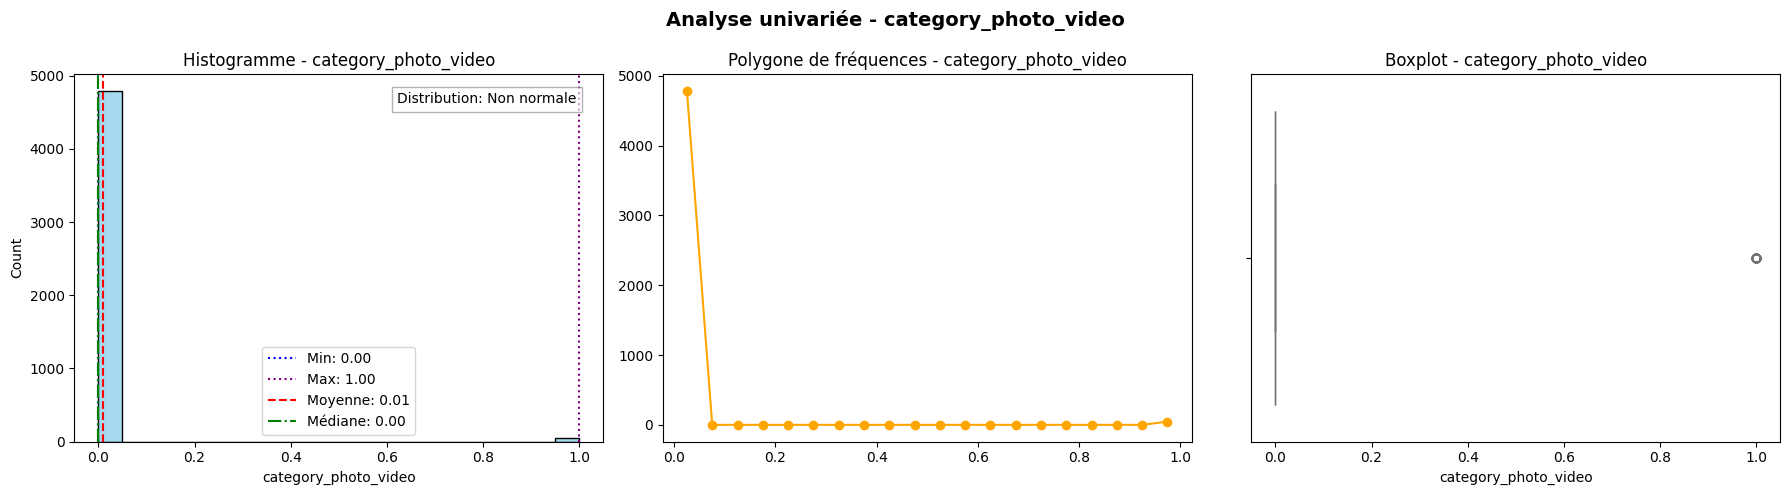

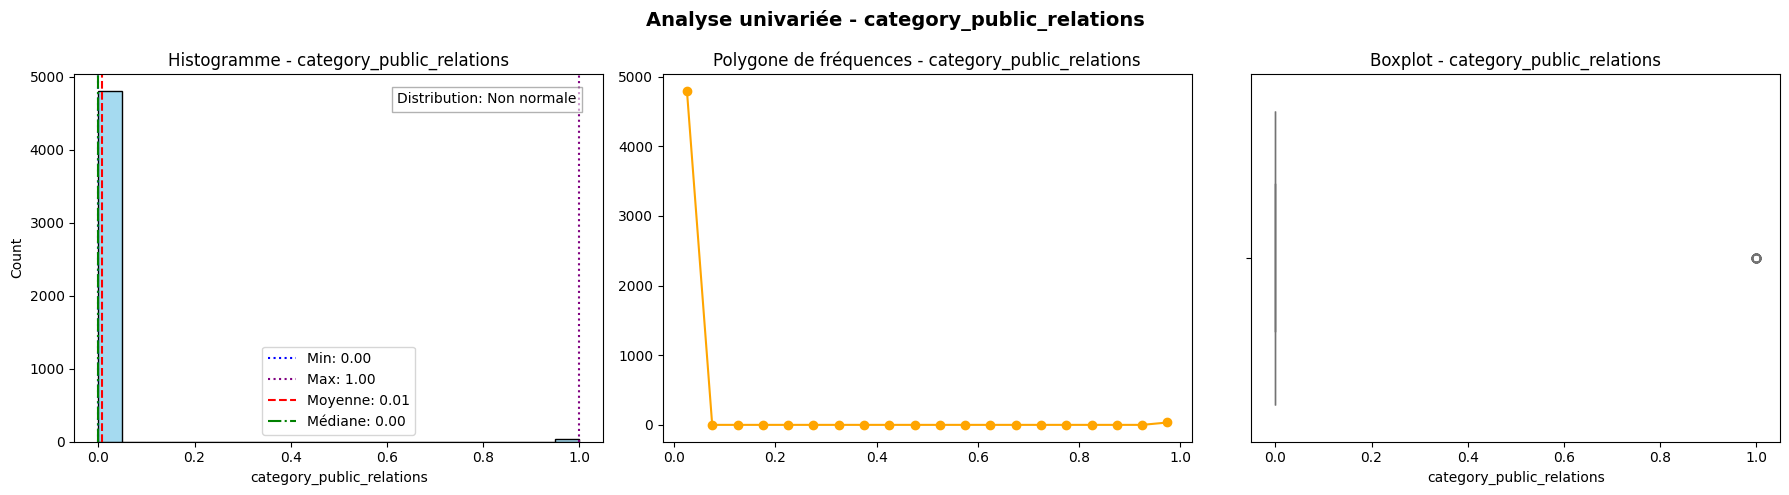

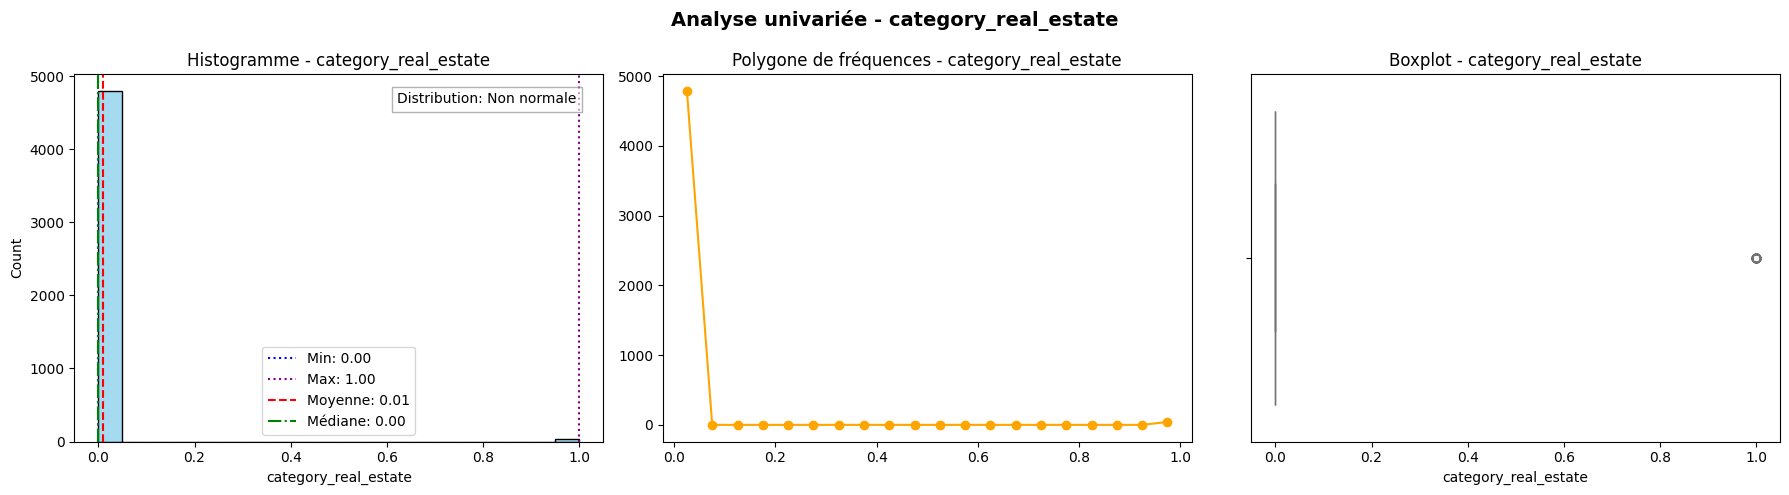

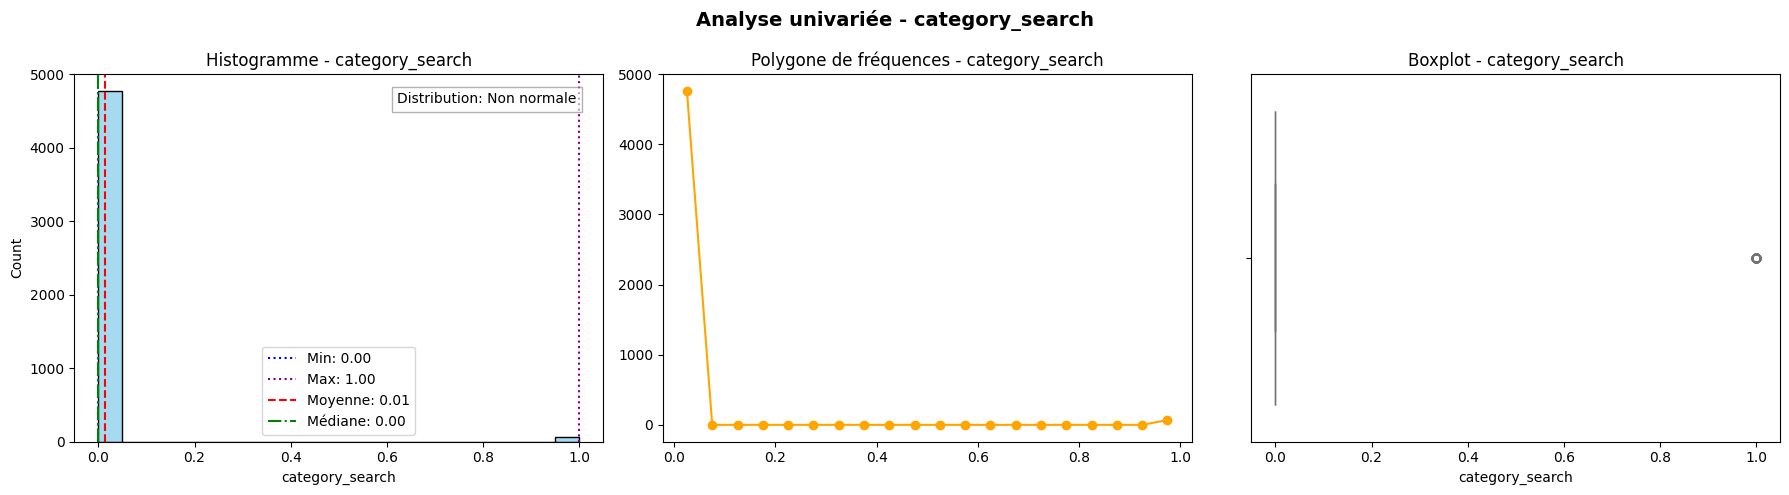

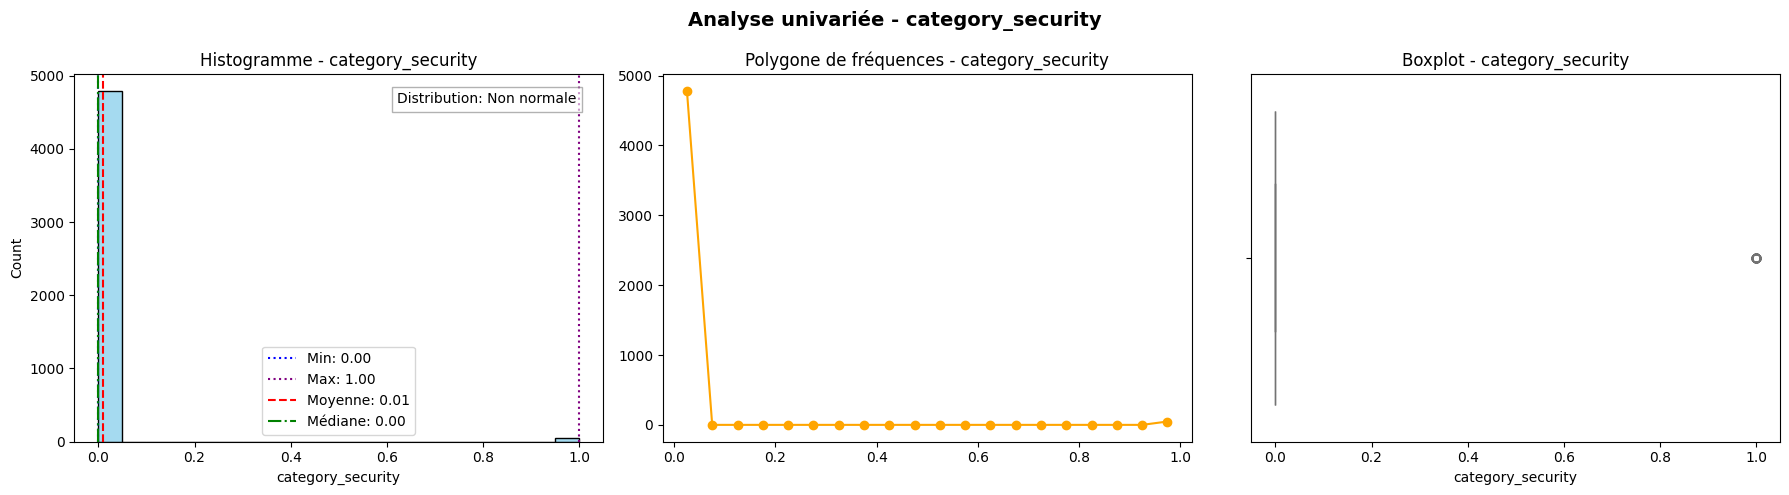

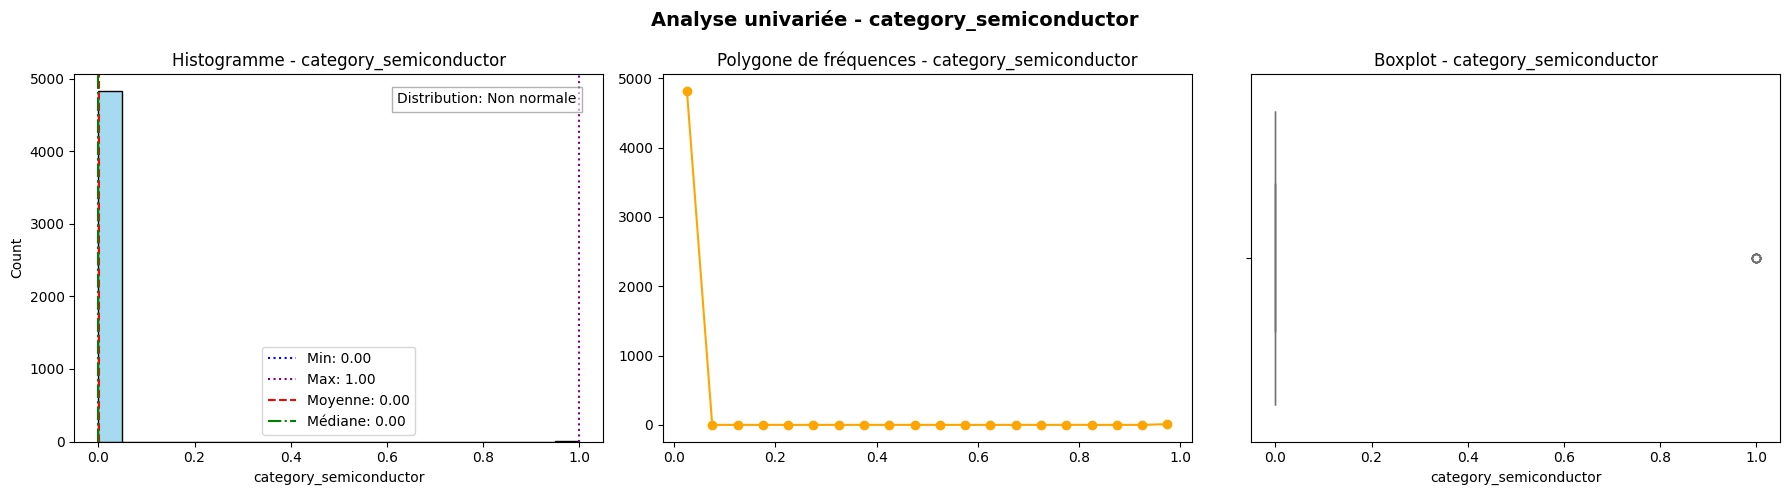

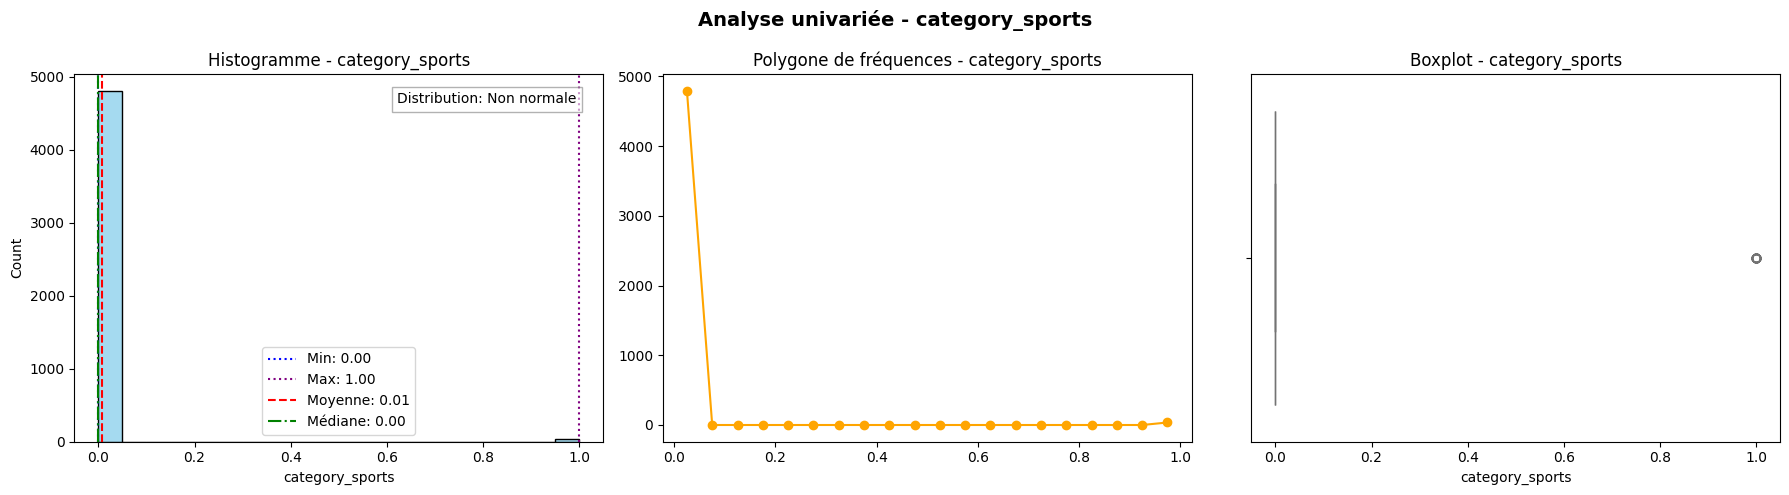

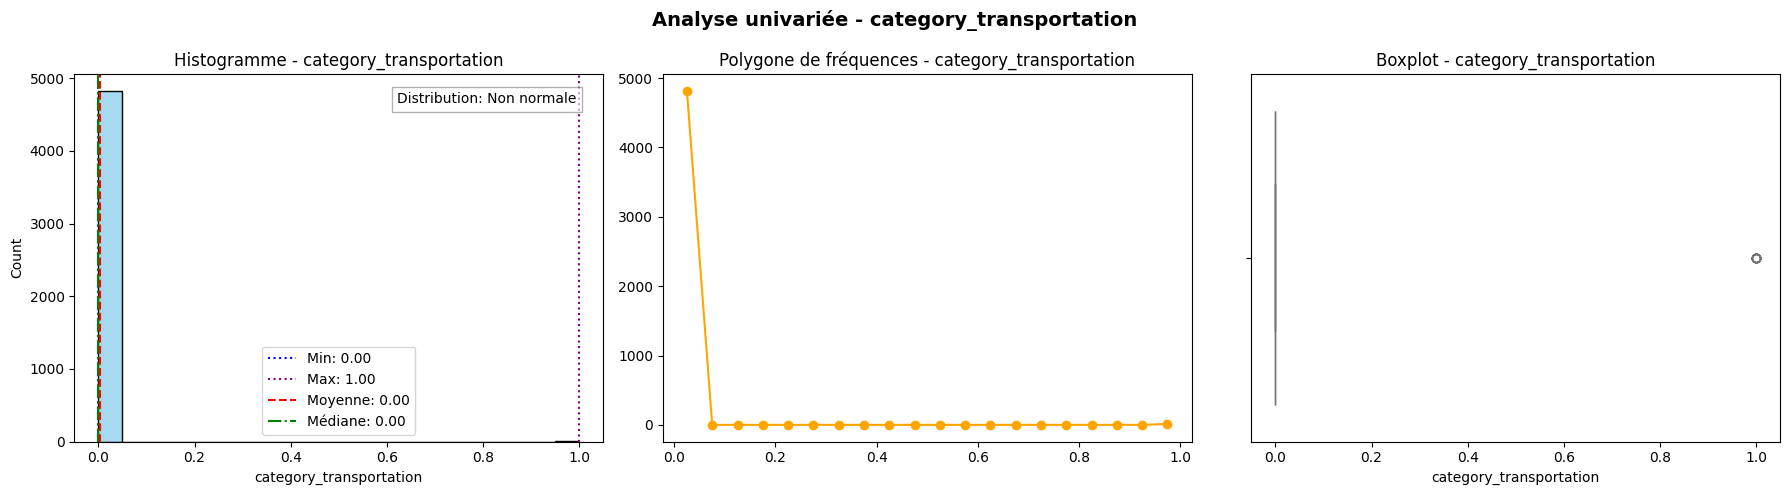

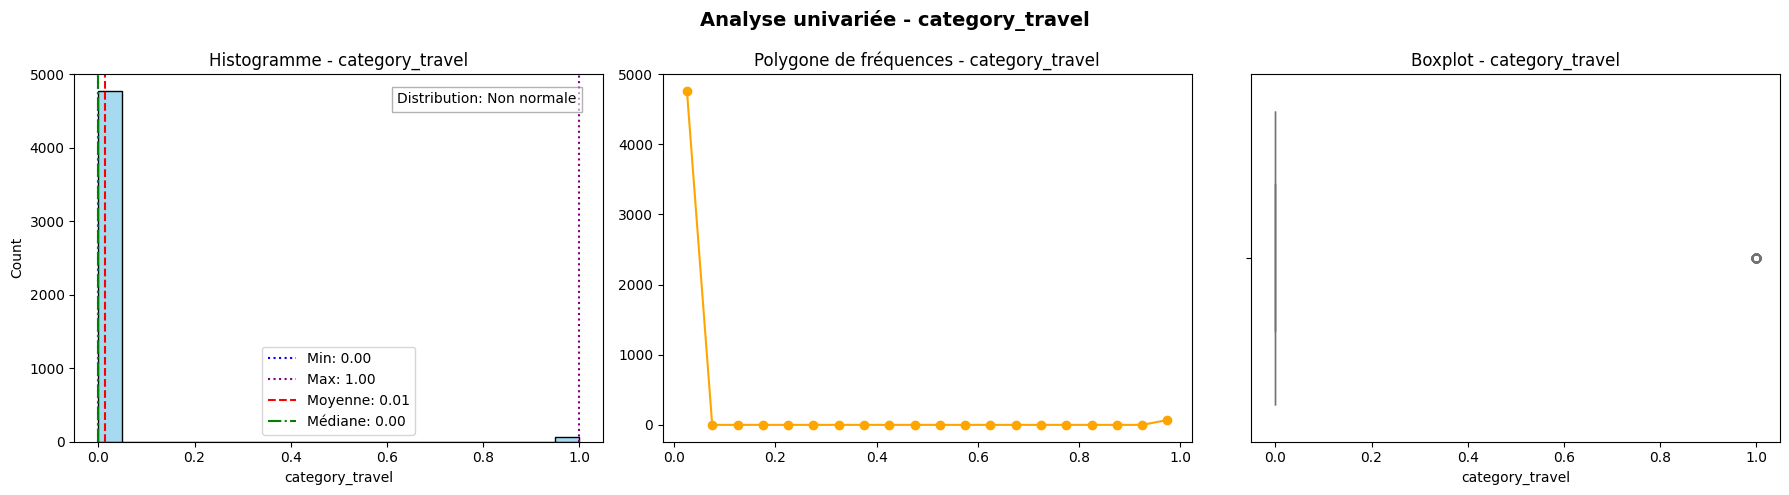

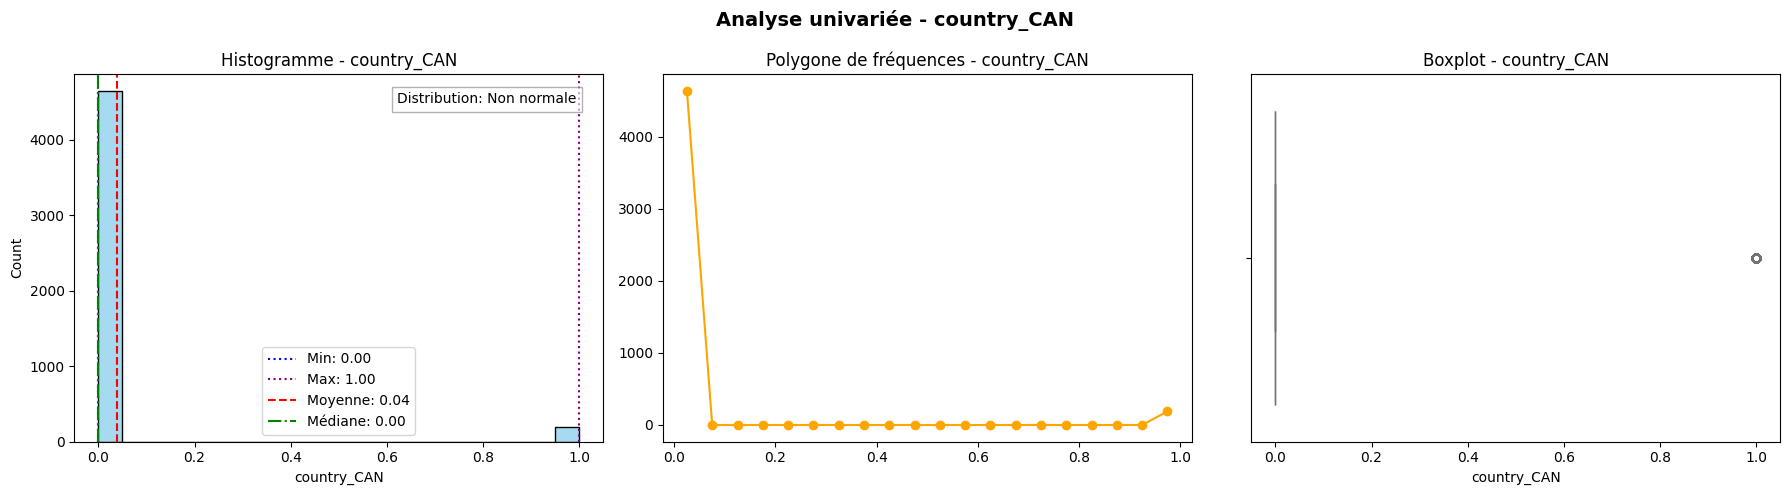

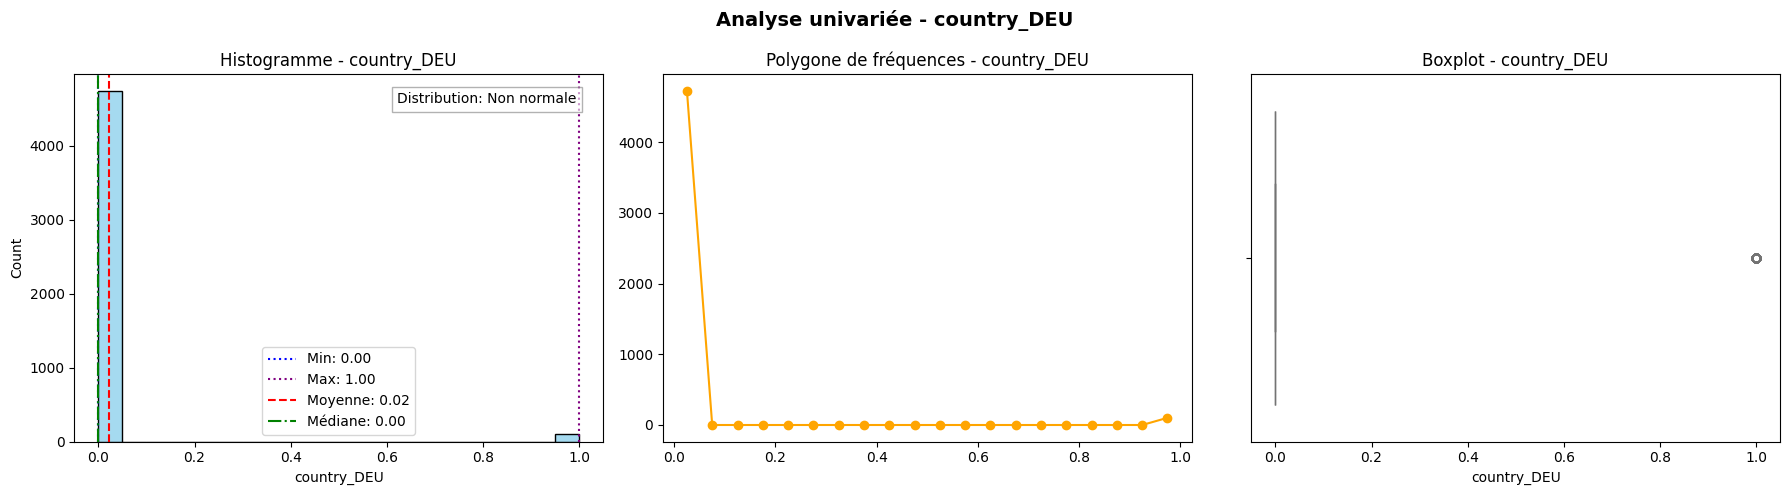

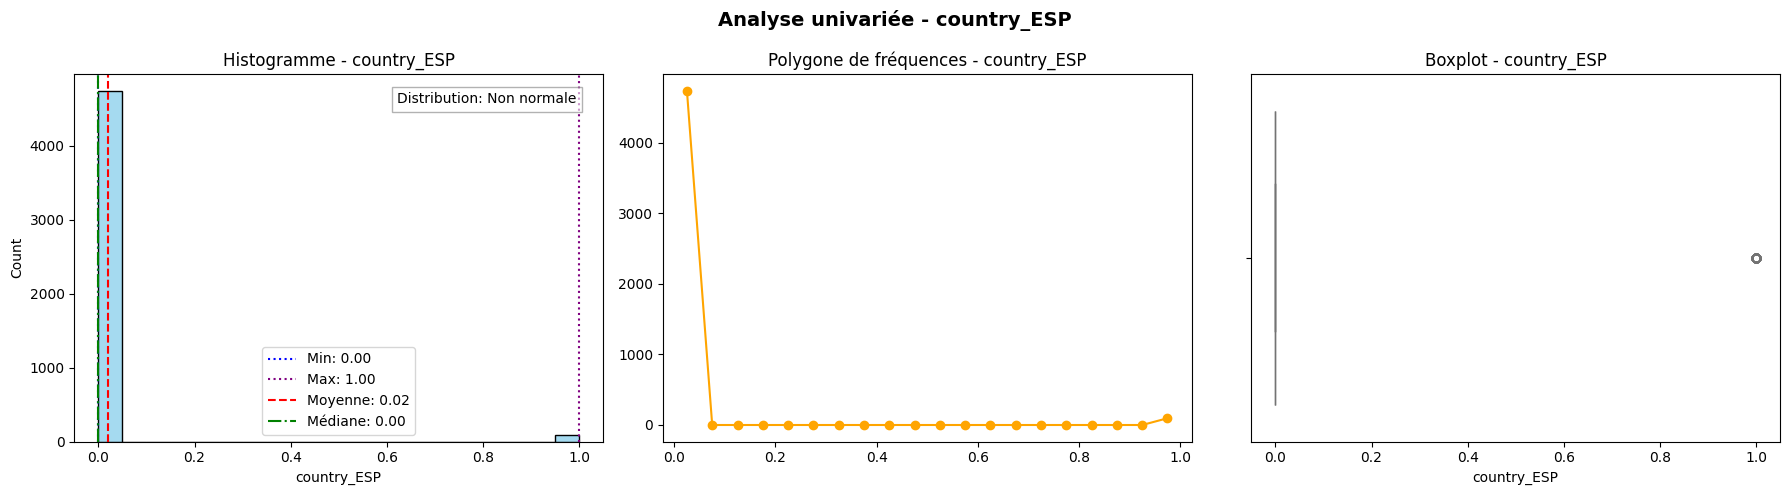

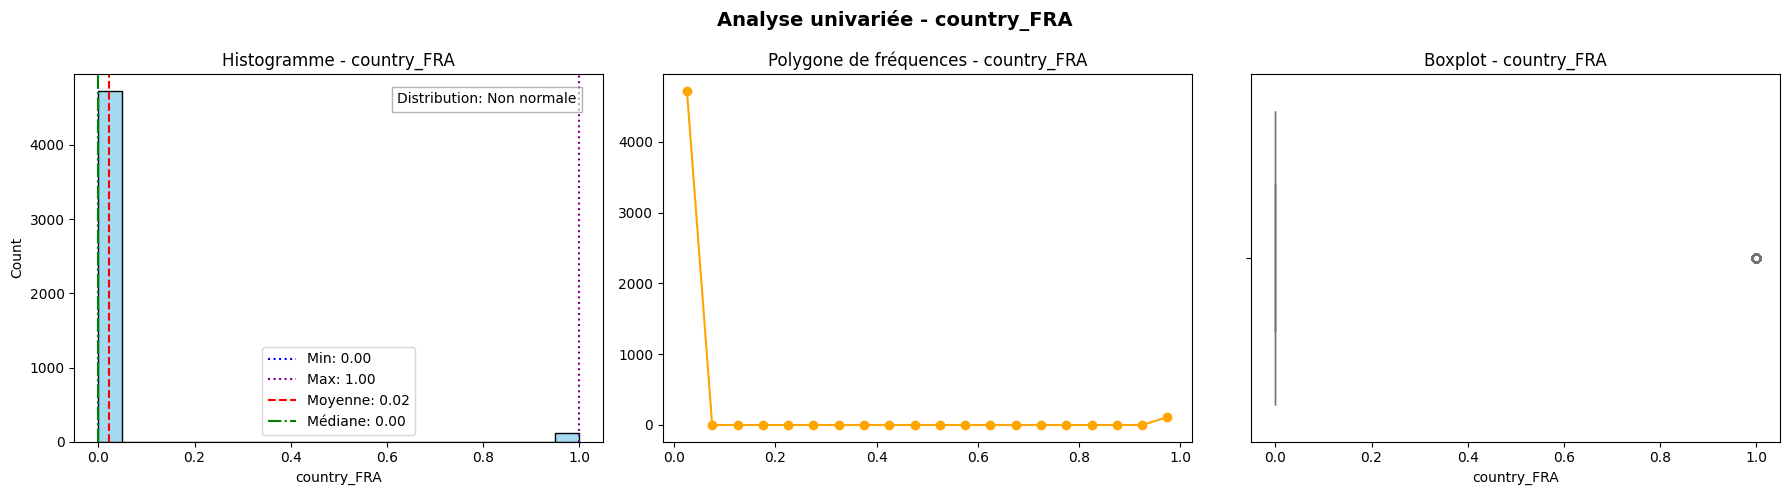

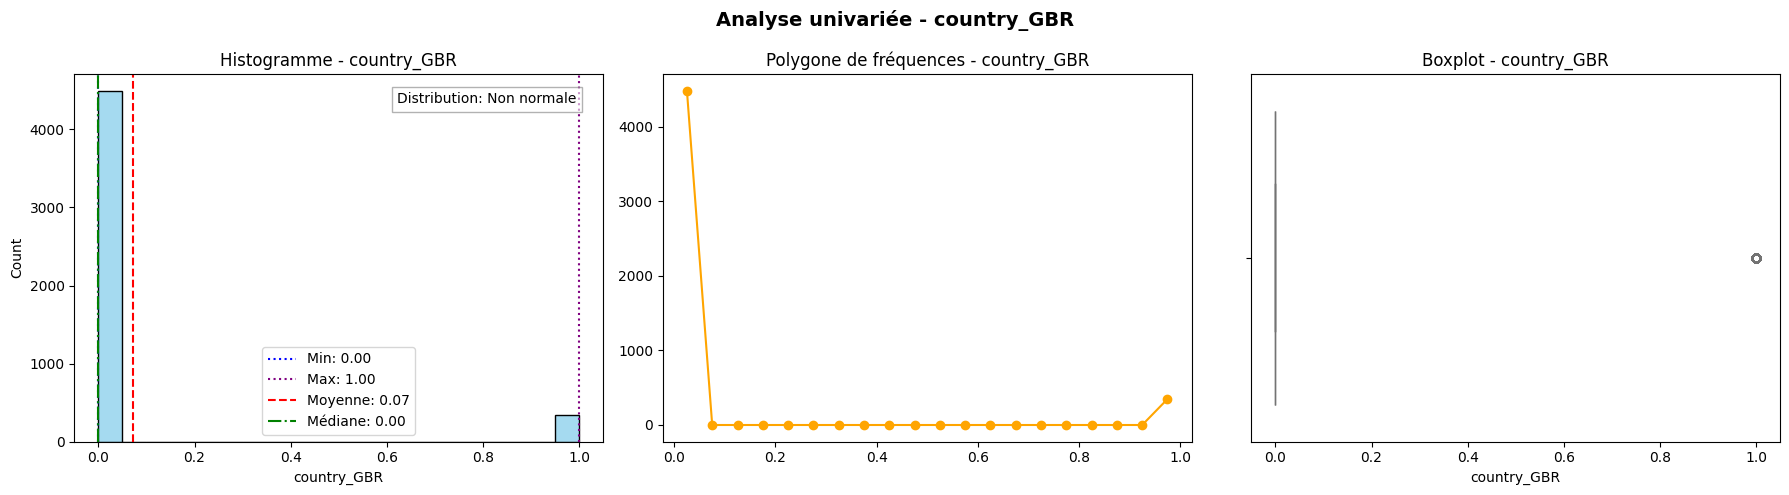

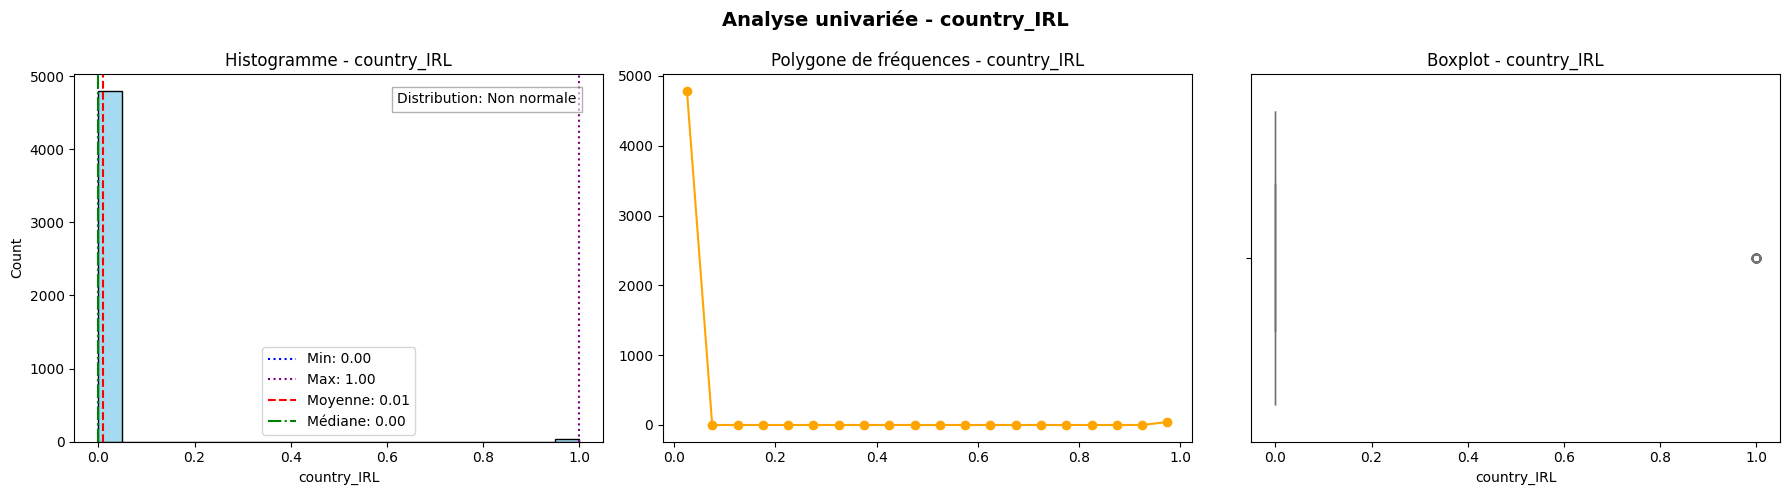

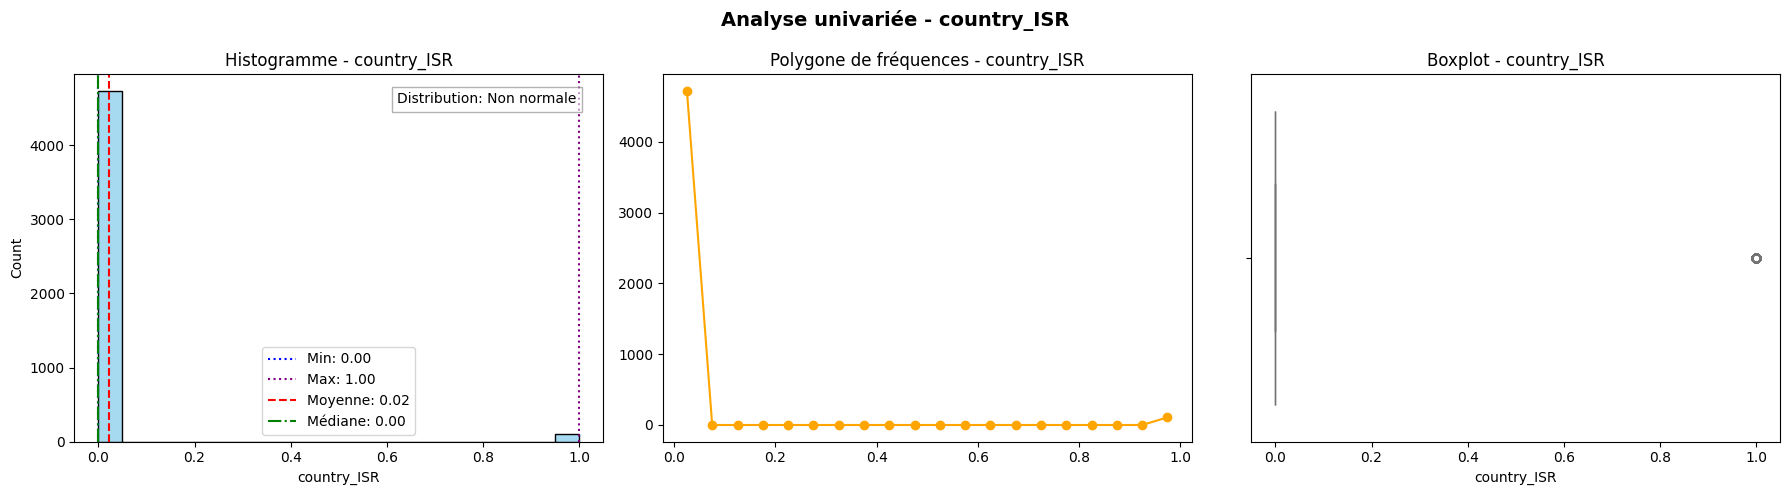

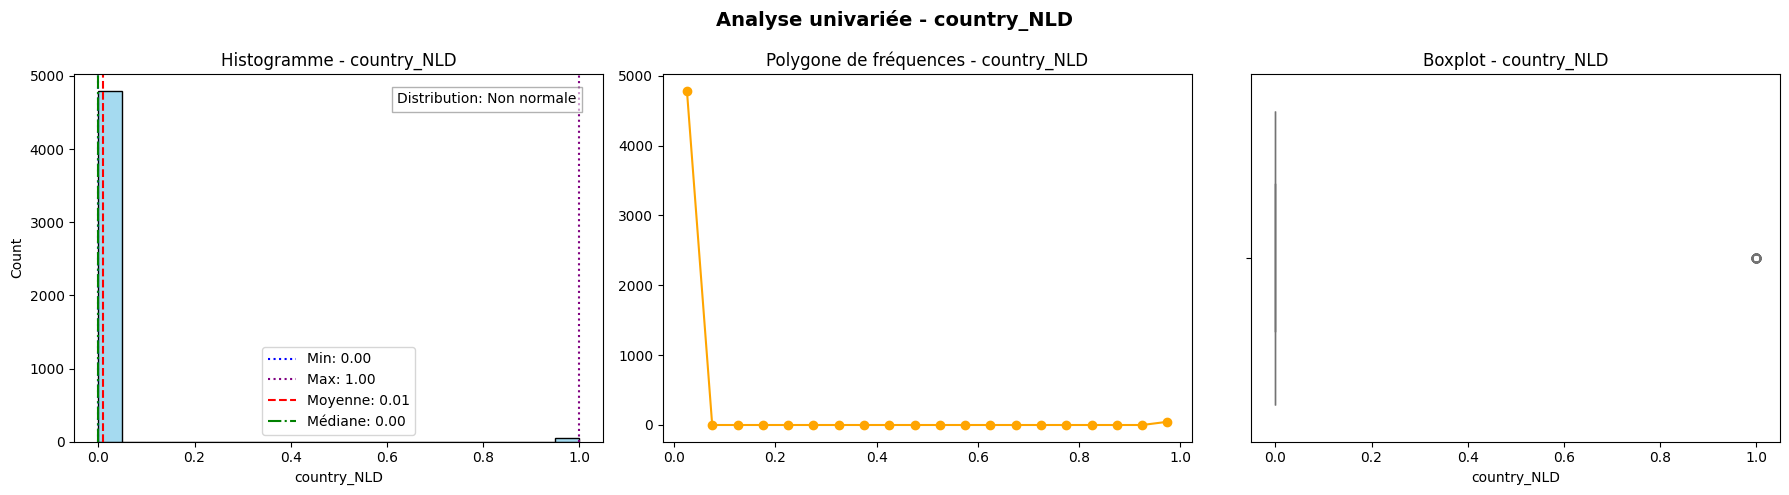

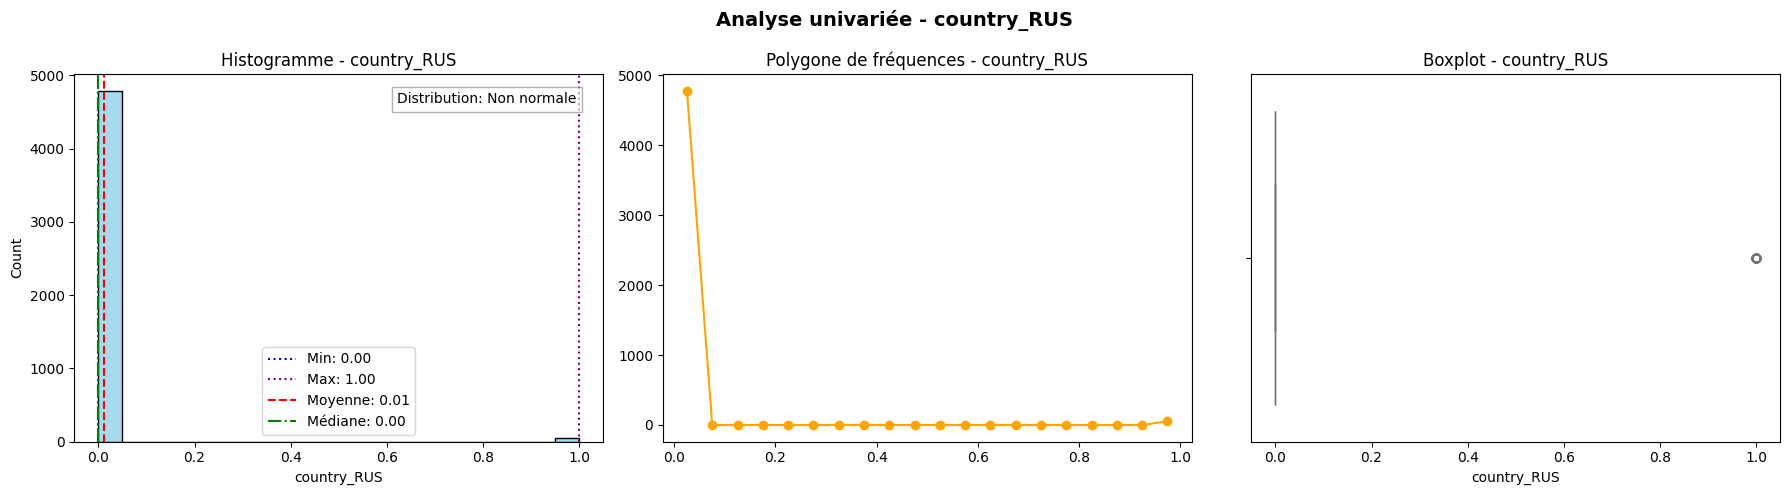

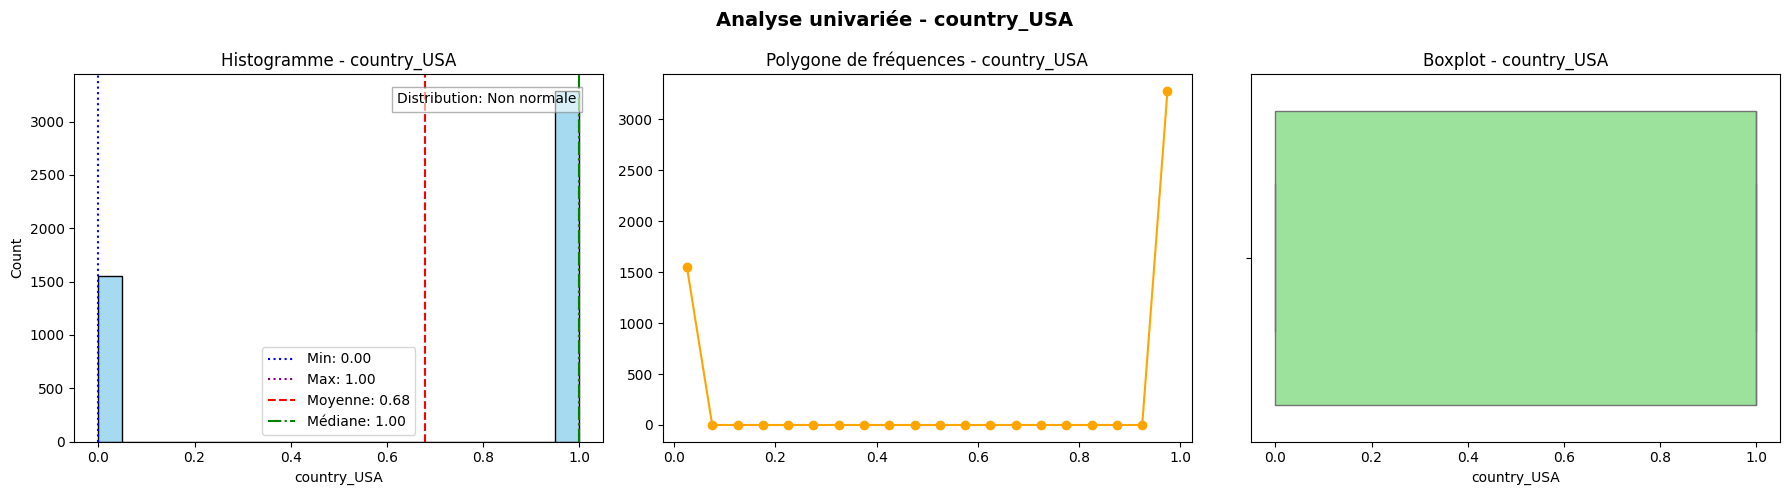

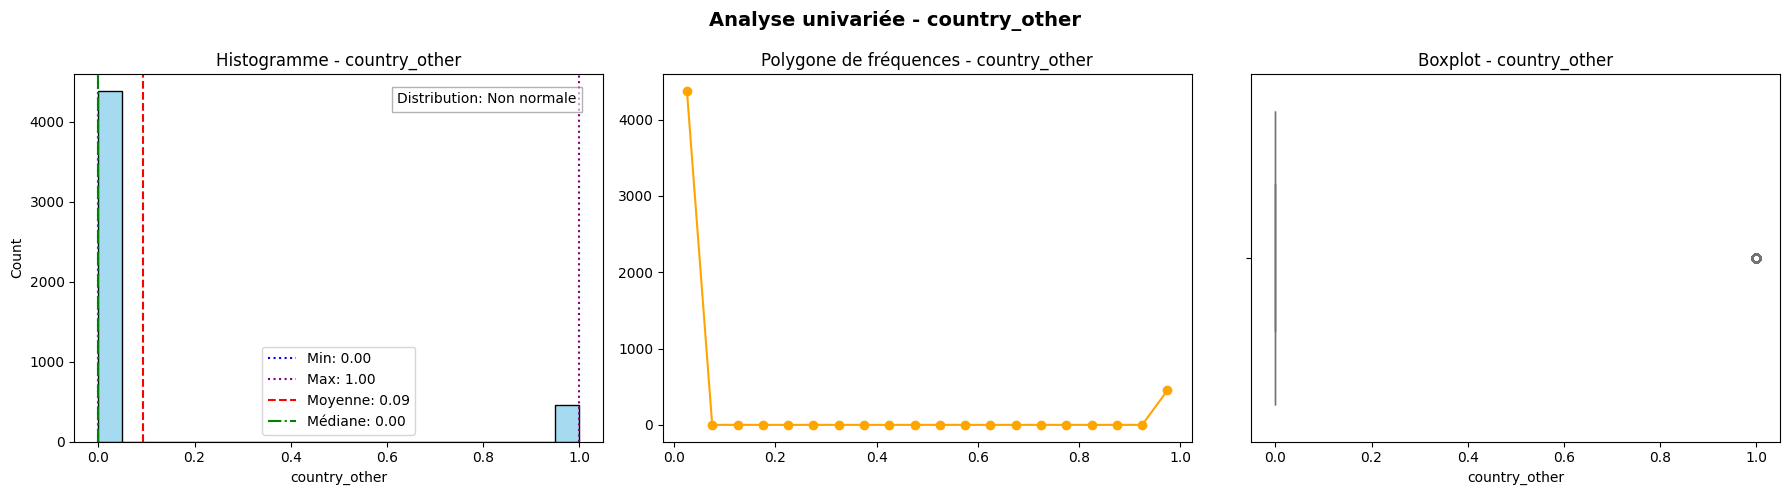

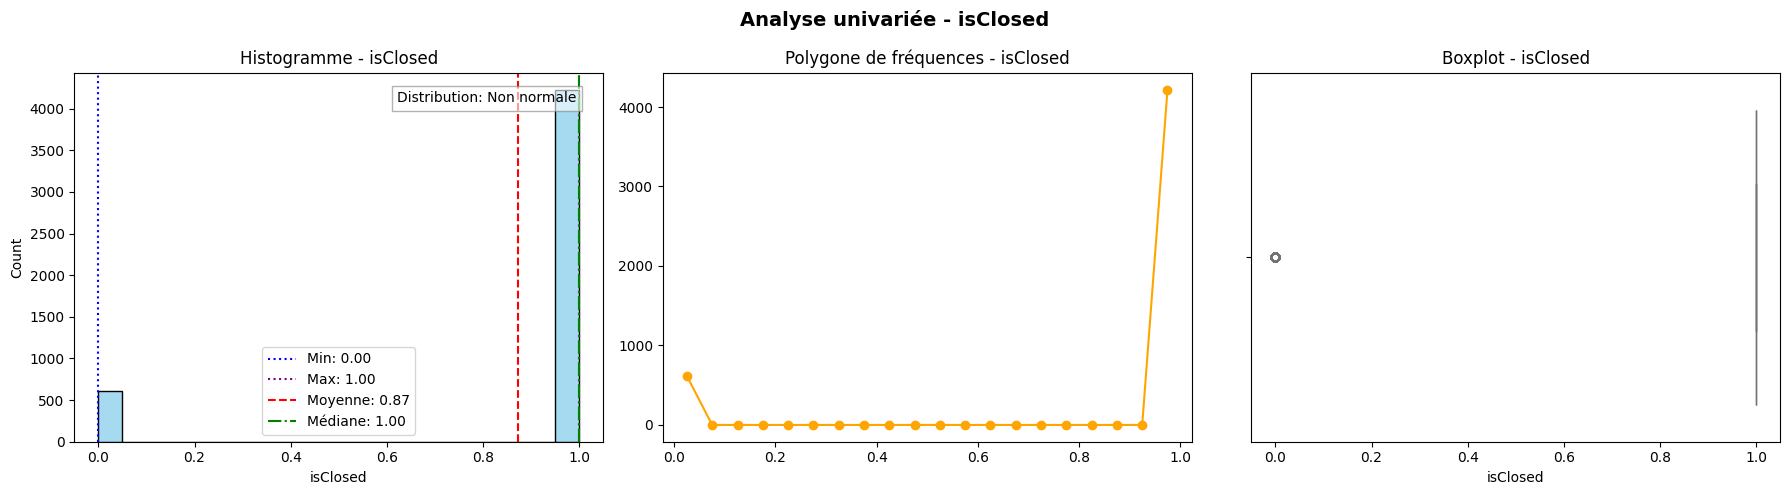

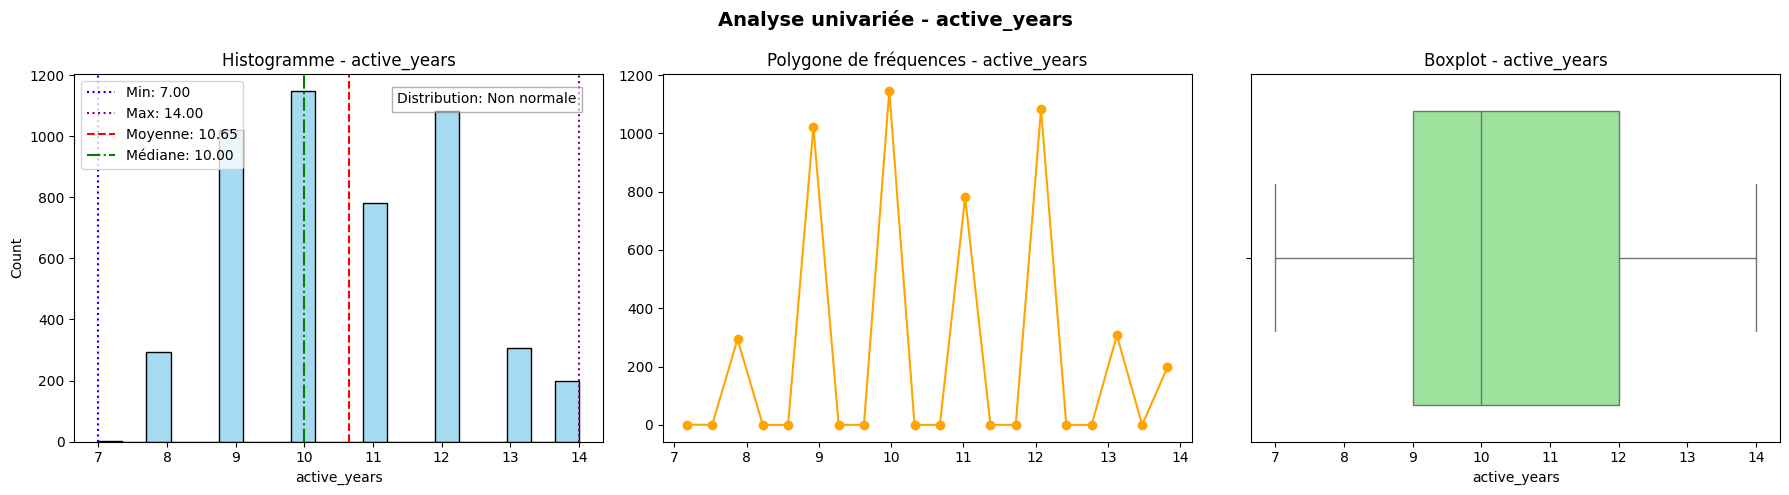

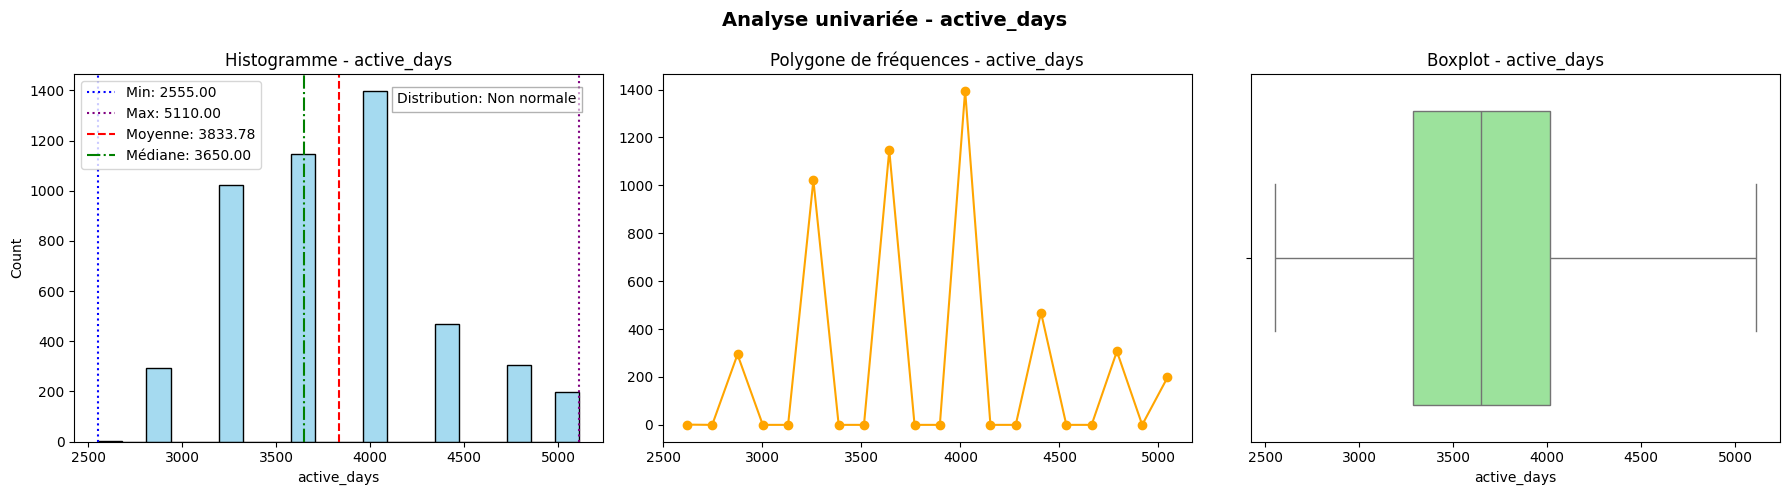

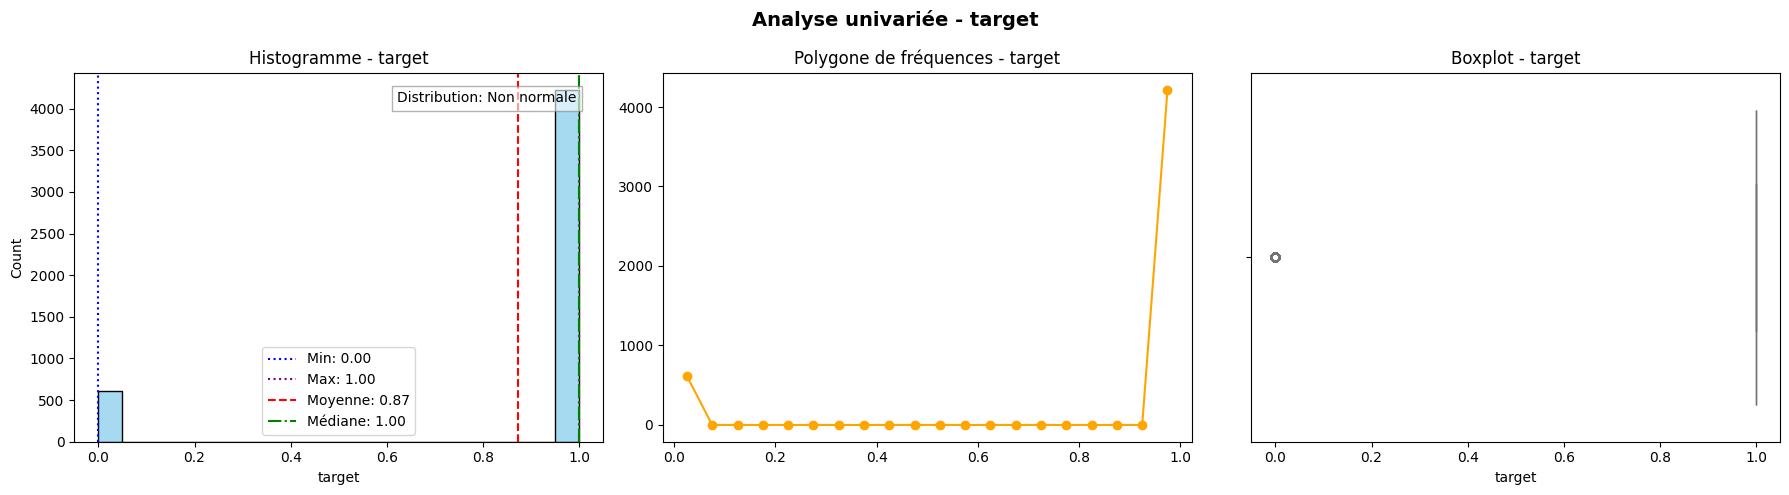

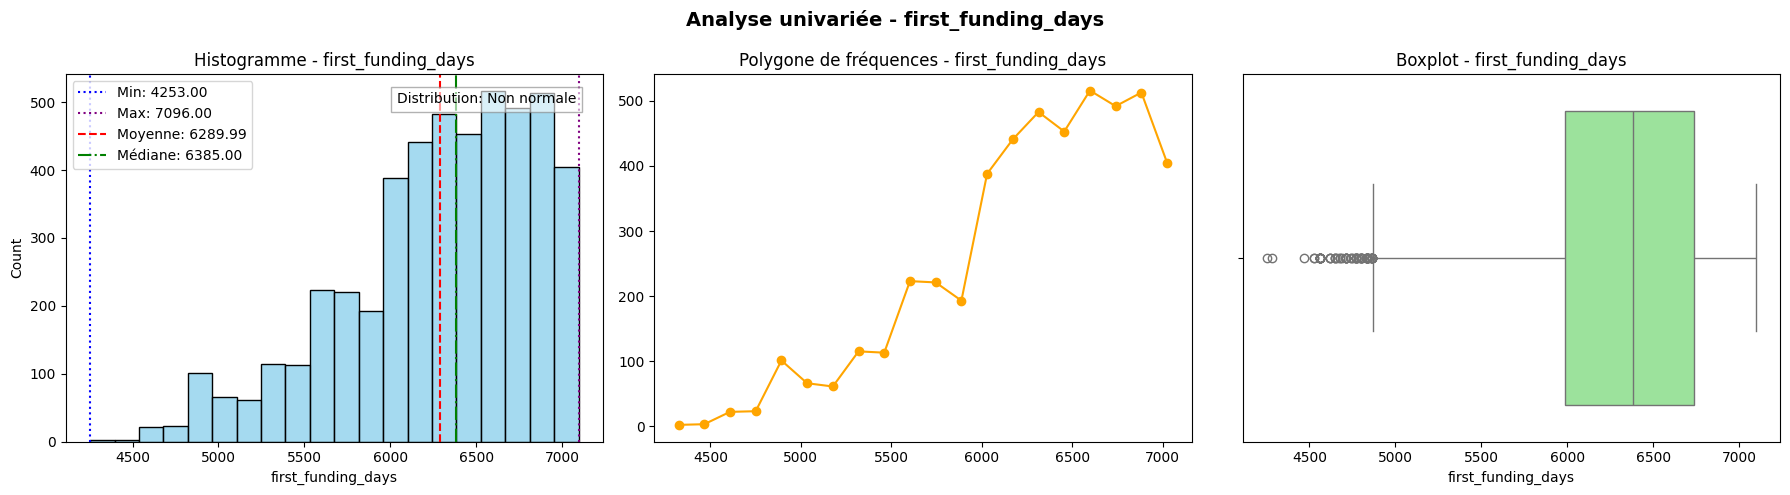

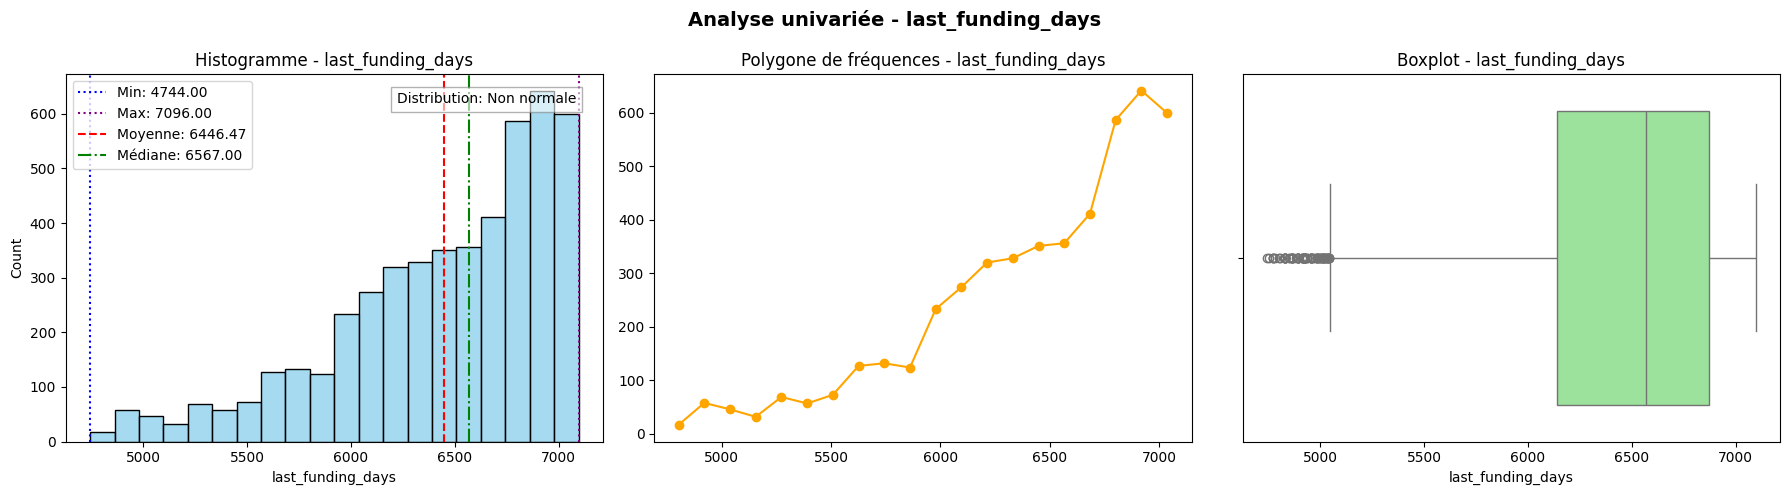

In [101]:
num_cols = my_data.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    col_min = my_data[col].min()
    col_max = my_data[col].max()
    col_mean = my_data[col].mean()
    col_median = my_data[col].median()
    stat, p_value = normaltest(my_data[col].dropna())
    distribution_type = "Normale" if p_value > 0.05 else "Non normale"
    sns.histplot(my_data[col], bins=20, kde=False, ax=axes[0], color="skyblue")
    axes[0].axvline(col_min, color="blue", linestyle=":", label=f"Min: {col_min:.2f}")
    axes[0].axvline(col_max, color="purple", linestyle=":", label=f"Max: {col_max:.2f}")
    axes[0].axvline(col_mean, color="red", linestyle="--", label=f"Moyenne: {col_mean:.2f}")
    axes[0].axvline(col_median, color="green", linestyle="-.", label=f"Médiane: {col_median:.2f}")
    axes[0].set_title(f"Histogramme - {col}")
    axes[0].legend()
    axes[0].text(0.95, 0.95, f"Distribution: {distribution_type}",
                 transform=axes[0].transAxes, ha="right", va="top",
                 fontsize=10, bbox=dict(facecolor="white", alpha=0.6, edgecolor="gray"))
    counts, bin_edges = np.histogram(my_data[col].dropna(), bins=20)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    axes[1].plot(bin_centers, counts, marker="o", linestyle="-", color="orange")
    axes[1].set_title(f"Polygone de fréquences - {col}")
    sns.boxplot(x=my_data[col], ax=axes[2], color="lightgreen")
    axes[2].set_title(f"Boxplot - {col}")
    plt.suptitle(f"Analyse univariée - {col}", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

# 📊 Univariate Analysis - category_advertising

## 1️⃣ Histogram
- Almost all values are **equal to 0**  
- A few observations take the value **1**  

**Main statistics:**  
- 🔵 **Min:** 0.00  
- 🟣 **Max:** 1.00  
- 🔴 **Mean:** ≈ 0.04  
- 🟢 **Median:** 0.00  

➡️ The distribution is highly **skewed** and has been tested as **non-normal**  

---

## 2️⃣ Frequency Polygon
- Very strong concentration on value **0** (≈ 14,000 occurrences)  
- Value **1** appears rarely (a few hundred)  
- Between 0 and 1, no data → confirms the variable is **binary**  

---

## 3️⃣ Boxplot
- Shows high density at **0**  
- Value **1** appears as an **isolated point** (considered as an "outlier" relative to the bulk of data)  
- This illustrates the **massive imbalance** between the two categories  

---

## ✅ Conclusion
The variable **`category_advertising`** is:  
- **Binary (0/1)** type  
- **Highly imbalanced**: almost all values are 0, very few are 1  
- **Non-normal**, strongly skewed distribution  
- To be treated as a **categorical indicator variable (dummy variable)** in a model  

**Here is an example of how to interpret these different figures, and this applies to the rest.**


# 🔎 **Bivariate Analysis**

In [102]:
df_numeric = my_data.apply(pd.to_numeric, errors='coerce')
correlations = df_numeric.corr()['target'].sort_values(ascending=False)
print(correlations)

isClosed                    1.000000
target                      1.000000
last_funding_days           0.377000
first_funding_days          0.348313
first_milestone_at          0.301237
                              ...   
category_web               -0.098789
active_days                -0.130594
milestones                 -0.132478
active_years               -0.366698
country_code_generalized         NaN
Name: target, Length: 69, dtype: float64


In [103]:
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                    funding_rounds  funding_total_usd  first_milestone_at  \
funding_rounds            1.000000           0.300929           -0.017241   
funding_total_usd         0.300929           1.000000           -0.027931   
first_milestone_at       -0.017241          -0.027931            1.000000   
last_milestone_at         0.069705           0.069909            0.785594   
milestones                0.171888           0.211772           -0.144470   
...                            ...                ...                 ...   
active_years              0.093262           0.209878           -0.612352   
active_days               0.099868           0.217816           -0.574188   
target                    0.001850          -0.022461            0.301237   
first_funding_days       -0.227564          -0.090010            0.636075   
last_funding_days         0.184697           0.091865            0.633262   

                    last_milestone_at  milestones  relationships       lat 

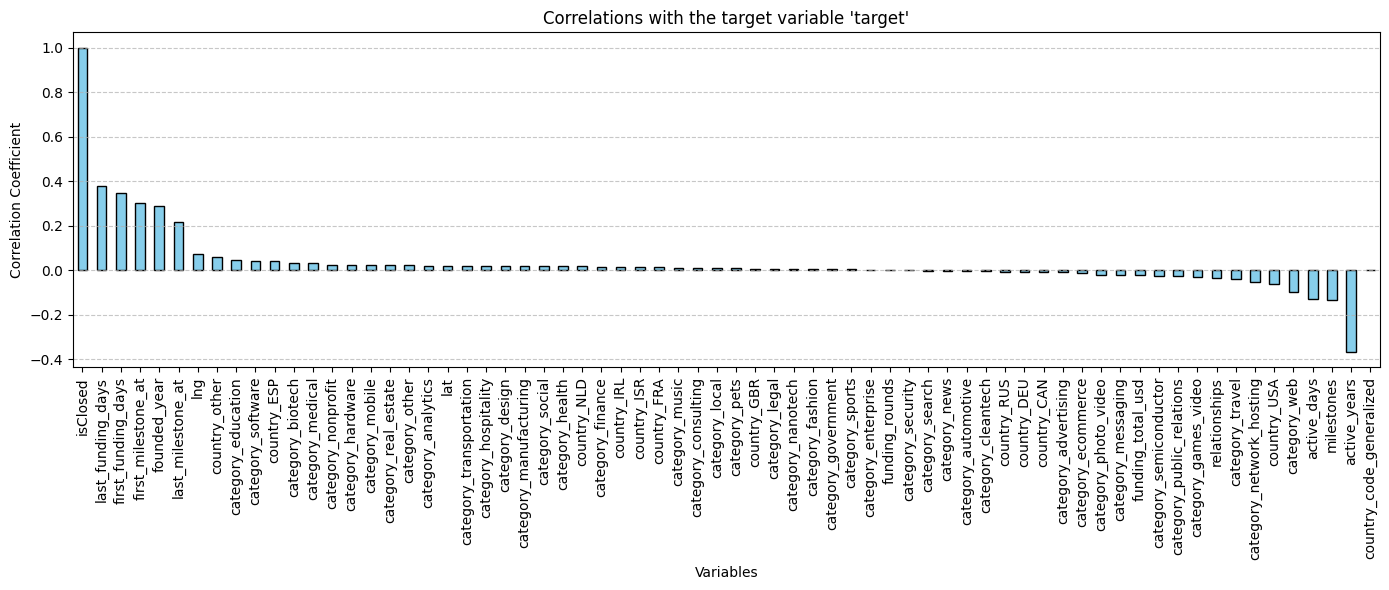

In [104]:
correlation_matrix = df_numeric.corr()
correlations = correlation_matrix['target'].drop('target').sort_values(ascending=False)
plt.figure(figsize=(14,6))
correlations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Correlations with the target variable 'target'")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Variables")
plt.xticks(rotation=90, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Correlation Analysis with Target Variable**

## 1️⃣ **Overview**

The chart shows the correlation of each variable with the target variable (`target`) as vertical bars.

- The vertical axis represents the **correlation coefficient**, ranging from -0.4 to 1.
- The horizontal axis lists all variables in the dataset.
- Bars **above 0** indicate a positive correlation.
- Bars **below 0** indicate a negative correlation.

## 2️⃣ **Key Points**

### **Most positively correlated variable**
- **isClosed** with a coefficient close to 1, showing a very strong correlation with the target.
- Interpretation: if `isClosed` is true, the probability that `target` takes a certain value is very high.

### **Moderately positively correlated variables**
- `last_funding_days`, `first_funding_days`, `first_milestone_at`, `last_milestone_at`, `founded_year` show weak to moderate correlation (≈ 0.2–0.4).
- These time-related variables seem to influence the target, but less strongly than `isClosed`.

### **Weakly correlated variables**
- Most variables, such as `category_*` or `country_*`, have correlations close to 0.
- Interpretation: they have little or no linear relationship with the target.

### **Negatively correlated variables**
- Example: `country_code_generalized` with ≈ -0.38.
- Interpretation: an increase in this variable is associated with a decrease in the probability that `target` takes certain values.

## 3️⃣ **Practical Interpretation**

- **Strong variables to consider for modeling:** `isClosed`, `last_funding_days`, `first_funding_days`.
- **Weakly correlated variables:** may be less relevant for a linear model, but can still impact non-linear models like Random Forest or XGBoost.
- **Strongly negative variables:** can provide complementary information, especially for models able to capture inverse relationships.


# 📊 **Multivariate Analysis**

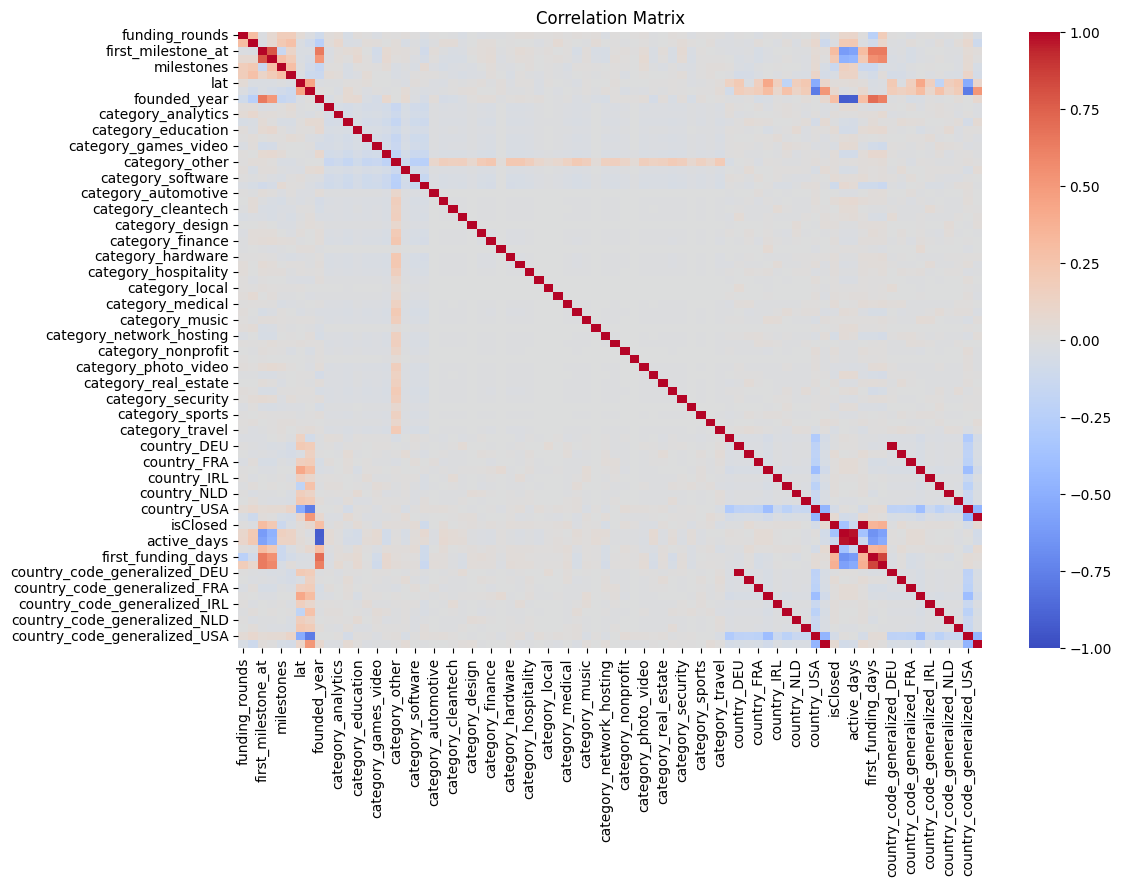

In [105]:
data = my_data.copy()
data = pd.get_dummies(data, drop_first=True)
TARGET_COL = 'target'
corr = data.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [106]:
X_num = data.drop(columns=[TARGET_COL])
X_num = X_num.select_dtypes(include=[np.number])
X_vif = add_constant(X_num)
vif_df = pd.DataFrame({
    "variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_df = vif_df.sort_values("VIF", ascending=False)
print(vif_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                variable       VIF
16       category_mobile       inf
17        category_other       inf
11    category_analytics       inf
10  category_advertising       inf
60           country_RUS       inf
..                   ...       ...
33        category_local  1.054334
42         category_pets  1.039064
38     category_nanotech  1.031633
28   category_government  1.015980
0                  const  0.000000

[68 rows x 2 columns]


# 🔎 **1-Interpretation of VIF Results**

When calculating the VIF (Variance Inflation Factor) for my dataset, I noticed that several variables such as `category_mobile`, `category_other`, `category_analytics`, and `country_RUS` show **VIF = ∞ (infinity)**.  

This means that these variables are **perfectly collinear** with others — in other words, they do not bring new information because they can be predicted exactly from a combination of other variables.  
This situation is typical when using **one-hot encoding** on categorical variables without dropping a reference category.  

On the other hand, variables such as `category_local`, `category_pets`, and `category_nanotech` have **VIF values close to 1**, which indicates that they are not collinear with others and therefore safe to keep.  

The constant (`const`) always shows a value of 0 in the VIF table and does not need to be interpreted.  

👉 **Conclusion**:  
- Variables with `VIF = ∞` are redundant and should be removed (or a reference category should be dropped for each dummy variable).  
- Only the variables with low VIF (≈1) should be kept, as they bring unique and independent information.  
- To avoid this issue in the future, I will use `pd.get_dummies(..., drop_first=True)` during encoding or apply regularization techniques like Ridge or Lasso regression.  
